In [145]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [146]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [147]:
# Import the numpy, pandas and graphical packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

# set a seaborn style
sns.set_style("whitegrid")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [148]:
# Code to inspect dataframe and percentage missing values in rows and columns

def inspect_df(df):
    print('Shape:',end='\n\n')
    print(df.shape,end='\n\n')
    print()
    col_types=df.dtypes
    col_missing_count = df.isnull().sum()
    col_missing_pct = round(100*(df.isnull().sum()/len(df.index)),2)
    col_unique_values = df.nunique(axis=0)
    obj = pd.DataFrame({'Columns':df.columns,'Data_Type':col_types,'Missing_Count':col_missing_count,'Missing_Percent':col_missing_pct,'Unique_Values':col_unique_values}).set_index('Columns')
    return obj

In [149]:
# Code to sanitize column names
def sanitize_df(df):
    # Removing extra space from the beginning and end of column names
    df.columns=df.columns.map(lambda x:x.strip())

# Current Applications

In [150]:
application = pd.read_csv("application_data.csv")
application

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [151]:
# Removing extra space from the beginning and end of column names
sanitize_df(application)

In [152]:
# Dataframe inspection
df = inspect_df(application)
df.sort_values(by='Missing_Percent',ascending=False)

Shape:

(307511, 122)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                  
COMMONAREA_MEDI                float64         214865            69.87   
COMMONAREA_AVG                 float64         214865            69.87   
COMMONAREA_MODE                float64         214865            69.87   
NONLIVINGAPARTMENTS_MODE       float64         213514            69.43   
NONLIVINGAPARTMENTS_AVG        float64         213514            69.43   
NONLIVINGAPARTMENTS_MEDI       float64         213514            69.43   
FONDKAPREMONT_MODE              object         210295            68.39   
LIVINGAPARTMENTS_MODE          float64         210199            68.35   
LIVINGAPARTMENTS_AVG           float64         210199            68.35   
LIVINGAPARTMENTS_MEDI          float64         210199            68.35   
FLOORSMIN_AVG                  float64         208642            67.85   
FLOORSMIN_MODE                 float64         208642            67.85   
FLOORSMIN_MEDI                 float64         208642            67.85   
YEARS_BUILD_MEDI               float64         204488            66.50   
YEARS_BUILD_MODE               float64         204488            66.50   
YEARS_BUILD_AVG                float64         204488            66.50   
OWN_CAR_AGE                    float64         202929            65.99   
LANDAREA_MEDI                  float64         182590            59.38   
LANDAREA_MODE                  float64         182590            59.38   
LANDAREA_AVG                   float64         182590            59.38   
BASEMENTAREA_MEDI              float64         179943            58.52   
BASEMENTAREA_AVG               float64         179943            58.52   
BASEMENTAREA_MODE              float64         179943            58.52   
EXT_SOURCE_1                   float64         173378            56.38   
NONLIVINGAREA_MODE             float64         169682            55.18   
NONLIVINGAREA_AVG              float64         169682            55.18   
NONLIVINGAREA_MEDI             float64         169682            55.18   
ELEVATORS_MEDI                 float64         163891            53.30   
ELEVATORS_AVG                  float64         163891            53.30   
ELEVATORS_MODE                 float64         163891            53.30   
WALLSMATERIAL_MODE              object         156341            50.84   
APARTMENTS_MEDI                float64         156061            50.75   
APARTMENTS_AVG                 float64         156061            50.75   
APARTMENTS_MODE                float64         156061            50.75   
ENTRANCES_MEDI                 float64         154828            50.35   
ENTRANCES_AVG                  float64         154828            50.35   
ENTRANCES_MODE                 float64         154828            50.35   
LIVINGAREA_AVG                 float64         154350            50.19   
LIVINGAREA_MODE                float64         154350            50.19   
LIVINGAREA_MEDI                float64         154350            50.19   
HOUSETYPE_MODE                  object         154297            50.18   
FLOORSMAX_MODE                 float64         153020            49.76   
FLOORSMAX_MEDI                 float64         153020            49.76   
FLOORSMAX_AVG                  float64         153020            49.76   
YEARS_BEGINEXPLUATATION_MODE   float64         150007            48.78   
YEARS_BEGINEXPLUATATION_MEDI   float64         150007            48.78   
YEARS_BEGINEXPLUATATION_AVG    float64         150007            48.78   
TOTALAREA_MODE                 float64         148431            48.27   
EMERGENCYSTATE_MODE             object         145755            47.40   
OCCUPATION_TYPE                 object          96391            31.35   
EXT_SOURCE_3                   float64          60965            19.83   
AMT_REQ_CREDIT_BUREAU_HOUR     float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_DAY      fl

#### From the above table we can observe a few points:
    1. Columns like 'FLAG_OWN_CAR','FLAG_OWN_REALTY' are of type object and have values 'Y' and 'N'. We can convert these to 1 and  0 respectively.
    2. Column 'CODE_GENDER' has 3 unique values so we need to inspect further
    3. Columns like 'NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE' are of type string and have limited unique values.Looking at the values we can say that these are catogorical in nature.
    4. Columns like 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY' are quantative in nature
    5. There are lots of columns having large number of missing values, which can be removed
    6. Column 'SK_ID_CURR' has 307511 unique values which is same as number of rows in dataframe, which means there are no   duplicates in this column

In [153]:
# Replacing 1 and 0 in columns 'FLAG_OWN_CAR','FLAG_OWN_REALTY' 
application[['FLAG_OWN_CAR','FLAG_OWN_REALTY']] = application[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].replace({'N':0,'Y':1})
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

In [154]:
# Dataframe inspection
df = inspect_df(application)
df.sort_values(by='Missing_Percent',ascending=False)

Shape:

(307511, 122)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                  
COMMONAREA_MEDI                float64         214865            69.87   
COMMONAREA_AVG                 float64         214865            69.87   
COMMONAREA_MODE                float64         214865            69.87   
NONLIVINGAPARTMENTS_MODE       float64         213514            69.43   
NONLIVINGAPARTMENTS_AVG        float64         213514            69.43   
NONLIVINGAPARTMENTS_MEDI       float64         213514            69.43   
FONDKAPREMONT_MODE              object         210295            68.39   
LIVINGAPARTMENTS_MODE          float64         210199            68.35   
LIVINGAPARTMENTS_AVG           float64         210199            68.35   
LIVINGAPARTMENTS_MEDI          float64         210199            68.35   
FLOORSMIN_AVG                  float64         208642            67.85   
FLOORSMIN_MODE                 float64         208642            67.85   
FLOORSMIN_MEDI                 float64         208642            67.85   
YEARS_BUILD_MEDI               float64         204488            66.50   
YEARS_BUILD_MODE               float64         204488            66.50   
YEARS_BUILD_AVG                float64         204488            66.50   
OWN_CAR_AGE                    float64         202929            65.99   
LANDAREA_MEDI                  float64         182590            59.38   
LANDAREA_MODE                  float64         182590            59.38   
LANDAREA_AVG                   float64         182590            59.38   
BASEMENTAREA_MEDI              float64         179943            58.52   
BASEMENTAREA_AVG               float64         179943            58.52   
BASEMENTAREA_MODE              float64         179943            58.52   
EXT_SOURCE_1                   float64         173378            56.38   
NONLIVINGAREA_MODE             float64         169682            55.18   
NONLIVINGAREA_AVG              float64         169682            55.18   
NONLIVINGAREA_MEDI             float64         169682            55.18   
ELEVATORS_MEDI                 float64         163891            53.30   
ELEVATORS_AVG                  float64         163891            53.30   
ELEVATORS_MODE                 float64         163891            53.30   
WALLSMATERIAL_MODE              object         156341            50.84   
APARTMENTS_MEDI                float64         156061            50.75   
APARTMENTS_AVG                 float64         156061            50.75   
APARTMENTS_MODE                float64         156061            50.75   
ENTRANCES_MEDI                 float64         154828            50.35   
ENTRANCES_AVG                  float64         154828            50.35   
ENTRANCES_MODE                 float64         154828            50.35   
LIVINGAREA_AVG                 float64         154350            50.19   
LIVINGAREA_MODE                float64         154350            50.19   
LIVINGAREA_MEDI                float64         154350            50.19   
HOUSETYPE_MODE                  object         154297            50.18   
FLOORSMAX_MODE                 float64         153020            49.76   
FLOORSMAX_MEDI                 float64         153020            49.76   
FLOORSMAX_AVG                  float64         153020            49.76   
YEARS_BEGINEXPLUATATION_MODE   float64         150007            48.78   
YEARS_BEGINEXPLUATATION_MEDI   float64         150007            48.78   
YEARS_BEGINEXPLUATATION_AVG    float64         150007            48.78   
TOTALAREA_MODE                 float64         148431            48.27   
EMERGENCYSTATE_MODE             object         145755            47.40   
OCCUPATION_TYPE                 object          96391            31.35   
EXT_SOURCE_3                   float64          60965            19.83   
AMT_REQ_CREDIT_BUREAU_HOUR     float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_DAY      fl

#### We can observe now that all columns are of correct data type

#### Column 'CODE_GENDER' had 3 unique values which suggests there could be issue in data,so let us see the different values in all the columns

In [155]:
for i in application.columns:
    print(i)
    print(application[i].unique(),end='\n\n')

SK_ID_CURR
[100002 100003 100004 ... 456253 456254 456255]

TARGET
[1 0]

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['M' 'F' 'XNA']

FLAG_OWN_CAR
[0 1]

FLAG_OWN_REALTY
[1 0]

CNT_CHILDREN
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

AMT_INCOME_TOTAL
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

AMT_CREDIT
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

AMT_ANNUITY
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

AMT_GOODS_PRICE
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Single / not married' 'Marrie

 0.931 ]

FLOORSMAX_MODE
[0.0833 0.2917    nan 0.1667 0.3333 0.6667 0.375  0.0417 0.25   0.4583
 0.2083 0.125  0.     0.5833 0.625  0.9167 0.9583 0.5417 1.     0.4167
 0.875  0.7083 0.75   0.5    0.7917 0.8333]

FLOORSMIN_MODE
[0.125  0.3333    nan 0.375  0.7083 0.0417 0.2083 0.4167 0.2917 0.
 0.5    0.625  0.0833 0.1667 0.6667 0.25   0.5833 1.     0.9583 0.5417
 0.9167 0.75   0.8333 0.4583 0.7917 0.875 ]

LANDAREA_MODE
[0.0377 0.0128    nan ... 0.2958 0.4494 0.2723]

LIVINGAPARTMENTS_MODE
[2.200e-02 7.900e-02       nan 1.313e-01 3.113e-01 2.480e-02 6.430e-02
 1.102e-01 1.276e-01 1.322e-01 7.350e-02 7.160e-02 1.157e-01 1.938e-01
 1.047e-01 1.084e-01 5.500e-03 7.620e-02 8.260e-02 1.100e-02 5.880e-02
 1.304e-01 7.250e-02 3.700e-03 6.520e-02 1.534e-01 4.590e-02 2.635e-01
 6.610e-02 1.212e-01 4.582e-01 7.990e-02 4.960e-02 1.166e-01 7.810e-02
 5.970e-02 6.060e-02 4.683e-01 8.080e-02 5.510e-02 7.300e-03 2.755e-01
 3.670e-02 1.377e-01 6.700e-02 1.240e-01 3.120e-02 2.300e-02 1.928e-01
 5.140e-

  29.  27.  47. 344.  30.  26.]

DEF_60_CNT_SOCIAL_CIRCLE
[ 2.  0.  1. nan  3.  5.  4.  7. 24.  6.]

DAYS_LAST_PHONE_CHANGE
[-1134.  -828.  -815. ... -3988. -3899. -3538.]

FLAG_DOCUMENT_2
[0 1]

FLAG_DOCUMENT_3
[1 0]

FLAG_DOCUMENT_4
[0 1]

FLAG_DOCUMENT_5
[0 1]

FLAG_DOCUMENT_6
[0 1]

FLAG_DOCUMENT_7
[0 1]

FLAG_DOCUMENT_8
[0 1]

FLAG_DOCUMENT_9
[0 1]

FLAG_DOCUMENT_10
[0 1]

FLAG_DOCUMENT_11
[0 1]

FLAG_DOCUMENT_12
[0 1]

FLAG_DOCUMENT_13
[0 1]

FLAG_DOCUMENT_14
[0 1]

FLAG_DOCUMENT_15
[0 1]

FLAG_DOCUMENT_16
[0 1]

FLAG_DOCUMENT_17
[0 1]

FLAG_DOCUMENT_18
[0 1]

FLAG_DOCUMENT_19
[0 1]

FLAG_DOCUMENT_20
[0 1]

FLAG_DOCUMENT_21
[0 1]

AMT_REQ_CREDIT_BUREAU_HOUR
[ 0. nan  1.  2.  3.  4.]

AMT_REQ_CREDIT_BUREAU_DAY
[ 0. nan  1.  3.  2.  4.  5.  6.  9.  8.]

AMT_REQ_CREDIT_BUREAU_WEEK
[ 0. nan  1.  3.  2.  4.  5.  6.  8.  7.]

AMT_REQ_CREDIT_BUREAU_MON
[ 0. nan  1.  2.  6.  5.  3.  7.  9.  4. 11.  8. 16. 12. 14. 10. 13. 17.
 24. 19. 15. 23. 18. 27. 22.]

AMT_REQ_CREDIT_BUREAU_QRT
[  0. 

#### We can observe that some columns like 'CODE_GENDER' and 'ORGANIZATION_TYPE' have 'XNA' for NaN values.

In [156]:
# Replacing 'XNA' with NaN for these values
application = application.replace('XNA',np.nan)

In [157]:
# Dataframe inspection
df = inspect_df(application)
df.sort_values(by='Missing_Percent',ascending=False)

Shape:

(307511, 122)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                  
COMMONAREA_AVG                 float64         214865            69.87   
COMMONAREA_MODE                float64         214865            69.87   
COMMONAREA_MEDI                float64         214865            69.87   
NONLIVINGAPARTMENTS_AVG        float64         213514            69.43   
NONLIVINGAPARTMENTS_MODE       float64         213514            69.43   
NONLIVINGAPARTMENTS_MEDI       float64         213514            69.43   
FONDKAPREMONT_MODE              object         210295            68.39   
LIVINGAPARTMENTS_MEDI          float64         210199            68.35   
LIVINGAPARTMENTS_AVG           float64         210199            68.35   
LIVINGAPARTMENTS_MODE          float64         210199            68.35   
FLOORSMIN_AVG                  float64         208642            67.85   
FLOORSMIN_MODE                 float64         208642            67.85   
FLOORSMIN_MEDI                 float64         208642            67.85   
YEARS_BUILD_AVG                float64         204488            66.50   
YEARS_BUILD_MEDI               float64         204488            66.50   
YEARS_BUILD_MODE               float64         204488            66.50   
OWN_CAR_AGE                    float64         202929            65.99   
LANDAREA_MEDI                  float64         182590            59.38   
LANDAREA_AVG                   float64         182590            59.38   
LANDAREA_MODE                  float64         182590            59.38   
BASEMENTAREA_AVG               float64         179943            58.52   
BASEMENTAREA_MODE              float64         179943            58.52   
BASEMENTAREA_MEDI              float64         179943            58.52   
EXT_SOURCE_1                   float64         173378            56.38   
NONLIVINGAREA_AVG              float64         169682            55.18   
NONLIVINGAREA_MEDI             float64         169682            55.18   
NONLIVINGAREA_MODE             float64         169682            55.18   
ELEVATORS_AVG                  float64         163891            53.30   
ELEVATORS_MODE                 float64         163891            53.30   
ELEVATORS_MEDI                 float64         163891            53.30   
WALLSMATERIAL_MODE              object         156341            50.84   
APARTMENTS_MEDI                float64         156061            50.75   
APARTMENTS_MODE                float64         156061            50.75   
APARTMENTS_AVG                 float64         156061            50.75   
ENTRANCES_AVG                  float64         154828            50.35   
ENTRANCES_MODE                 float64         154828            50.35   
ENTRANCES_MEDI                 float64         154828            50.35   
LIVINGAREA_MEDI                float64         154350            50.19   
LIVINGAREA_AVG                 float64         154350            50.19   
LIVINGAREA_MODE                float64         154350            50.19   
HOUSETYPE_MODE                  object         154297            50.18   
FLOORSMAX_AVG                  float64         153020            49.76   
FLOORSMAX_MODE                 float64         153020            49.76   
FLOORSMAX_MEDI                 float64         153020            49.76   
YEARS_BEGINEXPLUATATION_AVG    float64         150007            48.78   
YEARS_BEGINEXPLUATATION_MEDI   float64         150007            48.78   
YEARS_BEGINEXPLUATATION_MODE   float64         150007            48.78   
TOTALAREA_MODE                 float64         148431            48.27   
EMERGENCYSTATE_MODE             object         145755            47.40   
OCCUPATION_TYPE                 object          96391            31.35   
EXT_SOURCE_3                   float64          60965            19.83   
ORGANIZATION_TYPE               object          55374            18.01   
AMT_REQ_CREDIT_BUREAU_WEEK     fl

#### Find and treat missing column values

In [158]:
# removing columns from dataset having more than 40% missing values
application = application.loc[:,df['Missing_Percent']<40]
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

In [159]:
# Dataframe inspection
df = inspect_df(application)
df.sort_values(by='Missing_Percent',ascending=False)

Shape:

(307511, 73)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
OCCUPATION_TYPE                object          96391            31.35   
EXT_SOURCE_3                  float64          60965            19.83   
ORGANIZATION_TYPE              object          55374            18.01   
AMT_REQ_CREDIT_BUREAU_DAY     float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_HOUR    float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_YEAR    float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_WEEK    float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_MON     float64          41519            13.50   
AMT_REQ_CREDIT_BUREAU_QRT     float64          41519            13.50   
NAME_TYPE_SUITE                object           1292             0.42   
DEF_30_CNT_SOCIAL_CIRCLE      float64           1021             0.33   
DEF_60_CNT_SOCIAL_CIRCLE      float64           1021             0.33   
OBS_60_CNT_SOCIAL_CIRCLE      float64           1021             0.33   
OBS_30_CNT_SOCIAL_CIRCLE      float64           1021             0.33   
EXT_SOURCE_2                  float64            660             0.21   
AMT_GOODS_PRICE               float64            278             0.09   
FLAG_DOCUMENT_7                 int64              0             0.00   
DAYS_LAST_PHONE_CHANGE        float64              1             0.00   
FLAG_DOCUMENT_2                 int64              0             0.00   
FLAG_DOCUMENT_3                 int64              0             0.00   
FLAG_DOCUMENT_4                 int64              0             0.00   
FLAG_DOCUMENT_5                 int64              0             0.00   
FLAG_DOCUMENT_6                 int64              0             0.00   
FLAG_DOCUMENT_8                 int64              0             0.00   
FLAG_DOCUMENT_21                int64              0             0.00   
FLAG_DOCUMENT_9                 int64              0             0.00   
FLAG_DOCUMENT_10                int64              0             0.00   
LIVE_CITY_NOT_WORK_CITY         int64              0             0.00   
FLAG_DOCUMENT_12                int64              0             0.00   
FLAG_DOCUMENT_13                int64              0             0.00   
FLAG_DOCUMENT_14                int64              0             0.00   
FLAG_DOCUMENT_15                int64              0             0.00   
FLAG_DOCUMENT_16                int64              0             0.00   
FLAG_DOCUMENT_17                int64              0             0.00   
FLAG_DOCUMENT_18                int64              0             0.00   
FLAG_DOCUMENT_19                int64              0             0.00   
FLAG_DOCUMENT_20                int64              0             0.00   
FLAG_DOCUMENT_11                int64              0             0.00   
SK_ID_CURR                      int64              0             0.00   
REG_CITY_NOT_WORK_CITY          int64              0             0.00   
AMT_ANNUITY                   float64             12             0.00   
DAYS_BIRTH                      int64              0             0.00   
REGION_POPULATION_RELATIVE    float64              0             0.00   
NAME_HOUSING_TYPE              object              0             0.00   
NAME_FAMILY_STATUS             object              0             0.00   
NAME_EDUCATION_TYPE            object              0             0.00   
NAME_INCOME_TYPE               object              0             0.00   
AMT_CREDIT                    float64              0             0.00   
TARGET                          int64              0             0.00   
AMT_INCOME_TOTAL              float64              0             0.00   
CNT_CHILDREN                    int64              0             0.00   
FLAG_OWN_REALTY                 int64              0             0.00   
FLAG_OWN_CAR                    int64              0             0.00   
CODE_GENDER  

In [160]:
# # Identify missing values in rows
# obj = round(100*(application.isnull().sum(axis=1)/len(application.columns) ),2).to_frame()
# obj.sort_values(by=0,ascending=False)

### Impute missing values for columns

In [161]:
# For categorical columns:
application[['OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_TYPE_SUITE']].describe()

OCCUPATION_TYPE       ORGANIZATION_TYPE NAME_TYPE_SUITE
count           211120                  252137          306219
unique              18                      57               7
top           Laborers  Business Entity Type 3   Unaccompanied
freq             55186                   67992          248526

#### For categorical columns, we impute the missing values with mode(value having highest frequency).
####  OCCUPATION_TYPE has 31% missing values so we will not impute as the number is very large.
#### ORGANIZATION_TYPE has 18% missing values and so we will not impute for the same reason.
#### NAME_TYPE_SUITE has nonly 0.42% missing values and so can be imputed with mode(highest freq) value of 'Unaccompanied'

In [162]:
# For quantatative columns
application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()


AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

#### For quantatative columns :
#### 'AMT_REQ_CREDIT_BUREAU_HOUR'
#### 'AMT_REQ_CREDIT_BUREAU_DAY'
#### 'AMT_REQ_CREDIT_BUREAU_WEEK'
#### 'AMT_REQ_CREDIT_BUREAU_MON'
#### 'AMT_REQ_CREDIT_BUREAU_QRT'
#### Even the 75th percentile is 0 with very small standard deviation, hence if we have to impute we will fill the missing values with 0.

### We showed above the ways to impute different types of values, but we choose not to impute them in our analysis as it may lead to exaggeration of data.

#### Keeping only the columns required for further analysis

In [163]:
df.index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [164]:
reqd_columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
        'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application = application[reqd_columns]
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0      0.262949      0.139376                0                1   
1      0.622246           NaN                0                1   
2      0.555912      0.729567                0                0   
3      0.650442           NaN                0                1   
4      0.322738           NaN                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7 

In [165]:
# Dataframe inspection
df = inspect_df(application)
df.sort_values(by='Unique_Values',ascending=False)

Shape:

(307511, 54)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
SK_ID_CURR                      int64              0             0.00   
EXT_SOURCE_2                  float64            660             0.21   
DAYS_BIRTH                      int64              0             0.00   
DAYS_REGISTRATION             float64              0             0.00   
AMT_ANNUITY                   float64             12             0.00   
DAYS_EMPLOYED                   int64              0             0.00   
DAYS_ID_PUBLISH                 int64              0             0.00   
AMT_CREDIT                    float64              0             0.00   
AMT_INCOME_TOTAL              float64              0             0.00   
AMT_GOODS_PRICE               float64            278             0.09   
EXT_SOURCE_3                  float64          60965            19.83   
REGION_POPULATION_RELATIVE    float64              0             0.00   
ORGANIZATION_TYPE              object          55374            18.01   
OCCUPATION_TYPE                object          96391            31.35   
CNT_FAM_MEMBERS               float64              2             0.00   
CNT_CHILDREN                    int64              0             0.00   
NAME_INCOME_TYPE               object              0             0.00   
NAME_TYPE_SUITE                object           1292             0.42   
NAME_FAMILY_STATUS             object              0             0.00   
NAME_HOUSING_TYPE              object              0             0.00   
NAME_EDUCATION_TYPE            object              0             0.00   
REGION_RATING_CLIENT_W_CITY     int64              0             0.00   
REGION_RATING_CLIENT            int64              0             0.00   
FLAG_DOCUMENT_8                 int64              0             0.00   
FLAG_DOCUMENT_9                 int64              0             0.00   
FLAG_DOCUMENT_10                int64              0             0.00   
FLAG_DOCUMENT_11                int64              0             0.00   
FLAG_DOCUMENT_12                int64              0             0.00   
FLAG_DOCUMENT_14                int64              0             0.00   
FLAG_DOCUMENT_13                int64              0             0.00   
FLAG_DOCUMENT_6                 int64              0             0.00   
FLAG_DOCUMENT_15                int64              0             0.00   
FLAG_DOCUMENT_16                int64              0             0.00   
FLAG_DOCUMENT_17                int64              0             0.00   
FLAG_DOCUMENT_18                int64              0             0.00   
FLAG_DOCUMENT_19                int64              0             0.00   
FLAG_DOCUMENT_20                int64              0             0.00   
FLAG_DOCUMENT_7                 int64              0             0.00   
FLAG_DOCUMENT_2                 int64              0             0.00   
FLAG_DOCUMENT_5                 int64              0             0.00   
FLAG_DOCUMENT_4                 int64              0             0.00   
FLAG_DOCUMENT_3                 int64              0             0.00   
NAME_CONTRACT_TYPE             object              0             0.00   
CODE_GENDER                    object              4             0.00   
FLAG_OWN_CAR                    int64              0             0.00   
TARGET                          int64              0             0.00   
FLAG_EMAIL                      int64              0             0.00   
FLAG_PHONE                      int64              0             0.00   
FLAG_CONT_MOBILE                int64              0             0.00   
FLAG_WORK_PHONE                 int64              0             0.00   
FLAG_EMP_PHONE                  int64              0             0.00   
FLAG_MOBIL                      int64              0             0.00   
FLAG_OWN_REALTY                 int64              0             0.00   
FLAG_DOCUMENT

#### From the above unique values list we can clearly distinguish between categorical and quantative fields.
##### Columns like ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE etc are categorical columns and 
##### Columns like EXT_SOURCE_2, DAYS_BIRTH, DAYS_REGISTRATION, AMT_ANNUITY, DAYS_EMPLOYED, DAYS_ID_PUBLISH, AMT_CREDIT, AMT_INCOME_TOTAL, AMT_GOODS_PRICE are quantative columns 

##### Examples of Ordered Categorical Fields
1. NAME_EDUCATION_TYPE
2. REGION_RATING_CLIENT
3. OCCUPATION_TYPE
4. REGION_RATING_CLIENT_W_CITY

##### Examples of Unordered Categorical Fields
1. ORGANIZATION_TYPE
2. NAME_INCOME_TYPE
3. NAME_TYPE_SUITE
4. REGION_RATING_CLIENT_W_CITY
5. NAME_FAMILY_STATUS
6. CODE_GENDER

##### Examples of Quantitative Columns

1. EXT_SOURCE_2
2. DAYS_BIRTH
3. DAYS_REGISTRATION
4. AMT_ANNUITY
5. DAYS_EMPLOYED
6. DAYS_ID_PUBLISH
7. AMT_CREDIT
8. AMT_INCOME_TOTAL
9. AMT_GOODS_PRICE
10. EXT_SOURCE_3
11. REGION_POPULATION_RELATIVE

In [166]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0      0.262949      0.139376                0                1   
1      0.622246           NaN                0                1   
2      0.555912      0.729567                0                0   
3      0.650442           NaN                0                1   
4      0.322738           NaN                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7 

In [167]:
# Let's convert DAYS_BIRTH into Age Column
application['AGE'] = abs(application['DAYS_BIRTH'])/365
# Let's convert DAYS_REGISTRATION to absolute value
application['DAYS_REGISTRATION'] = abs(application['DAYS_REGISTRATION'])
# Let's convert DAYS_ID_PUBLISH to absolute value
application['DAYS_ID_PUBLISH'] = abs(application['DAYS_ID_PUBLISH'])
# Let's convert DAYS_EMPLOYED to absolute value
application['DAYS_EMPLOYED'] = abs(application['DAYS_EMPLOYED'])

### Outlier Detection

In [168]:
# For the quantitative columns,lets analyze the data
application[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06

In [169]:
# We can see that there is a very large value(365243) for DAYS_EMPLOYED which is not possible
# Replacing these with NaN for this column
application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED'].replace(365243,np.nan)

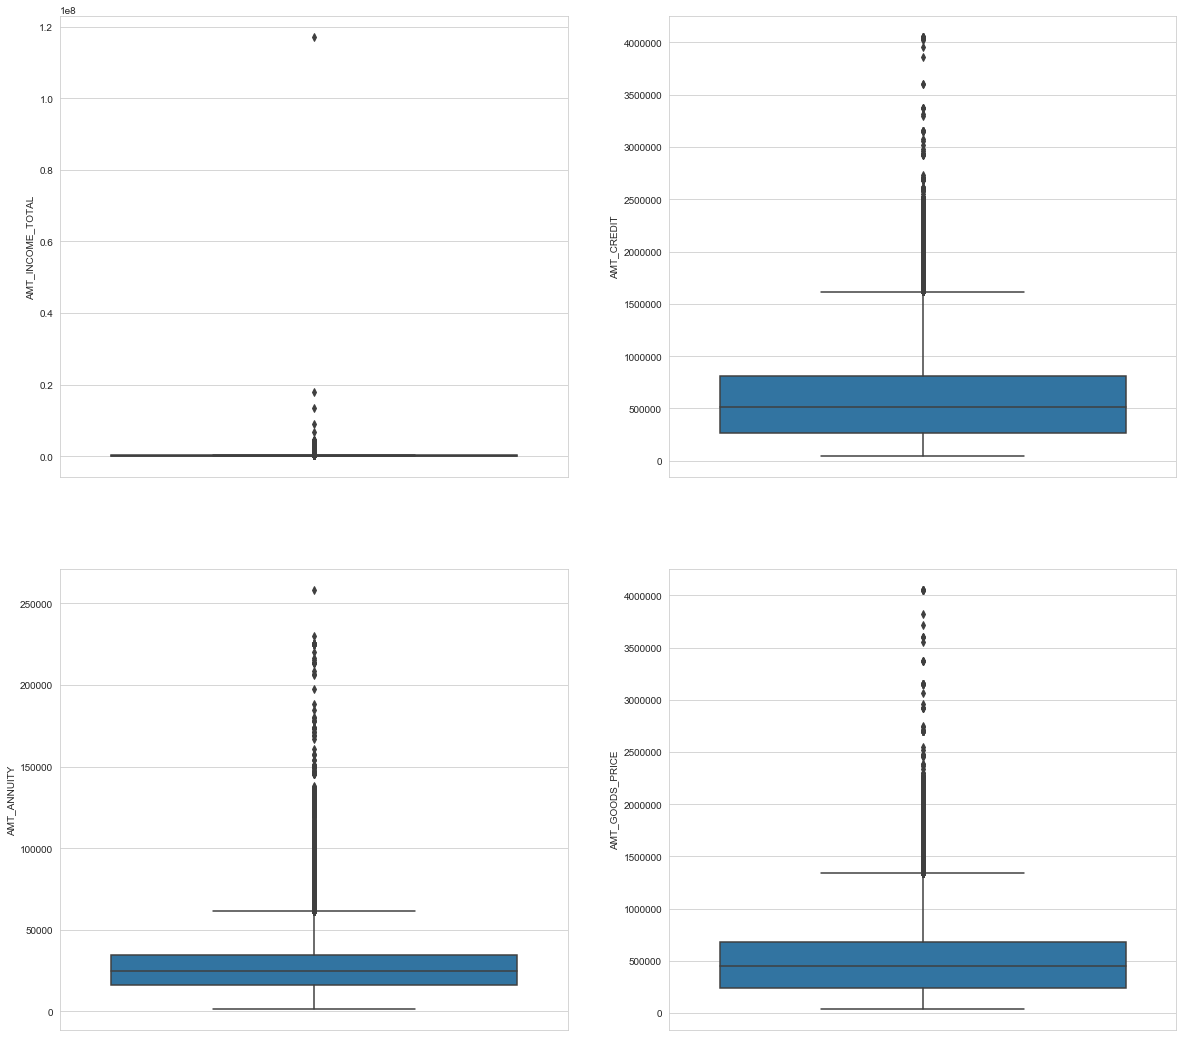

In [170]:
# For the quantitative columns, let's draw box plot to get a feel of range of values
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
# draw the plot for each column
plt.figure(figsize = (20,100))
indx = 1
for col in cols:
    plt.subplot(10,2,indx)
    sns.boxplot(y=application[col].dropna())       
    indx += 1
plt.show()

In [171]:
# We can clearly see that there are lot of outliers in these columns.AMT_INCOME_TOTAL plot is not visible at all.
# Removing values above 95% from these columns for better analysis

for i in cols:
    application = application.loc[application[i]< application[i].quantile(0.95),:]

In [172]:
# Dataframe inspection
df = inspect_df(application)
df

Shape:

(249519, 55)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
SK_ID_CURR                      int64              0             0.00   
TARGET                          int64              0             0.00   
NAME_CONTRACT_TYPE             object              0             0.00   
CODE_GENDER                    object              4             0.00   
FLAG_OWN_CAR                    int64              0             0.00   
FLAG_OWN_REALTY                 int64              0             0.00   
CNT_CHILDREN                    int64              0             0.00   
AMT_INCOME_TOTAL              float64              0             0.00   
AMT_CREDIT                    float64              0             0.00   
AMT_ANNUITY                   float64              0             0.00   
AMT_GOODS_PRICE               float64              0             0.00   
NAME_TYPE_SUITE                object            773             0.31   
NAME_INCOME_TYPE               object              0             0.00   
NAME_EDUCATION_TYPE            object              0             0.00   
NAME_FAMILY_STATUS             object              0             0.00   
NAME_HOUSING_TYPE              object              0             0.00   
REGION_POPULATION_RELATIVE    float64              0             0.00   
DAYS_BIRTH                      int64              0             0.00   
DAYS_EMPLOYED                 float64          48254            19.34   
DAYS_REGISTRATION             float64              0             0.00   
DAYS_ID_PUBLISH                 int64              0             0.00   
FLAG_MOBIL                      int64              0             0.00   
FLAG_EMP_PHONE                  int64              0             0.00   
FLAG_WORK_PHONE                 int64              0             0.00   
FLAG_CONT_MOBILE                int64              0             0.00   
FLAG_PHONE                      int64              0             0.00   
FLAG_EMAIL                      int64              0             0.00   
OCCUPATION_TYPE                object          80754            32.36   
CNT_FAM_MEMBERS               float64              0             0.00   
REGION_RATING_CLIENT            int64              0             0.00   
REGION_RATING_CLIENT_W_CITY     int64              0             0.00   
ORGANIZATION_TYPE              object          48254            19.34   
EXT_SOURCE_2                  float64            593             0.24   
EXT_SOURCE_3                  float64          50590            20.28   
FLAG_DOCUMENT_2                 int64              0             0.00   
FLAG_DOCUMENT_3                 int64              0             0.00   
FLAG_DOCUMENT_4                 int64              0             0.00   
FLAG_DOCUMENT_5                 int64              0             0.00   
FLAG_DOCUMENT_6                 int64              0             0.00   
FLAG_DOCUMENT_7                 int64              0             0.00   
FLAG_DOCUMENT_8                 int64              0             0.00   
FLAG_DOCUMENT_9                 int64              0             0.00   
FLAG_DOCUMENT_10                int64              0             0.00   
FLAG_DOCUMENT_11                int64              0             0.00   
FLAG_DOCUMENT_12                int64              0             0.00   
FLAG_DOCUMENT_13                int64              0             0.00   
FLAG_DOCUMENT_14                int64              0             0.00   
FLAG_DOCUMENT_15                int64              0             0.00   
FLAG_DOCUMENT_16                int64              0             0.00   
FLAG_DOCUMENT_17                int64              0             0.00   
FLAG_DOCUMENT_18                int64              0             0.00   
FLAG_DOCUMENT_19                int64              0             0.00   
FLAG_DOCUMENT_20                int64              0             0.00   
FLAG_DOCUMENT

In [173]:
# Percentage of Rows deleted
100 - round(100*len(application.index)/307511,2)

18.86

##### Approx 19% rows deleted so that we do not have outliers in the data. We still have 249519 rows to perform analysis.

#### Categorize or Binning of AGE & AMT_INCOME_TOTAL (Categorizing Quantitative Fields )

In [174]:
application['AGE'].describe()

count    249519.000000
mean         43.867777
std          12.262667
min          20.517808
25%          33.498630
50%          42.967123
75%          54.227397
max          69.043836
Name: AGE, dtype: float64

In [175]:
#Since all people who apply for loan lie between 20 - 69 (Young, MidAge and SeniorCitizens)
def ageCategory(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'MidAge'
    else:
        return 'SeniorCitizens'
    
application['AGE_CATEGORY'] = application['AGE'].apply(ageCategory)

In [176]:
#Similarly for AMT_INCOME_TOTAL lets categorize based on 4 quartile groups
application['AMT_INCOME_TOTAL'].describe()

count    249519.000000
mean     145578.980471
std       59523.263030
min       25650.000000
25%      103500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [177]:
#Since all people who apply for loan income lie 
#between 25650 - 337050 (Low Earning(0 - 100000), Mid Earning(100000 - 150000) and High Earning( more than 150000)

def CategorizeIncome(x):
    if x < 100000:
        return 'Low Earning'
    elif x >= 100000 and x < 150000:
        return 'Mid Earning'
    else:
        return 'High Earning'

application['INCOME_GROUP'] = application['AMT_INCOME_TOTAL'].apply(CategorizeIncome)

In [178]:
# Dataframe inspection
df = inspect_df(application)
df

Shape:

(249519, 57)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
SK_ID_CURR                      int64              0             0.00   
TARGET                          int64              0             0.00   
NAME_CONTRACT_TYPE             object              0             0.00   
CODE_GENDER                    object              4             0.00   
FLAG_OWN_CAR                    int64              0             0.00   
FLAG_OWN_REALTY                 int64              0             0.00   
CNT_CHILDREN                    int64              0             0.00   
AMT_INCOME_TOTAL              float64              0             0.00   
AMT_CREDIT                    float64              0             0.00   
AMT_ANNUITY                   float64              0             0.00   
AMT_GOODS_PRICE               float64              0             0.00   
NAME_TYPE_SUITE                object            773             0.31   
NAME_INCOME_TYPE               object              0             0.00   
NAME_EDUCATION_TYPE            object              0             0.00   
NAME_FAMILY_STATUS             object              0             0.00   
NAME_HOUSING_TYPE              object              0             0.00   
REGION_POPULATION_RELATIVE    float64              0             0.00   
DAYS_BIRTH                      int64              0             0.00   
DAYS_EMPLOYED                 float64          48254            19.34   
DAYS_REGISTRATION             float64              0             0.00   
DAYS_ID_PUBLISH                 int64              0             0.00   
FLAG_MOBIL                      int64              0             0.00   
FLAG_EMP_PHONE                  int64              0             0.00   
FLAG_WORK_PHONE                 int64              0             0.00   
FLAG_CONT_MOBILE                int64              0             0.00   
FLAG_PHONE                      int64              0             0.00   
FLAG_EMAIL                      int64              0             0.00   
OCCUPATION_TYPE                object          80754            32.36   
CNT_FAM_MEMBERS               float64              0             0.00   
REGION_RATING_CLIENT            int64              0             0.00   
REGION_RATING_CLIENT_W_CITY     int64              0             0.00   
ORGANIZATION_TYPE              object          48254            19.34   
EXT_SOURCE_2                  float64            593             0.24   
EXT_SOURCE_3                  float64          50590            20.28   
FLAG_DOCUMENT_2                 int64              0             0.00   
FLAG_DOCUMENT_3                 int64              0             0.00   
FLAG_DOCUMENT_4                 int64              0             0.00   
FLAG_DOCUMENT_5                 int64              0             0.00   
FLAG_DOCUMENT_6                 int64              0             0.00   
FLAG_DOCUMENT_7                 int64              0             0.00   
FLAG_DOCUMENT_8                 int64              0             0.00   
FLAG_DOCUMENT_9                 int64              0             0.00   
FLAG_DOCUMENT_10                int64              0             0.00   
FLAG_DOCUMENT_11                int64              0             0.00   
FLAG_DOCUMENT_12                int64              0             0.00   
FLAG_DOCUMENT_13                int64              0             0.00   
FLAG_DOCUMENT_14                int64              0             0.00   
FLAG_DOCUMENT_15                int64              0             0.00   
FLAG_DOCUMENT_16                int64              0             0.00   
FLAG_DOCUMENT_17                int64              0             0.00   
FLAG_DOCUMENT_18                int64              0             0.00   
FLAG_DOCUMENT_19                int64              0             0.00   
FLAG_DOCUMENT_20                int64              0             0.00   
FLAG_DOCUMENT

### Imbalance in Data

In [179]:
# Target = 1 Client with payment difficulties
round(len(application[application['TARGET']==1])/len(application.index),2)

0.09

In [180]:
# Target = 0 All other cases
round(len(application[application['TARGET']==0])/len(application.index),2)

0.91

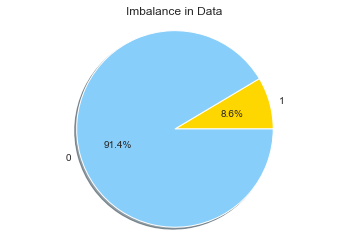

In [181]:
# Plot pie chart for imbalance ratio
plt.pie([len(application[application['TARGET']==1]),len(application[application['TARGET']==0])], labels=[1,0],colors=['gold', 'lightskyblue'],
autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Imbalance in Data')
plt.show()

##### We can see that there are 91.4% data where there is no default in loans,whereas only 8.6% data where we have defaulters, which leads to imbalance in data during analysis.

### Univariate Analysis

##### For Categorical Variables

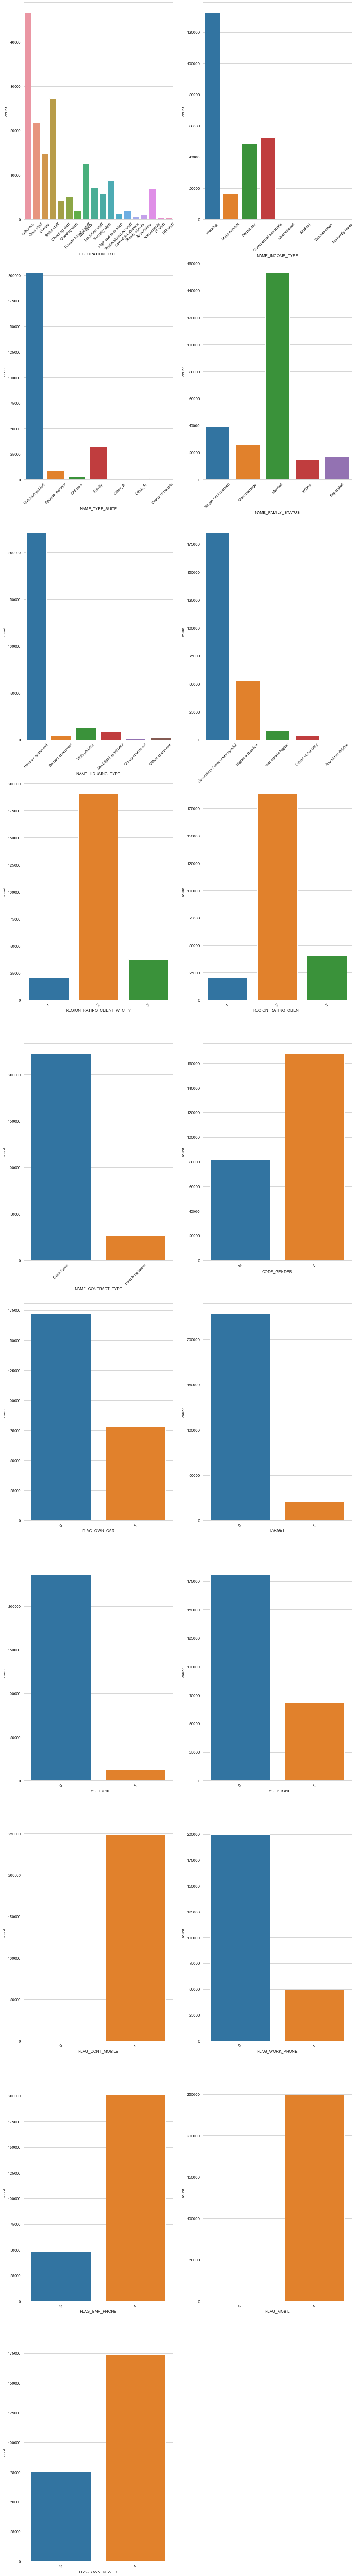

In [185]:
plot_freq_categorical_cols = ['OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'NAME_EDUCATION_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','TARGET','FLAG_EMAIL','FLAG_PHONE','FLAG_CONT_MOBILE',
'FLAG_WORK_PHONE','FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_OWN_REALTY']

plt.figure(figsize = (15,120))
indx = 1
for col in plot_freq_categorical_cols:
    plt.subplot(10,2,indx)
    sns.countplot(x=col, data = application)
    plt.xticks(rotation= 45)
    indx += 1
plt.show()

#### Above plots shows how many customers lie in particular category and here are insights
1. Clearly Laborers apply more for loans, followed by Sales Staff and Core Staff
2. Working Clients apply more loans followed by Commercial associates then by Pensioners
3. Married people apply for more loans followed by Single/ Not Married
4. Most people who apply for loan have a House /apartment
5. Females apply more loans than Males
6. Cash Loans applications are more than Revolving Loans
7. Most people applying for loan don't own a Car, but most own house/flat, phone and email.
8. Most of the people are not defaulting on their installments.
9. Secondary/ Secondary Special educated people apply for more loan followed by Higher education and Incomplete Higher

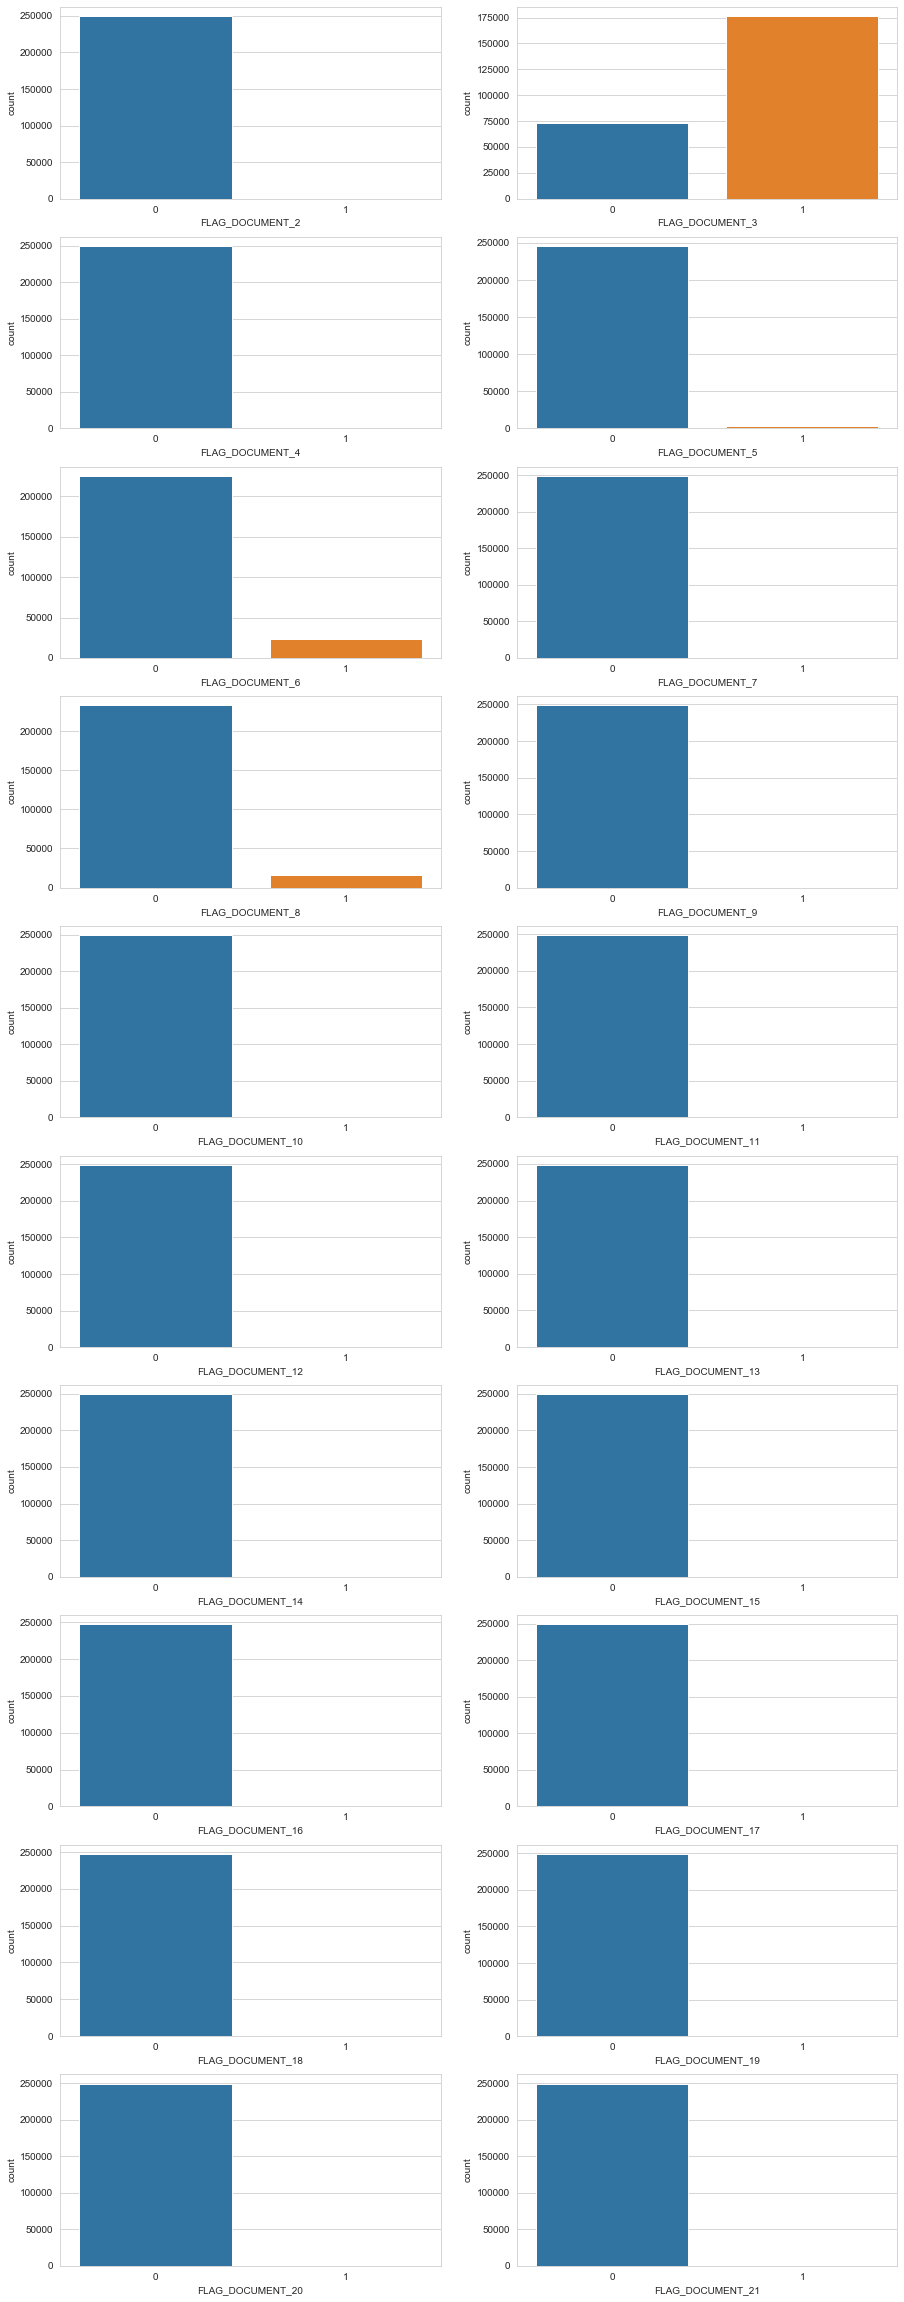

In [87]:
# Plotting all the FLAG_DOCUMENT columns 
indx=1
plt.figure(figsize=(15,50))
for i in range(2,22) :    
    plt.subplot(12,2,indx)  
    sns.countplot(x='FLAG_DOCUMENT_'+str(i), data = application)
    indx += 1

##### As we can see that except FLAG_DOCUMENT_3 all the columns have negligible count of 1s. So we are removing all the FLAG_DOCUMENT columns after making the observation

In [88]:
col_remove = ['FLAG_DOCUMENT_'+str(i)  for i in range(2,22)]
application = application.drop(col_remove, axis =1)

#### Quantitative Columns

1. EXT_SOURCE_2
2. DAYS_BIRTH
3. DAYS_REGISTRATION
4. AMT_ANNUITY
5. DAYS_EMPLOYED
6. DAYS_ID_PUBLISH
7. AMT_CREDIT
8. AMT_INCOME_TOTAL
9. AMT_GOODS_PRICE
10. EXT_SOURCE_3
11. REGION_POPULATION_RELATIVE

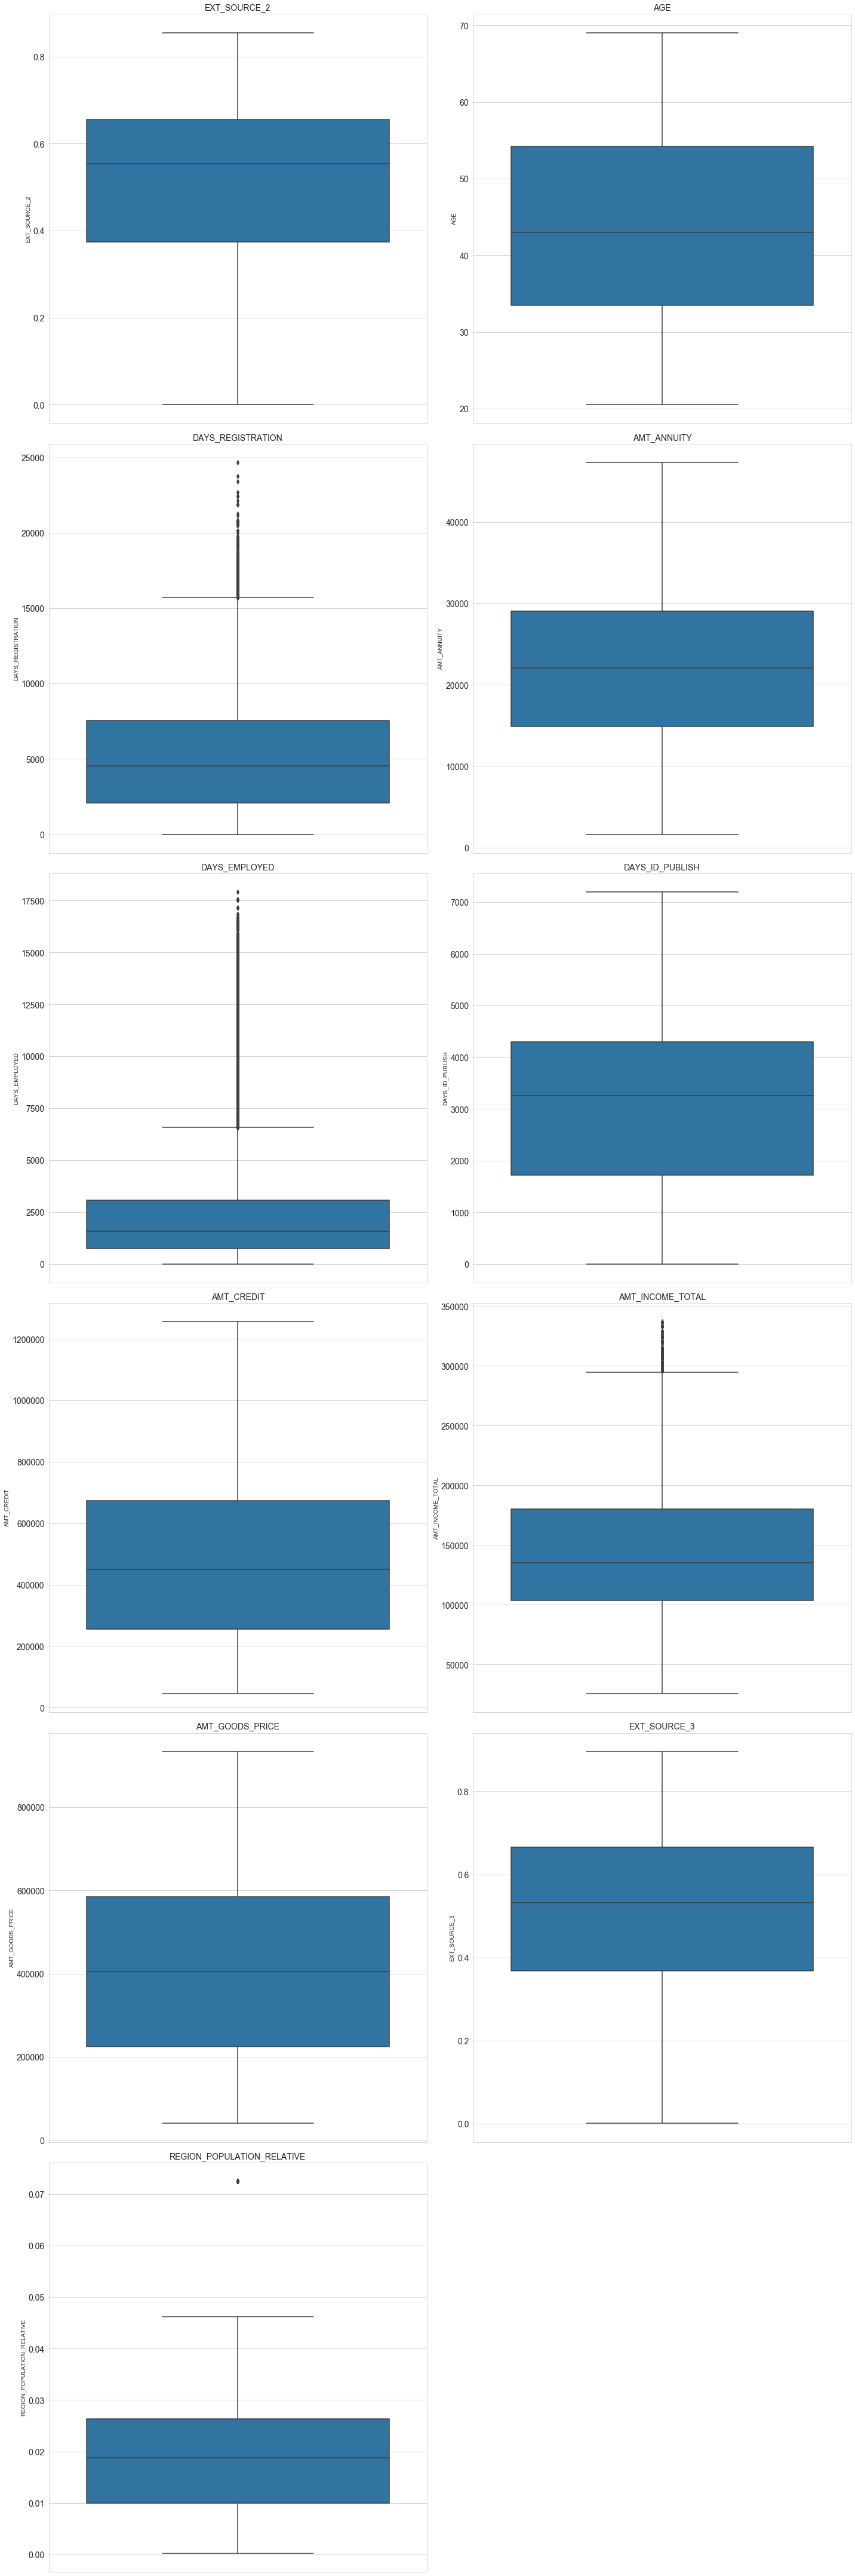

In [89]:
quantative_cols =['EXT_SOURCE_2', 'AGE','DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 
                   'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'REGION_POPULATION_RELATIVE']
# Let's plot and see the spread of each categorical values

# figure size
plt.figure(figsize=(20,60))
ctr = 1
for i in quantative_cols:    
    plt.subplot(6,2,ctr)
    sns.boxplot(y=application[i])
    plt.title(i, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ctr+=1
plt.tight_layout()
plt.show()

#### Clearly we can make out few observations from the above plots
1. Majority of Normalized score of the population from external data source 2 lies around in between 0.4 - 0.65, clearly External source 3 is also having near about similar values.
2. Majority of Age of Loan applicants lies around in between 35 - 55 years.
3. Majority of DAYS_REGISTRATION column values lies around in between 2500 - 5500 days, clearly there are lot of outliers as well who havent changed their registration since long.
4. DAYS_ID_PUBLISH columns we can notice majority of the client change their identity document nearly 1800 - 4200 days before applying loan.
5. REGION_POPULATION_RELATIVE column spread is nearly between 0.01 - 0.029.
6. We notice that AMT columns and DAYS_EMPLOYED are having a lot of outliers we need to analyse further.


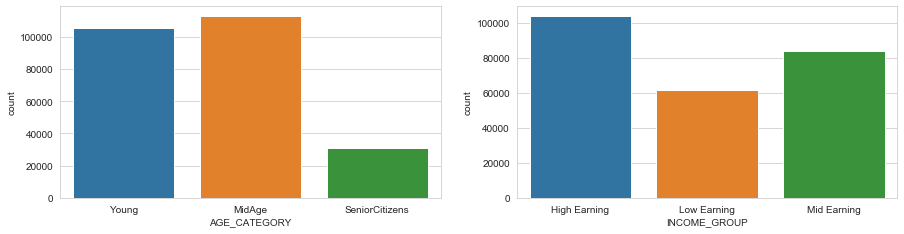

In [90]:
# Plotting all the AGE_Category and INCOME_GROUP columns

plt.figure(figsize=(15,50))
plt.subplot(12,2,1)  
sns.countplot(x='AGE_CATEGORY', data = application)
plt.subplot(12,2,2)  
sns.countplot(x='INCOME_GROUP', data = application)
plt.show()

### Clear insights can be drawn from the plots
1. Mid Age Group apply most for the loan followed by Young people.
2. High Earning followed by Mid Earning apply for loan most

### Let's split the population into two population sets with TARGET 0 and 1

In [91]:
application_NotDefaulters = application[application['TARGET'] == 0]
application_Defaulters = application[application['TARGET'] == 1]

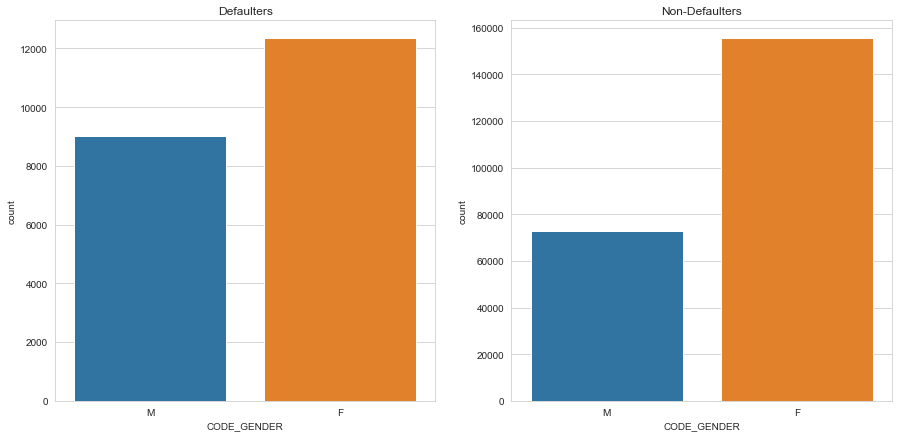

In [92]:
#Univariant Analysis on two sets of data
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)    
sns.countplot(x = 'CODE_GENDER',data=application_Defaulters)
plt.title('Defaulters')

plt.subplot(1,2,2) 
sns.countplot(x = 'CODE_GENDER',data=application_NotDefaulters)
plt.title('Non-Defaulters')   
plt.show()

### Insights: 
Above count plot makes no sense we can Females are toping both the defaulters and non-Defaulters list as Female count is more than male Count. We would want percenage of male & female who are defaulters.

In [93]:
# For percentage calculation we have divided Defaulters count / total count * 100
defaulters_gender_perc = round(((application_Defaulters.CODE_GENDER.value_counts()/application.CODE_GENDER.value_counts()) * 100),2).to_frame().reset_index()
not_defaulters_gender_perc = round(((application_NotDefaulters.CODE_GENDER.value_counts()/application.CODE_GENDER.value_counts()) * 100),2).to_frame().reset_index()

defaulters_gender_perc

index  CODE_GENDER
0     F         7.36
1     M        11.03

In [94]:
not_defaulters_gender_perc

index  CODE_GENDER
0     F        92.64
1     M        88.97

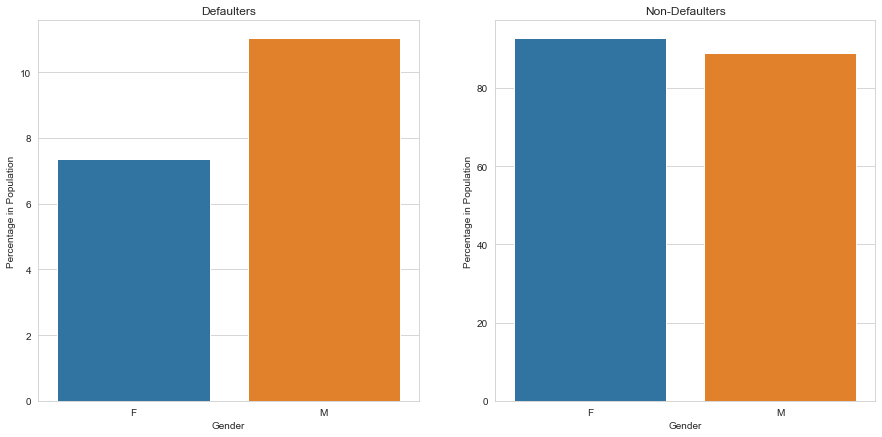

In [95]:
#Univariant Analysis on two sets of data
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)    
sns.barplot(x= 'index',y = 'CODE_GENDER',data=defaulters_gender_perc)
plt.title('Defaulters')
plt.xlabel('Gender')
plt.ylabel('Percentage in Population')

plt.subplot(1,2,2) 
sns.barplot(x= 'index',y = 'CODE_GENDER',data=not_defaulters_gender_perc)
plt.title('Non-Defaulters')   
plt.xlabel('Gender')
plt.ylabel('Percentage in Population')
plt.show()

### Insights: 
Clearly Male Defaulters (11.03%) are more than Female Defaulters (7.36%)

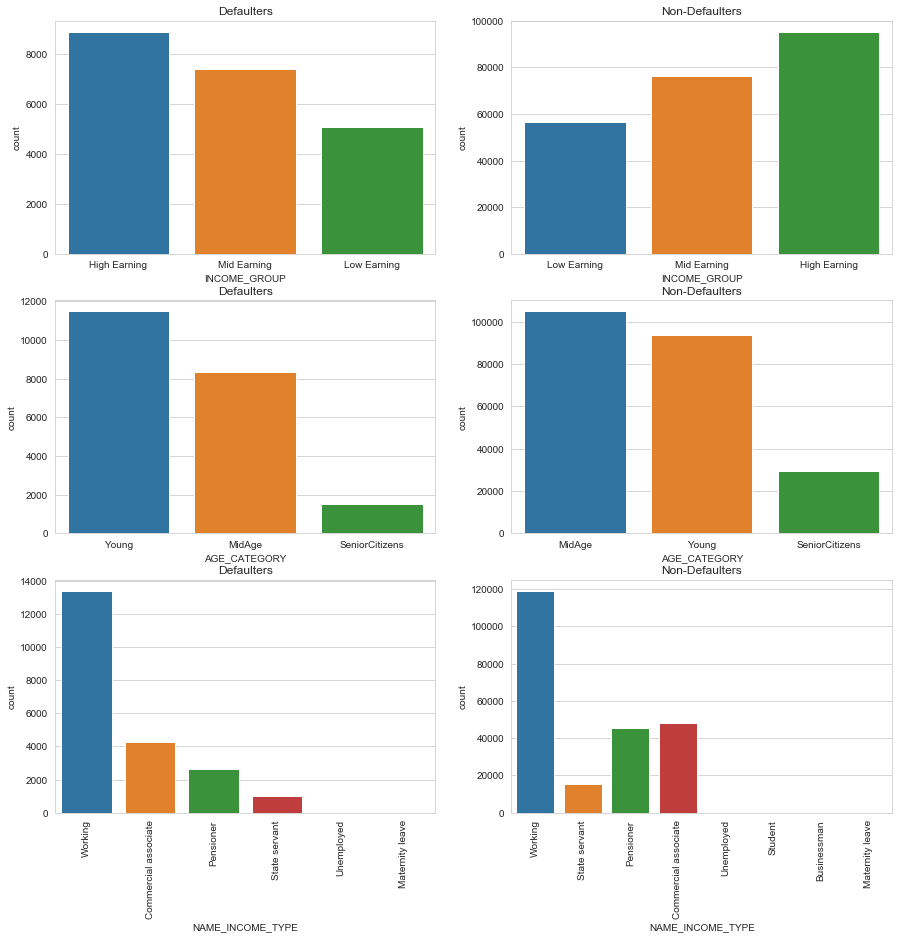

In [96]:
#Univariant Analysis on two sets of data
plt.figure(figsize=(15,30))

plt.subplot(6,2,1)    
sns.countplot(x = 'INCOME_GROUP',data=application_Defaulters)
plt.title('Defaulters')

plt.subplot(6,2,2) 
sns.countplot(x = 'INCOME_GROUP',data=application_NotDefaulters)
plt.title('Non-Defaulters')

plt.subplot(6,2,3)    
sns.countplot(x = 'AGE_CATEGORY',data=application_Defaulters)
plt.title('Defaulters')

plt.subplot(6,2,4) 
sns.countplot(x = 'AGE_CATEGORY',data=application_NotDefaulters)
plt.title('Non-Defaulters') 

plt.subplot(6,2,5)    
sns.countplot(x = 'NAME_INCOME_TYPE',data=application_Defaulters)
plt.title('Defaulters')
plt.xticks(rotation= 90)

plt.subplot(6,2,6) 
sns.countplot(x = 'NAME_INCOME_TYPE',data=application_NotDefaulters)
plt.title('Non-Defaulters')
plt.xticks(rotation= 90)
plt.show()

### Insights: 
1. Previously we noticed that Mid Age Group apply most for the loan followed by Young people but in defaulters list we notice young people default more than that of Mid Age Group.
2. High Earning followed by Mid Earning apply for loan most, so defaulters are for High earning people are more than mid earning people.
3. Working Clients apply more loans followed by Commercial associates then by Pensioners and same trends follows for defaulters and non defaulters also

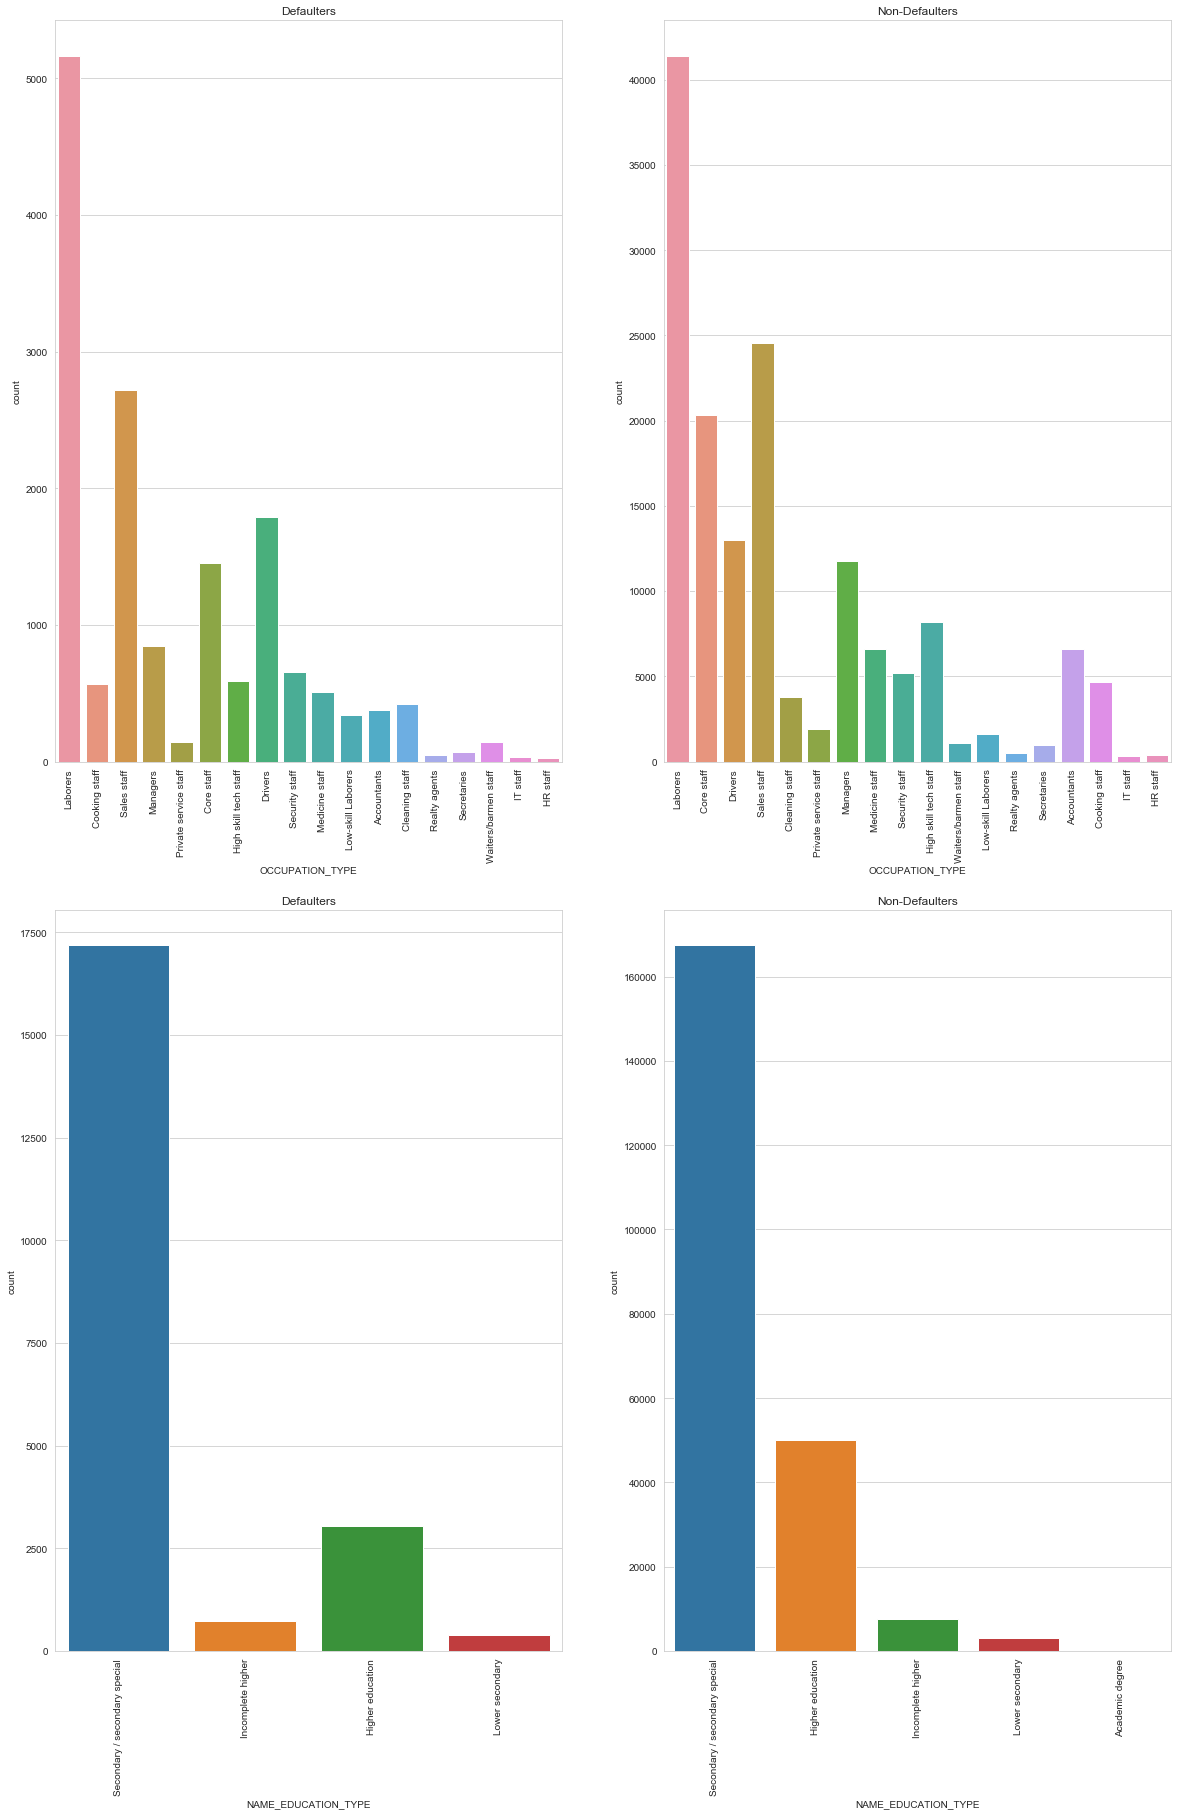

In [97]:
#Univariant Analysis on two sets of data
plt.figure(figsize=(20,30))

plt.subplot(2,2,1)    
sns.countplot(x = 'OCCUPATION_TYPE',data=application_Defaulters)
plt.title('Defaulters')
plt.xticks(rotation= 90)

plt.subplot(2,2,2) 
sns.countplot(x = 'OCCUPATION_TYPE',data=application_NotDefaulters)
plt.title('Non-Defaulters')
plt.xticks(rotation= 90)

plt.subplot(2,2,3)    
sns.countplot(x = 'NAME_EDUCATION_TYPE',data=application_Defaulters)
plt.title('Defaulters')
plt.xticks(rotation= 90)

plt.subplot(2,2,4) 
sns.countplot(x = 'NAME_EDUCATION_TYPE',data=application_NotDefaulters)
plt.title('Non-Defaulters')
plt.xticks(rotation= 90)
plt.show()

### Insights: 
1. Previously we noticed Laborers apply more loan and hence they top the list in both defaulters as well as non defaulters followed by Sales Staff.
2. Previously we noticed Secondary/Secondary Special apply more loan and hence they top the list in both defaulters as well as non defaulters followed by Higher Secondary.

#### Univariate for Continuous variables

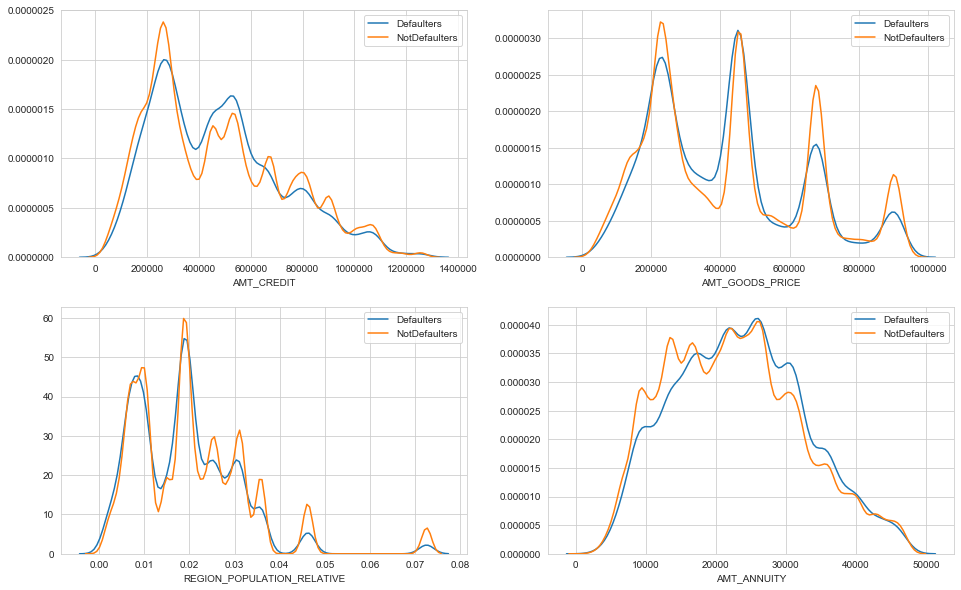

In [98]:
col = ['AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_ANNUITY']
index = 1
plt.figure(figsize=(16,10))
for c in col:
    plt.subplot(2,2,index) 
    sns.distplot(application_Defaulters[c],hist=False, label = 'Defaulters')
    sns.distplot(application_NotDefaulters[c],hist=False, label = 'NotDefaulters')
    plt.legend(loc='upper right')
    index += 1
plt.show()

### Insights: 
1. When comparing Defaulters to Non Defaulters for AMT_CREDIT both go hand in hand except in the middle we see a sudden spike of more Defaulters than NonDEfaulters when the amount of Credit is around 500000
2. Due to outliers we are not able to make out any insights in INCOME plot.
3. When comparing Defaulters to Non Defaulters for AMT_GOODS_PRICE similar trend can be seen we see a sudden spike of more Defaulters than NonDEfaulters when the amount of Credit is around 500000
4. For REGION_POPULATION_RELATIVE we can notice there is good amount of gap and profit area for banks where non defaulters are more than defaulters where population relative is between 0.04 - 0.05 and 0.07 - 0.08. Banks should concentrate more in those areas.
5. For AMT_ANNUITY, we can see loss area where defaulters are more when annuity is around 25000.

### Bivariate analysis

#### For continuous variables

In [99]:
# Correlation for the population
cols = ['SK_ID_CURR','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'NAME_EDUCATION_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_EMAIL',
'FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_WORK_PHONE','FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_OWN_REALTY','DAYS_BIRTH']

corr_matrix = application.drop(cols,axis =1)
corr_matrix = corr_matrix.corr()
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.Correlation = abs(corrdf.Correlation)
corrdf.sort_values('Correlation', ascending = False)

Col1                        Col2  Correlation
73              AMT_GOODS_PRICE                  AMT_CREDIT     0.976080
141             CNT_FAM_MEMBERS                CNT_CHILDREN     0.875547
59                  AMT_ANNUITY                  AMT_CREDIT     0.748642
74              AMT_GOODS_PRICE                 AMT_ANNUITY     0.748504
58                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.362981
189                         AGE               DAYS_EMPLOYED     0.356127
190                         AGE           DAYS_REGISTRATION     0.337489
183                         AGE                CNT_CHILDREN     0.332287
191                         AGE             DAYS_ID_PUBLISH     0.300857
72              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.290087
44                   AMT_CREDIT            AMT_INCOME_TOTAL     0.284640
192                         AGE             CNT_FAM_MEMBERS     0.281857
194                         AGE                EXT_SOURCE_3     0.215856
113           DAYS_REGISTRATION                CNT_CHILDREN     0.188018
168                EXT_SOURCE_3                      TARGET     0.184988
148             CNT_FAM_MEMBERS           DAYS_REGISTRATION     0.177321
119           DAYS_REGISTRATION               DAYS_EMPLOYED     0.174381
160                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.173643
154                EXT_SOURCE_2                      TARGET     0.161367
177                EXT_SOURCE_3             DAYS_ID_PUBLISH     0.139371
156                EXT_SOURCE_2            AMT_INCOME_TOTAL     0.129800
175                EXT_SOURCE_3               DAYS_EMPLOYED     0.129763
86   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL     0.118630
179                EXT_SOURCE_3                EXT_SOURCE_2     0.112222
176                EXT_SOURCE_3           DAYS_REGISTRATION     0.111174
134             DAYS_ID_PUBLISH           DAYS_REGISTRATION     0.108106
170                EXT_SOURCE_3            AMT_INCOME_TOTAL     0.102965
184                         AGE            AMT_INCOME_TOTAL     0.101504
133             DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.096067
193                         AGE                EXT_SOURCE_2     0.094442
161                EXT_SOURCE_2               DAYS_EMPLOYED     0.092420
182                         AGE                      TARGET     0.084237
159                EXT_SOURCE_2             AMT_GOODS_PRICE     0.081859
103               DAYS_EMPLOYED             AMT_GOODS_PRICE     0.075712
98                DAYS_EMPLOYED                      TARGET     0.075199
101               DAYS_EMPLOYED                  AMT_CREDIT     0.072164
114           DAYS_REGISTRATION            AMT_INCOME_TOTAL     0.072082
144             CNT_FAM_MEMBERS                 AMT_ANNUITY     0.070107
157                EXT_SOURCE_2                  AMT_CREDIT     0.069595
158                EXT_SOURCE_2                 AMT_ANNUITY     0.063459
162                EXT_SOURCE_2           DAYS_REGISTRATION     0.062168
99                DAYS_EMPLOYED                CNT_CHILDREN     0.057230
126             DAYS_ID_PUBLISH                      TARGET     0.056192
163                EXT_SOURCE_2             DAYS_ID_PUBLISH     0.054759
143             CNT_FAM_MEMBERS                  AMT_CREDIT     0.051554
118           DAYS_REGISTRATION  REGION_POPULATION_RELATIVE     0.049628
145             CNT_FAM_MEMBERS             AMT_GOODS_PRICE     0.049299
112           DAYS_REGISTRATION                      TARGET     0.046803
88   REGION_POPULATION_RELATIVE                 AMT_ANNUITY     0.046302
185                         AGE                  AMT_CREDIT     0.045845
169                EXT_SOURCE_3                CNT_CHILDREN     0.045706
187                         AGE             AMT_GOODS_PRICE     0.045702
89   REGION_POPULATION_RELATIVE             AMT_GOODS_PRICE     0.040757
116           DAYS_REGISTRATION                 AMT_ANNUITY     0.037493
128         

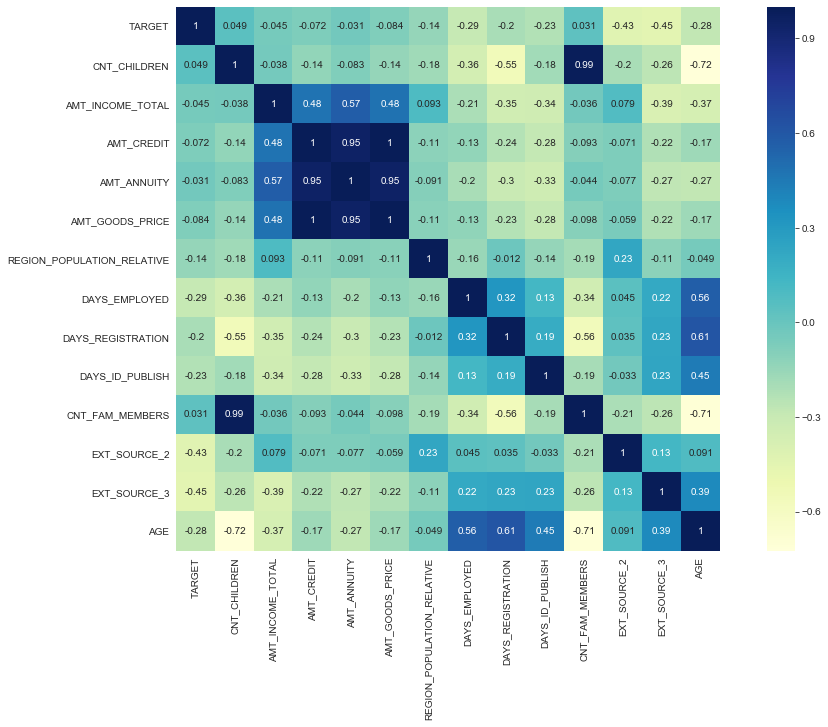

In [100]:
#### Corelation of relevant columns on population data

plt.figure(figsize = (17,10))
ax = sns.heatmap(corr_matrix.corr(),cmap="YlGnBu", annot=True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation= 90)
plt.yticks(rotation= 0) 
plt.show()


#### Insights:

#### Important observation for correlation to make are 
1. AMT_GOODS_PRICE and AMT_CREDIT have a good positive correlation of 0.976080
2. AMT_GOODS_PRICE and AMT_ANNUITY have a good positive correlation of 0.748504
3. AMT_ANNUITY and AMT_CREDIT  have a good positive correlation of 0.748642
4. CNT_FAM_MEMBERS and CNT_CHILDREN have a good positive correlation of 0.875547 which is quite obvious

#### For continuous variables after splitting dataframe

In [101]:
corr_matrix = application_Defaulters.drop(cols,axis =1)
corr_matrix = corr_matrix.corr()

corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.Correlation = abs(corrdf.Correlation)
corrdf.sort_values('Correlation', ascending = False)

Col1                        Col2  Correlation
73              AMT_GOODS_PRICE                  AMT_CREDIT     0.971472
141             CNT_FAM_MEMBERS                CNT_CHILDREN     0.883714
59                  AMT_ANNUITY                  AMT_CREDIT     0.737421
74              AMT_GOODS_PRICE                 AMT_ANNUITY     0.733866
58                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.342474
189                         AGE               DAYS_EMPLOYED     0.307919
190                         AGE           DAYS_REGISTRATION     0.287535
72              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.271683
44                   AMT_CREDIT            AMT_INCOME_TOTAL     0.269362
191                         AGE             DAYS_ID_PUBLISH     0.266074
183                         AGE                CNT_CHILDREN     0.255514
192                         AGE             CNT_FAM_MEMBERS     0.205053
194                         AGE                EXT_SOURCE_3     0.174330
160                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.153140
113           DAYS_REGISTRATION                CNT_CHILDREN     0.148153
148             CNT_FAM_MEMBERS           DAYS_REGISTRATION     0.146453
119           DAYS_REGISTRATION               DAYS_EMPLOYED     0.136257
177                EXT_SOURCE_3             DAYS_ID_PUBLISH     0.128031
187                         AGE             AMT_GOODS_PRICE     0.116272
156                EXT_SOURCE_2            AMT_INCOME_TOTAL     0.116195
185                         AGE                  AMT_CREDIT     0.115264
193                         AGE                EXT_SOURCE_2     0.103575
103               DAYS_EMPLOYED             AMT_GOODS_PRICE     0.101859
133             DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.100352
134             DAYS_ID_PUBLISH           DAYS_REGISTRATION     0.098307
101               DAYS_EMPLOYED                  AMT_CREDIT     0.093579
161                EXT_SOURCE_2               DAYS_EMPLOYED     0.090994
176                EXT_SOURCE_3           DAYS_REGISTRATION     0.084858
175                EXT_SOURCE_3               DAYS_EMPLOYED     0.083915
159                EXT_SOURCE_2             AMT_GOODS_PRICE     0.082351
179                EXT_SOURCE_3                EXT_SOURCE_2     0.077949
170                EXT_SOURCE_3            AMT_INCOME_TOTAL     0.076939
144             CNT_FAM_MEMBERS                 AMT_ANNUITY     0.076241
86   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL     0.071396
157                EXT_SOURCE_2                  AMT_CREDIT     0.069638
162                EXT_SOURCE_2           DAYS_REGISTRATION     0.065066
158                EXT_SOURCE_2                 AMT_ANNUITY     0.065009
163                EXT_SOURCE_2             DAYS_ID_PUBLISH     0.060285
173                EXT_SOURCE_3             AMT_GOODS_PRICE     0.060029
171                EXT_SOURCE_3                  AMT_CREDIT     0.059766
143             CNT_FAM_MEMBERS                  AMT_CREDIT     0.056908
89   REGION_POPULATION_RELATIVE             AMT_GOODS_PRICE     0.053312
145             CNT_FAM_MEMBERS             AMT_GOODS_PRICE     0.052452
131             DAYS_ID_PUBLISH             AMT_GOODS_PRICE     0.048876
188                         AGE  REGION_POPULATION_RELATIVE     0.048262
118           DAYS_REGISTRATION  REGION_POPULATION_RELATIVE     0.045042
116           DAYS_REGISTRATION                 AMT_ANNUITY     0.043791
129             DAYS_ID_PUBLISH                  AMT_CREDIT     0.042583
87   REGION_POPULATION_RELATIVE                  AMT_CREDIT     0.040519
57                  AMT_ANNUITY                CNT_CHILDREN     0.038562
114           DAYS_REGISTRATION            AMT_INCOME_TOTAL     0.035835
102               DAYS_EMPLOYED                 AMT_ANNUITY     0.033483
127             DAYS_ID_PUBLISH                CNT_CHILDREN     0.029147
85   REGION_POPULATION_RELATIVE                CNT_CHILDREN     0.027329
88   REGION_

#### Insights: 
#### Important observation for correlation to make are which holds true for both for the population as well as defaulters
1. AMT_GOODS_PRICE and AMT_CREDIT have a good positive correlation of 0.971472
2. AMT_GOODS_PRICE and AMT_ANNUITY have a good positive correlation of 0.733866
3. AMT_ANNUITY and AMT_CREDIT  have a good positive correlation of 0.737421
4. CNT_FAM_MEMBERS and CNT_CHILDREN have a good positive correlation of 0.883714 which is quite obvious

In [102]:
corr_matrix1 = application_NotDefaulters.drop(cols,axis =1)
corr_matrix1 = corr_matrix.corr()

corrdf = corr_matrix1.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.Correlation = abs(corrdf.Correlation)
corrdf.sort_values('Correlation', ascending = False)

Col1                        Col2  Correlation
73              AMT_GOODS_PRICE                  AMT_CREDIT     0.999374
141             CNT_FAM_MEMBERS                CNT_CHILDREN     0.990491
59                  AMT_ANNUITY                  AMT_CREDIT     0.934085
74              AMT_GOODS_PRICE                 AMT_ANNUITY     0.932629
183                         AGE                CNT_CHILDREN     0.685300
192                         AGE             CNT_FAM_MEMBERS     0.667866
58                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.521438
148             CNT_FAM_MEMBERS           DAYS_REGISTRATION     0.513437
113           DAYS_REGISTRATION                CNT_CHILDREN     0.501236
190                         AGE           DAYS_REGISTRATION     0.495991
189                         AGE               DAYS_EMPLOYED     0.445379
72              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.418386
44                   AMT_CREDIT            AMT_INCOME_TOTAL     0.417002
170                EXT_SOURCE_3            AMT_INCOME_TOTAL     0.363135
191                         AGE             DAYS_ID_PUBLISH     0.352320
116           DAYS_REGISTRATION                 AMT_ANNUITY     0.317947
99                DAYS_EMPLOYED                CNT_CHILDREN     0.300304
130             DAYS_ID_PUBLISH                 AMT_ANNUITY     0.297739
147             CNT_FAM_MEMBERS               DAYS_EMPLOYED     0.283542
114           DAYS_REGISTRATION            AMT_INCOME_TOTAL     0.274911
128             DAYS_ID_PUBLISH            AMT_INCOME_TOTAL     0.273816
178                EXT_SOURCE_3             CNT_FAM_MEMBERS     0.255382
186                         AGE                 AMT_ANNUITY     0.252420
184                         AGE            AMT_INCOME_TOTAL     0.252316
129             DAYS_ID_PUBLISH                  AMT_CREDIT     0.247112
131             DAYS_ID_PUBLISH             AMT_GOODS_PRICE     0.244666
169                EXT_SOURCE_3                CNT_CHILDREN     0.240300
194                         AGE                EXT_SOURCE_3     0.235450
164                EXT_SOURCE_2             CNT_FAM_MEMBERS     0.233135
172                EXT_SOURCE_3                 AMT_ANNUITY     0.229682
155                EXT_SOURCE_2                CNT_CHILDREN     0.226950
115           DAYS_REGISTRATION                  AMT_CREDIT     0.224198
146             CNT_FAM_MEMBERS  REGION_POPULATION_RELATIVE     0.222204
117           DAYS_REGISTRATION             AMT_GOODS_PRICE     0.222198
102               DAYS_EMPLOYED                 AMT_ANNUITY     0.211118
85   REGION_POPULATION_RELATIVE                CNT_CHILDREN     0.207755
71              AMT_GOODS_PRICE                CNT_CHILDREN     0.203961
100               DAYS_EMPLOYED            AMT_INCOME_TOTAL     0.201403
43                   AMT_CREDIT                CNT_CHILDREN     0.193191
119           DAYS_REGISTRATION               DAYS_EMPLOYED     0.190469
149             CNT_FAM_MEMBERS             DAYS_ID_PUBLISH     0.190169
174                EXT_SOURCE_3  REGION_POPULATION_RELATIVE     0.181096
127             DAYS_ID_PUBLISH                CNT_CHILDREN     0.175364
173                EXT_SOURCE_3             AMT_GOODS_PRICE     0.172221
171                EXT_SOURCE_3                  AMT_CREDIT     0.171043
29             AMT_INCOME_TOTAL                CNT_CHILDREN     0.166858
145             CNT_FAM_MEMBERS             AMT_GOODS_PRICE     0.163474
142             CNT_FAM_MEMBERS            AMT_INCOME_TOTAL     0.162480
132             DAYS_ID_PUBLISH  REGION_POPULATION_RELATIVE     0.160740
87   REGION_POPULATION_RELATIVE                  AMT_CREDIT     0.155122
160                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.153162
143             CNT_FAM_MEMBERS                  AMT_CREDIT     0.152879
88   REGION_POPULATION_RELATIVE                 AMT_ANNUITY     0.149305
104               DAYS_EMPLOYED  REGION_POPULATION_RELATIVE     0.148976
157         

#### Insights: 
#### Important observation for correlation to make are which holds true for both for the non defaulter as well as defaulters
1. AMT_GOODS_PRICE and AMT_CREDIT have a good positive correlation of 0.976553 which was 0.971472 for defaulters
2. AMT_GOODS_PRICE and AMT_ANNUITY have a good positive correlation of 0.750547 which was 0.733866 for defaulters
3. AMT_ANNUITY and AMT_CREDIT  have a good positive correlation of 0.749907 which was 0.737421 for defaulters
4. CNT_FAM_MEMBERS and CNT_CHILDREN have a good positive correlation of 0.874701 which was 0.883714 for defaulters

So Overall Corelations remain the same even after data is split

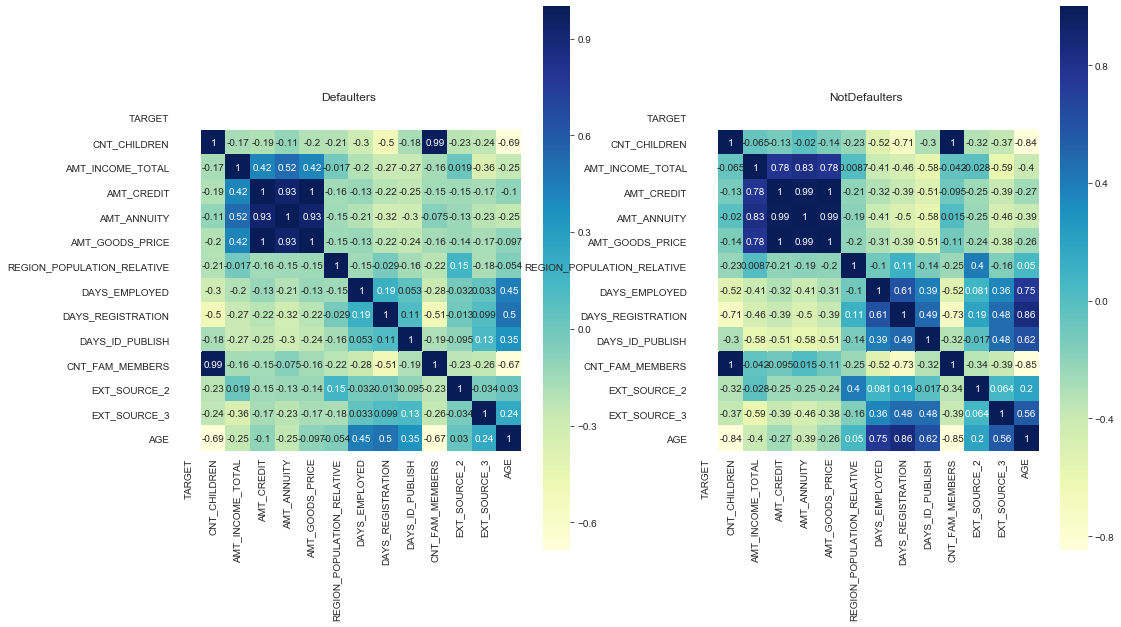

In [103]:
# Lets see the plot for both
plt.figure(figsize = (17,10))
plt.subplot(1,2,1)
plt.title('Defaulters')
ax = sns.heatmap(corr_matrix.corr(),cmap="YlGnBu", annot=True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation= 90)
plt.yticks(rotation= 0)
plt.subplot(1,2,2)
plt.title('NotDefaulters')
ax = sns.heatmap(corr_matrix1.corr(),cmap="YlGnBu", annot=True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation= 90)
plt.yticks(rotation= 0) 
plt.show()

#### We can clearly see both Defaulter's heat map and Non Defaulter's heat map is almost similar.

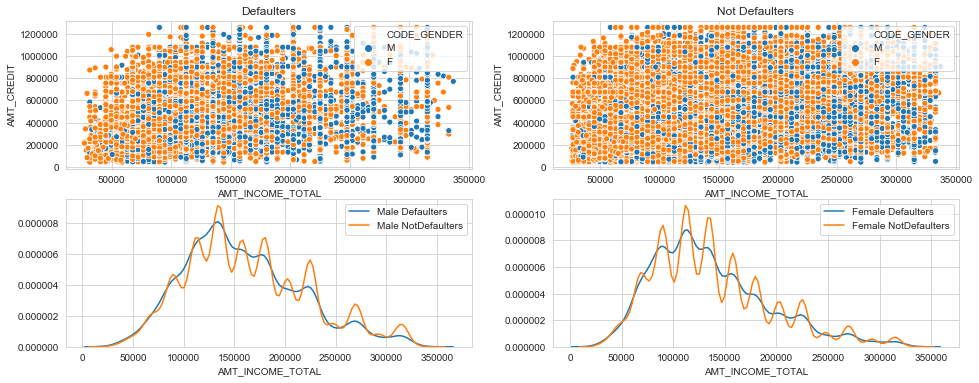

In [104]:
# Let's plot AMT_INCOME_TOTAL vs AMT_CREDIT with Gender for Both Defaulters and Not Defaulters

plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=application_Defaulters)
plt.title('Defaulters')

plt.subplot(2,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=application_NotDefaulters)
plt.title('Not Defaulters')

plt.subplot(2,2,3)
subset = application_Defaulters[application_Defaulters['CODE_GENDER'] == 'M']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label = 'Male Defaulters')
subset = application_NotDefaulters[application_NotDefaulters['CODE_GENDER'] == 'M']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label = 'Male NotDefaulters')
plt.legend(loc='upper right')

plt.subplot(2,2,4)
subset = application_Defaulters[application_Defaulters['CODE_GENDER'] == 'F']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label = 'Female Defaulters')
subset = application_NotDefaulters[application_NotDefaulters['CODE_GENDER'] == 'F']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label = 'Female NotDefaulters')
plt.legend(loc='upper right')
plt.show()

#### Insights: 
1. On the first scatter plot we can see on the lower income side we a lot of female client accross AMT_CREDIT whereas as we go on to the higher side of AMT_INCOME we see male clients more defaulters, females are most in non defaulters.
2. we can see a more profit areas after the spikes where orange line of Non Defaulters is crossing way over blue line that is for defaulters

#### Insights: 
1. On the first scatter plot we can see on the lower income side we a lot of female client accross AMT_CREDIT whereas as we go on to the higher side of AMT_INCOME we see male clients more defaulters, females are most in non defaulters.
2. we can see a more profit areas after the spikes where orange line of Non Defaulters is crossing way over blue line that is for defaulters

#### For Categorical variables

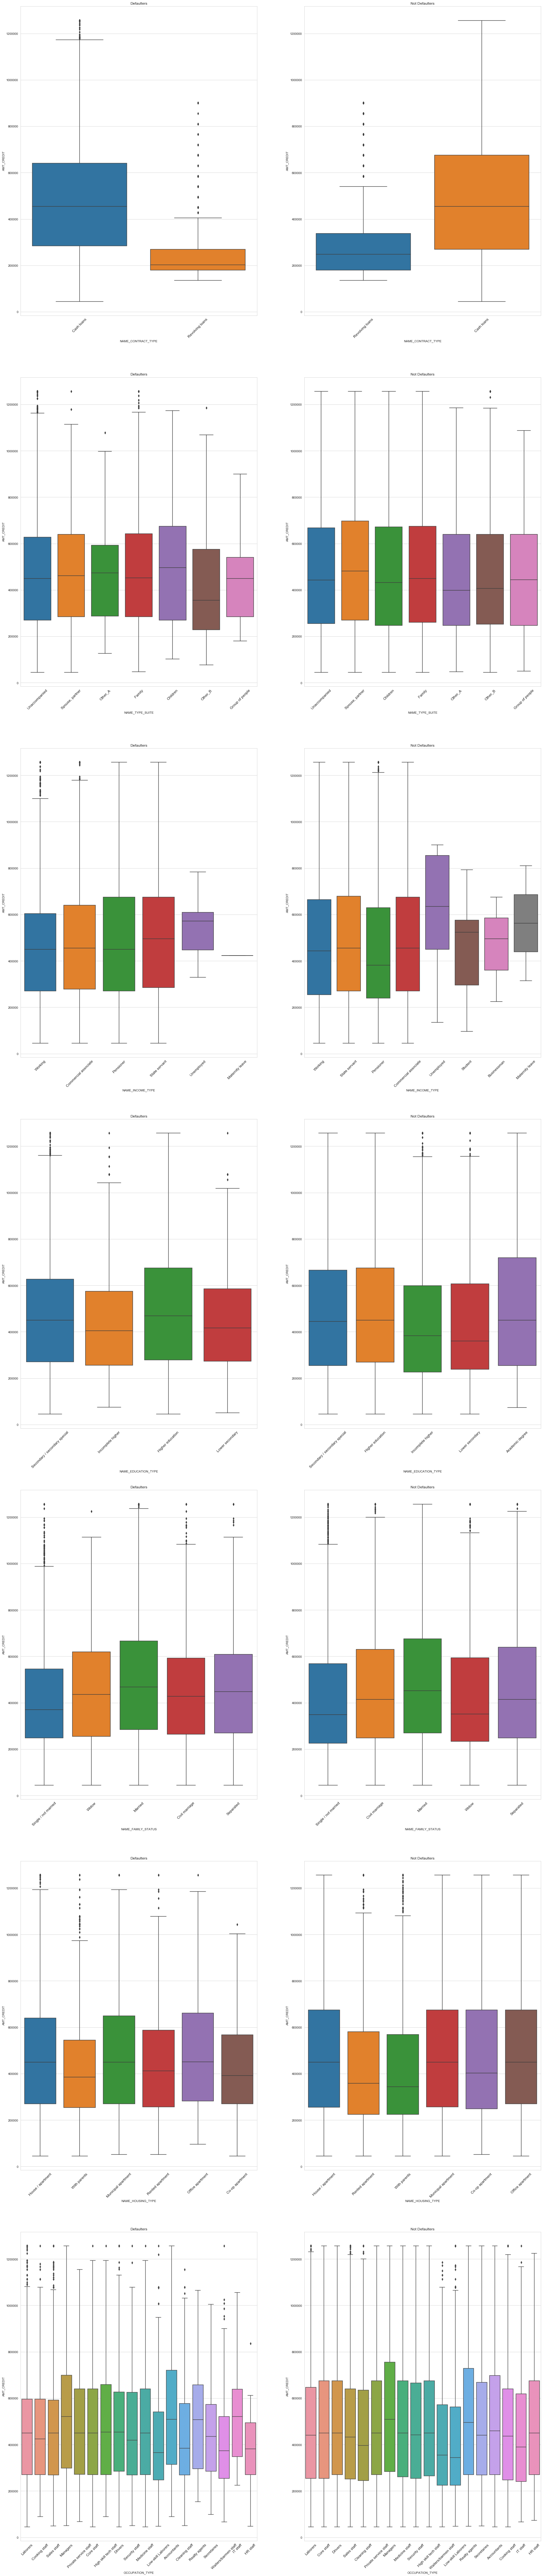

In [105]:
#Let's plot all the categorical variables vs AMT_CREDIT(as AMT_CREDIT is most correlated with other amount variables,
# all of them will exhibit similar behaviour
plt.figure(figsize=(30,150))
indx=1
for category in ['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']:
    plt.subplot(7,2,indx)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=application_Defaulters)
    indx += 1
    plt.xticks(rotation = 45, fontsize=12)    
    plt.title('Defaulters', fontsize=12)
    
    plt.subplot(7,2,indx)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=application_NotDefaulters)
    indx += 1
    plt.xticks(rotation = 45, fontsize=12)    
    plt.title('Not Defaulters', fontsize=12)
plt.show()

### Insights:
1. Revolving loans are much lower than Cash loans for both Defaulters and Not Defaulters.
2. Column NAME_TYPE_SUIT has no difference for both Defaulters and Not Defaulters.
3. State Servants and Pensioners have higher amount credit for defaulters. In comparision, incase of Not Defaulters,Unemployed has the highest amount credit. This cound eb due to fact that unemployed people might be needing more funds to cover expenses.
4. In Education,people in Higher Education have the most amount credited and are Defaulters.For NotDefaulter, Academic degree has the highest amount credit.
5. Married people take the highest amount credit in case of both Defaulters and Not Defaulters.
6. Almost all NAME_TYPE_SUITES apply for similar AMT_CREDIT with similar medians for both Defaulters and NOt Defaulters.
7. Accountants and Managers take the highest amount credit for Defaulters.Same is true for Not Defaulters as well.

### Analysis of two segmented variables

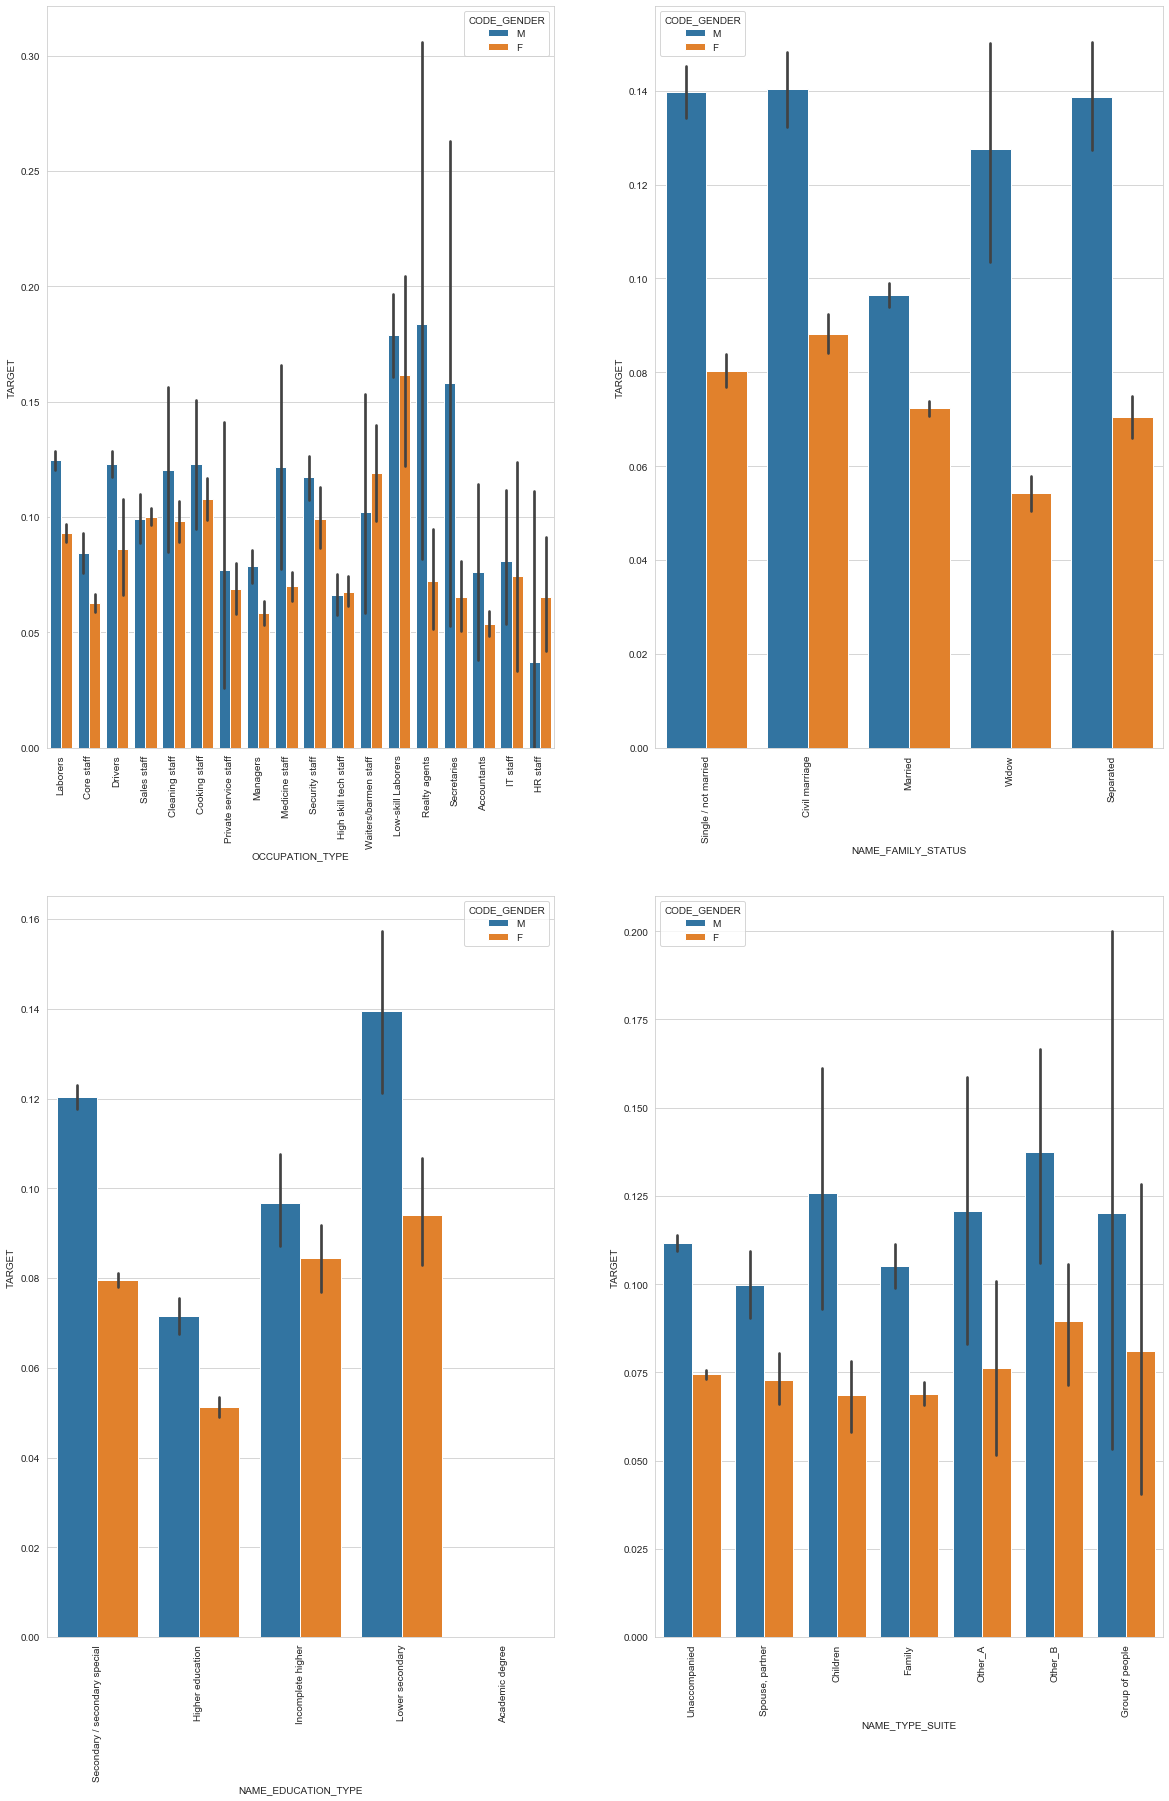

In [106]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)    
sns.barplot(y= 'TARGET', x = 'OCCUPATION_TYPE',hue='CODE_GENDER',data=application,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,2) 
sns.barplot(y= 'TARGET', x = 'NAME_FAMILY_STATUS',hue='CODE_GENDER',data=application,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,3)    
sns.barplot(y= 'TARGET', x = 'NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=application,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,4) 
sns.barplot(y= 'TARGET', x = 'NAME_TYPE_SUITE',hue='CODE_GENDER',data=application,estimator=np.mean)
plt.xticks(rotation= 90)
plt.show()

#### Insights:

These above plots shows us defaulters mean in each category

1. Male working as Realty Agent, Low skilled laborers and Secretaries are the most among defaulters.
2. Female working as Low skilled laborers and Waitress /Barmen Staff are the most among defaulters
3. Single/not married and Civil Married male and Separated are most to default on their payment whereas Females who are Civil Married and Single/not married default more.
4. Clients with Lower Secondary education are most to default among men and women then by Secondary / Secondary special.
5. Clients both male and female who are accompanied by Other_B default the most.

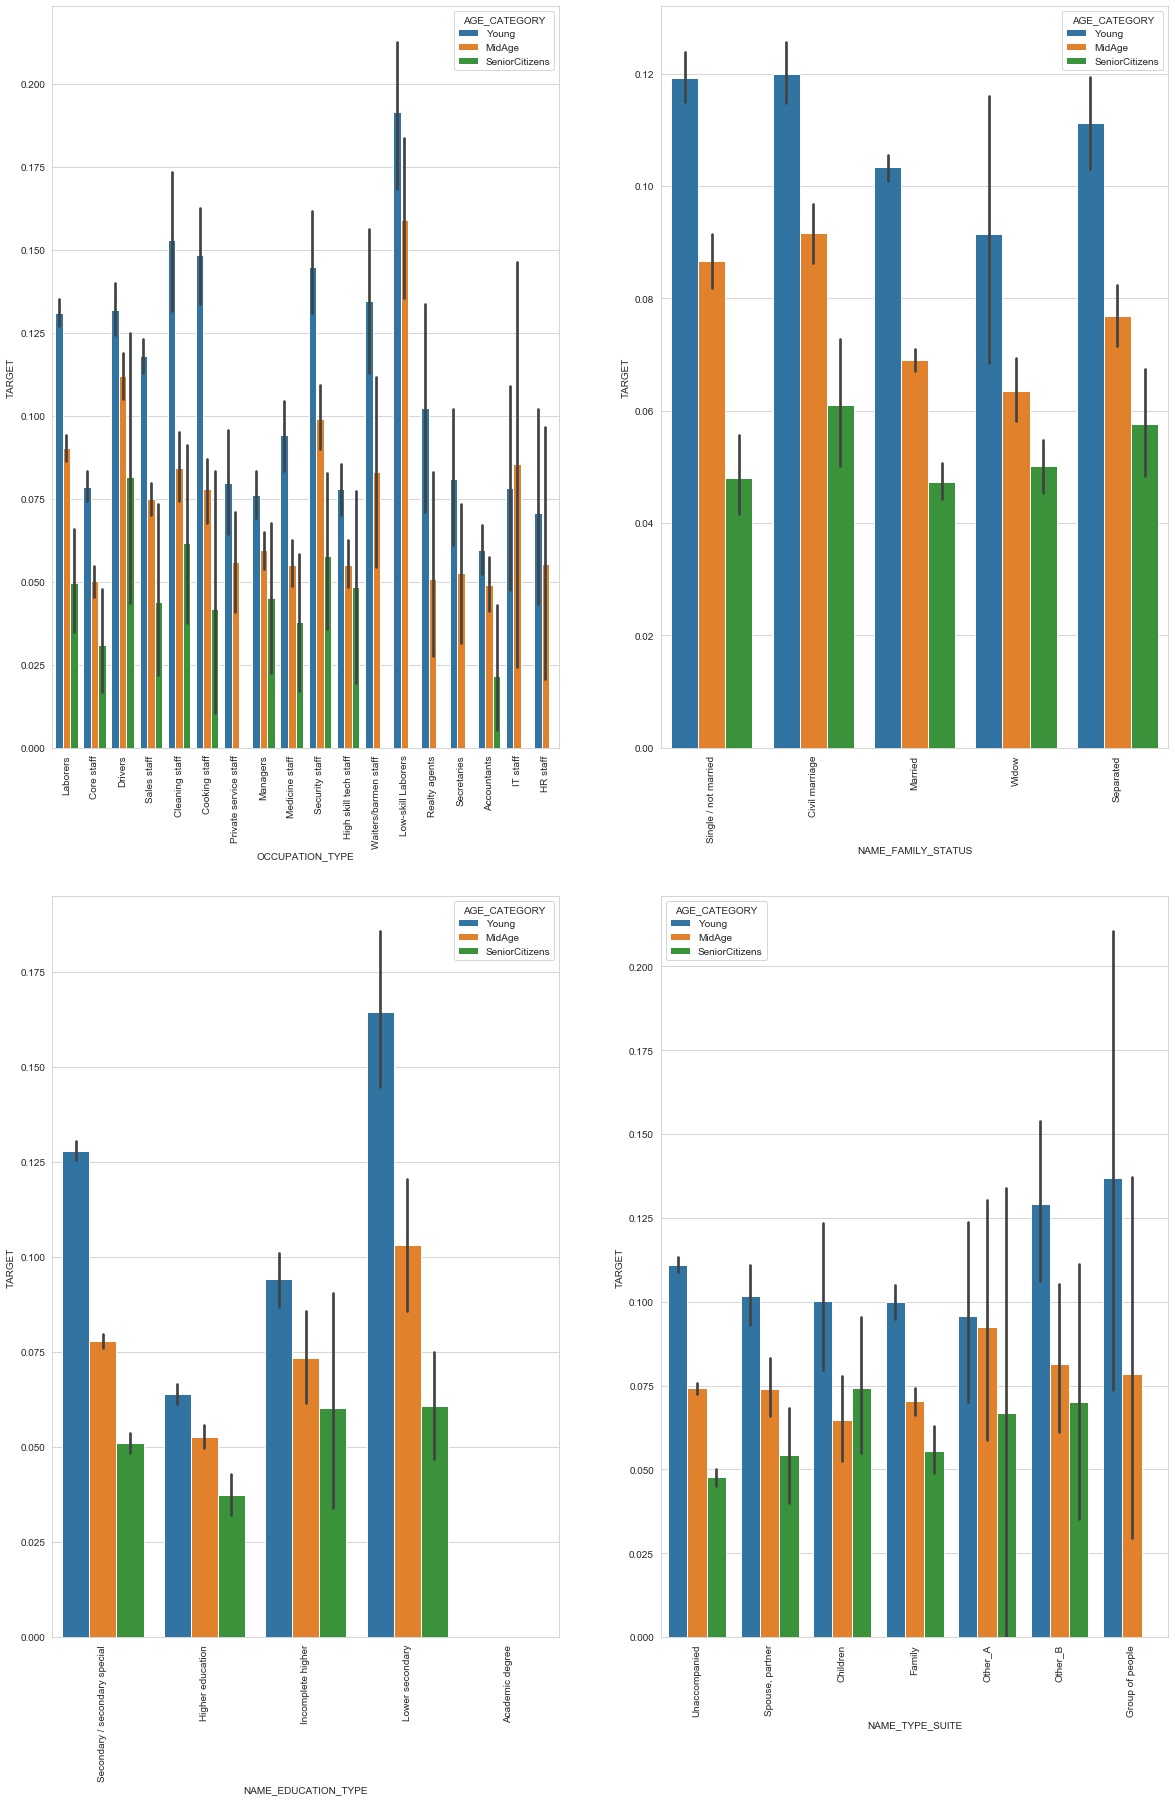

In [107]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)    
sns.barplot(y= 'TARGET', x = 'OCCUPATION_TYPE',hue='AGE_CATEGORY',data=application,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,2) 
sns.barplot(y= 'TARGET', x = 'NAME_FAMILY_STATUS',hue='AGE_CATEGORY',data=application,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,3)    
sns.barplot(y= 'TARGET', x = 'NAME_EDUCATION_TYPE',hue='AGE_CATEGORY',data=application,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,4) 
sns.barplot(y= 'TARGET', x = 'NAME_TYPE_SUITE',hue='AGE_CATEGORY',data=application,estimator=np.mean)
plt.xticks(rotation= 90)
plt.show()

#### Insights:

These above plots shows us defaulters mean in each category

1. People who work as Low Skilled Laborers tends to default more among all age groups, probably Seniors don't work in that role to
2. Single and Young people default the most followed by Mid-Age and Single.
3. Young and Mid-Age people with Lower Secondary tends to default more.
4. Young people accompanied by Group of people defaults more.

# Previous Applications

In [108]:
prev_application = pd.read_csv("previous_application.csv")
prev_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1048570     2230795      255000     Consumer loans    50978.475   
1048571     1823303      158245         Cash loans          NaN   
1048572     1730537      429268     Consumer loans     5793.120   
1048573     2100360      389043     Consumer loans     4775.355   
1048574     1283481      250078     Consumer loans     6617.925   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1048570         210960.0    189864.0           21096.0         210960.0   
1048571              0.0         0.0               NaN              NaN   
1048572          38070.0     36526.5            3807.0          38070.0   
1048573          35356.5     30109.5            7110.0          35356.5   
1048574          44986.5     23229.0           22500.0          44986.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1048570                     SUNDAY                       15   
1048571                    TUESDAY                       18   
1048572                     SUNDAY                       12   
1048573                   SATURDAY                       18   
1048574                    TUESDAY                       11   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1048570                           Y                       1   
1048571                           Y                       1   
1048572                           Y                       1   
1048573                           Y                       1   
1048574                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1048570           0.108909                    NaN                       NaN   
1048571                NaN                    NaN                       NaN   
1048572           0.102797                    NaN                       NaN   

In [109]:
# Removing extra space from the beginning and end of column names
sanitize_df(prev_application)

In [110]:
# Dataframe inspection
df = inspect_df(prev_application)
df.sort_values(by='Missing_Percent',ascending=False)

Shape:

(1048575, 37)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
RATE_INTEREST_PRIVILEGED      float64        1044854            99.65   
RATE_INTEREST_PRIMARY         float64        1044854            99.65   
RATE_DOWN_PAYMENT             float64         559396            53.35   
AMT_DOWN_PAYMENT              float64         559396            53.35   
NAME_TYPE_SUITE                object         515140            49.13   
NFLAG_INSURED_ON_APPROVAL     float64         420708            40.12   
DAYS_FIRST_DRAWING            float64         420708            40.12   
DAYS_FIRST_DUE                float64         420708            40.12   
DAYS_LAST_DUE_1ST_VERSION     float64         420708            40.12   
DAYS_LAST_DUE                 float64         420708            40.12   
DAYS_TERMINATION              float64         420708            40.12   
AMT_GOODS_PRICE               float64         240965            22.98   
AMT_ANNUITY                   float64         233009            22.22   
CNT_PAYMENT                   float64         233006            22.22   
PRODUCT_COMBINATION            object            224             0.02   
CHANNEL_TYPE                   object              0             0.00   
NAME_PRODUCT_TYPE              object              0             0.00   
NAME_YIELD_GROUP               object              0             0.00   
SELLERPLACE_AREA                int64              0             0.00   
NAME_SELLER_INDUSTRY           object              0             0.00   
NAME_GOODS_CATEGORY            object              0             0.00   
NAME_PORTFOLIO                 object              0             0.00   
SK_ID_PREV                      int64              0             0.00   
NAME_CLIENT_TYPE               object              0             0.00   
CODE_REJECT_REASON             object              0             0.00   
SK_ID_CURR                      int64              0             0.00   
DAYS_DECISION                   int64              0             0.00   
NAME_CONTRACT_STATUS           object              0             0.00   
NAME_CASH_LOAN_PURPOSE         object              0             0.00   
NFLAG_LAST_APPL_IN_DAY          int64              0             0.00   
FLAG_LAST_APPL_PER_CONTRACT    object              0             0.00   
HOUR_APPR_PROCESS_START         int64              0             0.00   
WEEKDAY_APPR_PROCESS_START     object              0             0.00   
AMT_CREDIT                    float64              0             0.00   
AMT_APPLICATION               float64              0             0.00   
NAME_CONTRACT_TYPE             object              0             0.00   
NAME_PAYMENT_TYPE              object              0             0.00   

                             Unique_Values  
Columns                                     
RATE_INTEREST_PRIVILEGED                24  
RATE_INTEREST_PRIMARY                  116  
RATE_DOWN_PAYMENT                   140327  
AMT_DOWN_PAYMENT                     22454  
NAME_TYPE_SUITE                          7  
NFLAG_INSURED_ON_APPROVAL                2  
DAYS_FIRST_DRAWING                    2738  
DAYS_FIRST_DUE                        2892  
DAYS_LAST_DUE_1ST_VERSION             4588  
DAYS_LAST_DUE                         2867  
DAYS_TERMINATION                      2815  
AMT_GOODS_PRICE                      75635  
AMT_ANNUITY                         282291  
CNT_PAYMENT                             48  
PRODUCT_COMBINATION                     17  
CHANNEL_TYPE                             8  
NAME_PRODUCT_TYPE                        3  
NAME_YIELD_GROUP                         5  
SELLERPLACE_AREA                      2023  
NAME_SELLER_INDUSTRY                    11  
NAME_GOODS_CATEGORY                     28  
NAME_PORTFOLIO                           5  
SK_ID_PREV                         1048575  
NAME_CLIENT_TYPE                         4  
CODE_REJEC

In [111]:
# Let's see the range of data in all the columns
for i in prev_application.columns:
    print(i)
    print(prev_application[i].unique(),end='\n\n')

SK_ID_PREV
[2030495 2802425 2523466 ... 1730537 2100360 1283481]

SK_ID_CURR
[271877 108129 122040 ... 182836 195080 287184]

NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']

AMT_ANNUITY
[ 1730.43  25188.615 15060.735 ... 18414.72  19303.83  50978.475]

AMT_APPLICATION
[  17145.    607500.    112500.   ... 1465200.     61243.65  319306.5 ]

AMT_CREDIT
[  17145.   679671.   136444.5 ... 1271700.   184918.5  189864. ]

AMT_DOWN_PAYMENT
[    0.        nan 12649.5  ...   952.65 26149.5  12252.15]

AMT_GOODS_PRICE
[  17145.    607500.    112500.   ... 1465200.     61243.65  319306.5 ]

WEEKDAY_APPR_PROCESS_START
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']

HOUR_APPR_PROCESS_START
[15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]

FLAG_LAST_APPL_PER_CONTRACT
['Y' 'N']

NFLAG_LAST_APPL_IN_DAY
[1 0]

RATE_DOWN_PAYMENT
[0.                nan 0.10397129 ... 0.10279716 0.20804783 0.53586445]

RATE_INTEREST_PRIMARY
[0.

#### We can see that a lot of columns have 'XNA'.Replacing these with NaN.

In [112]:
# Replacing 'XNA' with NaN for these values
prev_application = prev_application.replace('XNA',np.nan)

# We can also see that DAYS_DECISION has negative values.Converting them into positive
prev_application['DAYS_DECISION']=abs(prev_application['DAYS_DECISION'])

In [113]:
# Dataframe inspection
df = inspect_df(prev_application)
df.sort_values(by='Missing_Percent',ascending=False)

Shape:

(1048575, 37)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
RATE_INTEREST_PRIMARY         float64        1044854            99.65   
RATE_INTEREST_PRIVILEGED      float64        1044854            99.65   
NAME_PRODUCT_TYPE              object         670131            63.91   
NAME_GOODS_CATEGORY            object         593690            56.62   
AMT_DOWN_PAYMENT              float64         559396            53.35   
RATE_DOWN_PAYMENT             float64         559396            53.35   
NAME_SELLER_INDUSTRY           object         533625            50.89   
NAME_TYPE_SUITE                object         515140            49.13   
NAME_CASH_LOAN_PURPOSE         object         422517            40.29   
NFLAG_INSURED_ON_APPROVAL     float64         420708            40.12   
DAYS_TERMINATION              float64         420708            40.12   
DAYS_LAST_DUE                 float64         420708            40.12   
DAYS_LAST_DUE_1ST_VERSION     float64         420708            40.12   
DAYS_FIRST_DUE                float64         420708            40.12   
DAYS_FIRST_DRAWING            float64         420708            40.12   
NAME_PAYMENT_TYPE              object         392061            37.39   
NAME_YIELD_GROUP               object         323941            30.89   
AMT_GOODS_PRICE               float64         240965            22.98   
CNT_PAYMENT                   float64         233006            22.22   
AMT_ANNUITY                   float64         233009            22.22   
NAME_PORTFOLIO                 object         233006            22.22   
CODE_REJECT_REASON             object           3302             0.31   
NAME_CLIENT_TYPE               object           1217             0.12   
NAME_CONTRACT_TYPE             object            224             0.02   
PRODUCT_COMBINATION            object            224             0.02   
NAME_CONTRACT_STATUS           object              0             0.00   
AMT_APPLICATION               float64              0             0.00   
AMT_CREDIT                    float64              0             0.00   
SELLERPLACE_AREA                int64              0             0.00   
WEEKDAY_APPR_PROCESS_START     object              0             0.00   
DAYS_DECISION                   int64              0             0.00   
CHANNEL_TYPE                   object              0             0.00   
HOUR_APPR_PROCESS_START         int64              0             0.00   
FLAG_LAST_APPL_PER_CONTRACT    object              0             0.00   
NFLAG_LAST_APPL_IN_DAY          int64              0             0.00   
SK_ID_CURR                      int64              0             0.00   
SK_ID_PREV                      int64              0             0.00   

                             Unique_Values  
Columns                                     
RATE_INTEREST_PRIMARY                  116  
RATE_INTEREST_PRIVILEGED                24  
NAME_PRODUCT_TYPE                        2  
NAME_GOODS_CATEGORY                     27  
AMT_DOWN_PAYMENT                     22454  
RATE_DOWN_PAYMENT                   140327  
NAME_SELLER_INDUSTRY                    10  
NAME_TYPE_SUITE                          7  
NAME_CASH_LOAN_PURPOSE                  24  
NFLAG_INSURED_ON_APPROVAL                2  
DAYS_TERMINATION                      2815  
DAYS_LAST_DUE                         2867  
DAYS_LAST_DUE_1ST_VERSION             4588  
DAYS_FIRST_DUE                        2892  
DAYS_FIRST_DRAWING                    2738  
NAME_PAYMENT_TYPE                        3  
NAME_YIELD_GROUP                         4  
AMT_GOODS_PRICE                      75635  
CNT_PAYMENT                             48  
AMT_ANNUITY                         282291  
NAME_PORTFOLIO                           4  
CODE_REJECT_REASON                       8  
NAME_CLIENT_TYPE                         3  
NAME_CONTRACT_TYPE                       3  
PRODUCT_CO

#### Removing columns which have more than 40% missing data

In [114]:
# removing columns from dataset having more than 40% missing values
prev_application = prev_application.loc[:,df['Missing_Percent']<40]
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved             73   
1                       1             Approved            164   
2                       1             Approved            301   
3                       1             Approved            512   
4                       1              Refused            781   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0  Cash through the bank                XAP         Repeater            POS   
1                    NaN                XAP         Repeater           Cash   
2  Cash through the bank                XAP         Repeater           Cash   
3  Cash through the bank                XAP         Repeater           Cash   
4  Cash through the bank                 HC         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide                35         12.0           middle   
1           Contact center                -1         36.0       low_action   
2  Credit and cash offices                -1         12.0             high   
3  Credit and cash offices                -1         12.0           middle   
4  Credit and cash offices                -1         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [115]:
# Dataframe inspection
df = inspect_df(prev_application)
df.sort_values(by='Unique_Values',ascending=False)

Shape:

(1048575, 22)




Data_Type  Missing_Count  Missing_Percent  \
Columns                                                                 
SK_ID_PREV                      int64              0             0.00   
SK_ID_CURR                      int64              0             0.00   
AMT_ANNUITY                   float64         233009            22.22   
AMT_APPLICATION               float64              0             0.00   
AMT_GOODS_PRICE               float64         240965            22.98   
AMT_CREDIT                    float64              0             0.00   
DAYS_DECISION                   int64              0             0.00   
SELLERPLACE_AREA                int64              0             0.00   
CNT_PAYMENT                   float64         233006            22.22   
HOUR_APPR_PROCESS_START         int64              0             0.00   
PRODUCT_COMBINATION            object            224             0.02   
CODE_REJECT_REASON             object           3302             0.31   
CHANNEL_TYPE                   object              0             0.00   
WEEKDAY_APPR_PROCESS_START     object              0             0.00   
NAME_PORTFOLIO                 object         233006            22.22   
NAME_YIELD_GROUP               object         323941            30.89   
NAME_CONTRACT_STATUS           object              0             0.00   
NAME_PAYMENT_TYPE              object         392061            37.39   
NAME_CLIENT_TYPE               object           1217             0.12   
NAME_CONTRACT_TYPE             object            224             0.02   
NFLAG_LAST_APPL_IN_DAY          int64              0             0.00   
FLAG_LAST_APPL_PER_CONTRACT    object              0             0.00   

                             Unique_Values  
Columns                                     
SK_ID_PREV                         1048575  
SK_ID_CURR                          305828  
AMT_ANNUITY                         282291  
AMT_APPLICATION                      75635  
AMT_GOODS_PRICE                      75635  
AMT_CREDIT                           74637  
DAYS_DECISION                         2921  
SELLERPLACE_AREA                      2023  
CNT_PAYMENT                             48  
HOUR_APPR_PROCESS_START                 24  
PRODUCT_COMBINATION                     17  
CODE_REJECT_REASON                       8  
CHANNEL_TYPE                             8  
WEEKDAY_APPR_PROCESS_START               7  
NAME_PORTFOLIO                           4  
NAME_YIELD_GROUP                         4  
NAME_CONTRACT_STATUS                     4  
NAME_PAYMENT_TYPE                        3  
NAME_CLIENT_TYPE                         3  
NAME_CONTRACT_TYPE                       3  
NFLAG_LAST_APPL_IN_DAY                   2  
FLAG_LAST_APPL_PER_CONTRACT              2

In [116]:
df.index

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object', name='Columns')

In [117]:
# List of columns relevant for further analysis
reqd_columns = ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',              
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE']
prev_application = prev_application[reqd_columns]
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0     17145.0          17145.0             Approved             73   
1    679671.0         607500.0             Approved            164   
2    136444.5         112500.0             Approved            301   
3    470790.0         450000.0             Approved            512   
4    404055.0         337500.0              Refused            781   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  
0                XAP         Repeater            POS             Country-wide  
1                XAP         Repeater           Cash           Contact center  
2                XAP         Repeater           Cash  Credit and cash offices  
3                XAP         Repeater           Cash  Credit and cash offices  
4                 HC         Repeater           Cash  Credit and cash offices

In [118]:
# From the application dataframe, we need only few columns for further analysis of previous applications
reqd_columns = ['SK_ID_CURR','TARGET','CODE_GENDER','AGE_CATEGORY','INCOME_GROUP']

In [119]:
# Merging both the dataframes
all_applications = pd.merge(application[reqd_columns],prev_application,how='left',on='SK_ID_CURR')
all_applications.head()

SK_ID_CURR  TARGET CODE_GENDER AGE_CATEGORY  INCOME_GROUP  SK_ID_PREV  \
0      100002       1           M        Young  High Earning   1038818.0   
1      100004       0           M       MidAge   Low Earning   1564014.0   
2      100006       0           F       MidAge   Mid Earning   2078043.0   
3      100006       0           F       MidAge   Mid Earning   2827850.0   
4      100006       0           F       MidAge   Mid Earning   2190416.0   

  NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     Consumer loans     9251.775         179055.0    179055.0   
1     Consumer loans     5357.250          24282.0     20106.0   
2         Cash loans    24246.000         675000.0    675000.0   
3    Revolving loans          NaN              0.0         0.0   
4     Consumer loans    29027.520         334917.0    267930.0   

   AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION CODE_REJECT_REASON  \
0         179055.0             Approved          606.0                XAP   
1          24282.0             Approved          815.0                XAP   
2         675000.0             Approved          181.0                XAP   
3              NaN             Canceled          181.0                XAP   
4         334917.0             Approved          311.0                XAP   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  
0              New            POS                    Stone  
1              New            POS         Regional / Local  
2         Repeater           Cash  Credit and cash offices  
3         Repeater            NaN  Credit and cash offices  
4         Repeater            POS             Country-wide

In [120]:
all_applications.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AGE_CATEGORY', 'INCOME_GROUP',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE'],
      dtype='object')

In [121]:
# Dataframe inspection
df = inspect_df(all_applications)
df.sort_values(by='Unique_Values',ascending=False)

Shape:

(757545, 17)




Data_Type  Missing_Count  Missing_Percent  Unique_Values
Columns                                                                      
SK_ID_PREV             float64          35641             4.70         721904
SK_ID_CURR               int64              0             0.00         249519
AMT_ANNUITY            float64         193419            25.53         220670
AMT_CREDIT             float64          35641             4.70          62881
AMT_GOODS_PRICE        float64         198949            26.26          60702
AMT_APPLICATION        float64          35641             4.70          60702
DAYS_DECISION          float64          35641             4.70           2921
CODE_REJECT_REASON      object          37932             5.01              8
CHANNEL_TYPE            object          35641             4.70              8
NAME_CONTRACT_STATUS    object          35641             4.70              4
NAME_PORTFOLIO          object         193416            25.53              4
NAME_CONTRACT_TYPE      object          35821             4.73              3
INCOME_GROUP            object              0             0.00              3
AGE_CATEGORY            object              0             0.00              3
NAME_CLIENT_TYPE        object          36440             4.81              3
TARGET                   int64              0             0.00              2
CODE_GENDER             object             37             0.00              2

### Univariate Analysis

##### For Unordered Categorical Variables

In [122]:
def calc_percentage_column_values(df,col):
    return round(100*all_applications[col].value_counts()/len(all_applications[all_applications[col].notnull()].index),2)

In [123]:
catg_columns=['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE']

print("Percentage count of values in each column:")
for i in catg_columns:
    print(calc_percentage_column_values(all_applications,i),end='\n\n')

Percentage count of values in each column:
Consumer loans     44.39
Cash loans         43.94
Revolving loans    11.67
Name: NAME_CONTRACT_TYPE, dtype: float64

Approved        62.53
Canceled        18.27
Refused         17.56
Unused offer     1.63
Name: NAME_CONTRACT_STATUS, dtype: float64

XAP       81.06
HC        10.44
LIMIT      3.46
SCO        2.32
CLIENT     1.64
SCOFR      0.84
VERIF      0.19
SYSTEM     0.05
Name: CODE_REJECT_REASON, dtype: float64

Repeater     73.15
New          18.72
Refreshed     8.13
Name: NAME_CLIENT_TYPE, dtype: float64

POS      53.78
Cash     34.99
Cards    11.21
Cars      0.03
Name: NAME_PORTFOLIO, dtype: float64

Credit and cash offices       42.09
Country-wide                  29.96
Stone                         13.36
Regional / Local               6.56
Contact center                 3.85
AP+ (Cash loan)                3.79
Channel of corporate sales     0.36
Car dealer                     0.02
Name: CHANNEL_TYPE, dtype: float64



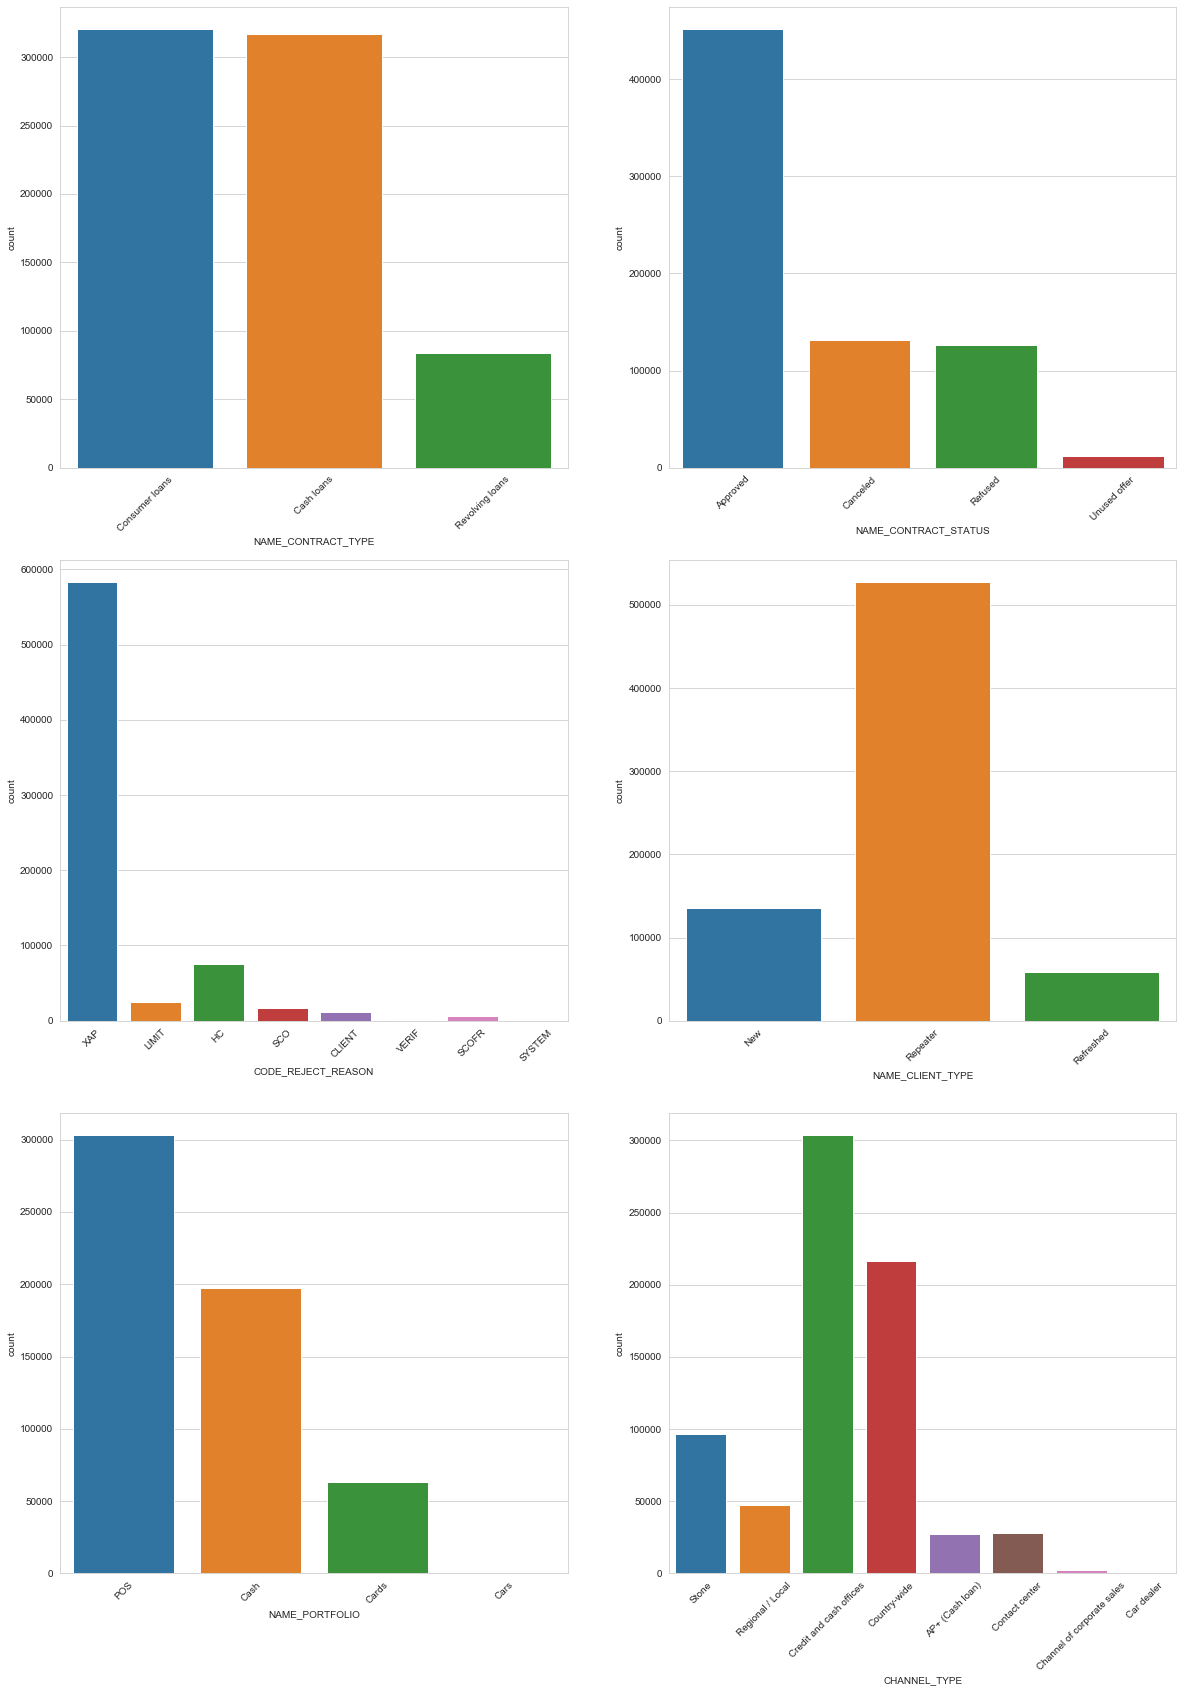

In [124]:
# draw the plot for each column
plt.figure(figsize = (20,100))
indx = 1
for col in catg_columns:
    plt.subplot(10,2,indx)
    sns.countplot(x=col, data = all_applications)    
    plt.xticks(rotation= 45)    
    indx += 1
plt.show()

#### Insights from the graphs:
1. NAME_CONTRACT_TYPE: Most of the type of loans applied for are Consumer loans,followed by Cash loans.
2. NAME_CONTRACT_STATUS: Approx 63% of the loans are "approved",whereas 1.63% loans are in "unused offer"
3. CODE_REJECT_REASON: Majority(81%) of the times, the loan is rejected because of the reason code 'XAP'
4. NAME_CLIENT_TYPE:Most of the applicants are Repeaters(73%),whereas only 18% of the applicants are New.
5. NAME_PORTFOLIO:Most of the portfolios applied for is "POS" ,followed by "CASH"
6. CHANNEL_TYPE: Credit and cash offices(42%) bring in most of the clients then followed by Country-wide and Stone

##### For continuous variables

In [125]:
req_columns=['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_DECISION']
all_applications[req_columns].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  564126.000000     7.219040e+05  7.219040e+05     5.585960e+05   
mean    14576.923825     1.589747e+05  1.792684e+05     2.054796e+05   
std     12859.409332     2.622099e+05  2.878937e+05     2.816345e+05   
min         0.000000     0.000000e+00  0.000000e+00     0.000000e+00   
25%      5981.445000     1.930500e+04  2.412900e+04     4.716000e+04   
50%     10611.810000     6.750000e+04  7.577550e+04     1.024200e+05   
75%     18828.090000     1.752295e+05  1.935000e+05     2.250000e+05   
max    418058.145000     4.050000e+06  4.104351e+06     4.050000e+06   

       DAYS_DECISION  
count  721904.000000  
mean      869.520597  
std       779.890445  
min         2.000000  
25%       267.000000  
50%       566.000000  
75%      1290.000000  
max      2922.000000

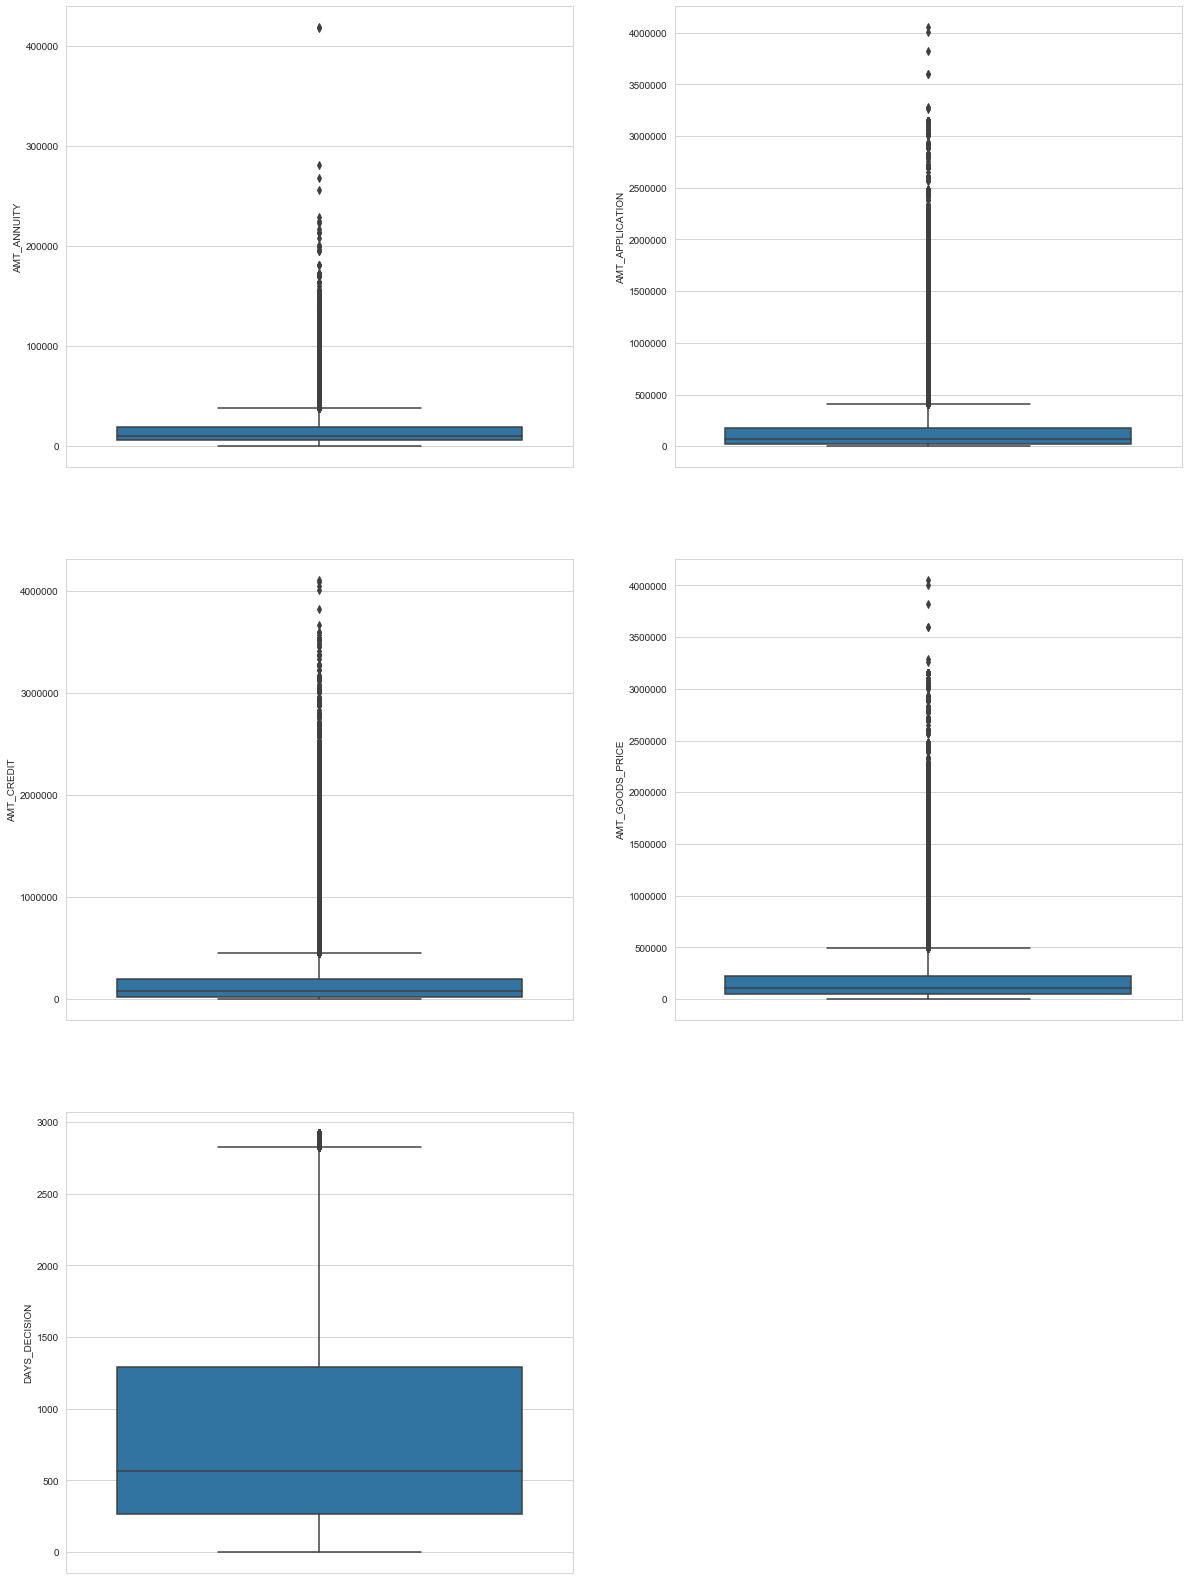

In [126]:
# draw the plot for each column
plt.figure(figsize = (20,100))
indx = 1
for col in req_columns:
    plt.subplot(10,2,indx)
    sns.boxplot(y=all_applications[col].dropna())       
    indx += 1
plt.show()


#### We can see that there are outliers in these columns.Treating these columns.

In [127]:
req_columns=['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
for i in req_columns:
    all_applications = all_applications.loc[all_applications[i]< all_applications[i].quantile(0.90),:]

In [128]:
# Dataframe inspection
df = inspect_df(all_applications)
df

Shape:

(356089, 17)




Data_Type  Missing_Count  Missing_Percent  Unique_Values
Columns                                                                      
SK_ID_CURR               int64              0             0.00         179561
TARGET                   int64              0             0.00              2
CODE_GENDER             object             13             0.00              2
AGE_CATEGORY            object              0             0.00              3
INCOME_GROUP            object              0             0.00              3
SK_ID_PREV             float64              0             0.00         356089
NAME_CONTRACT_TYPE      object              0             0.00              3
AMT_ANNUITY            float64              0             0.00         168264
AMT_APPLICATION        float64              0             0.00          43162
AMT_CREDIT             float64              0             0.00          37331
AMT_GOODS_PRICE        float64              0             0.00          43160
NAME_CONTRACT_STATUS    object              0             0.00              4
DAYS_DECISION          float64              0             0.00           2921
CODE_REJECT_REASON      object            234             0.07              8
NAME_CLIENT_TYPE        object            183             0.05              3
NAME_PORTFOLIO          object              0             0.00              3
CHANNEL_TYPE            object              0             0.00              8

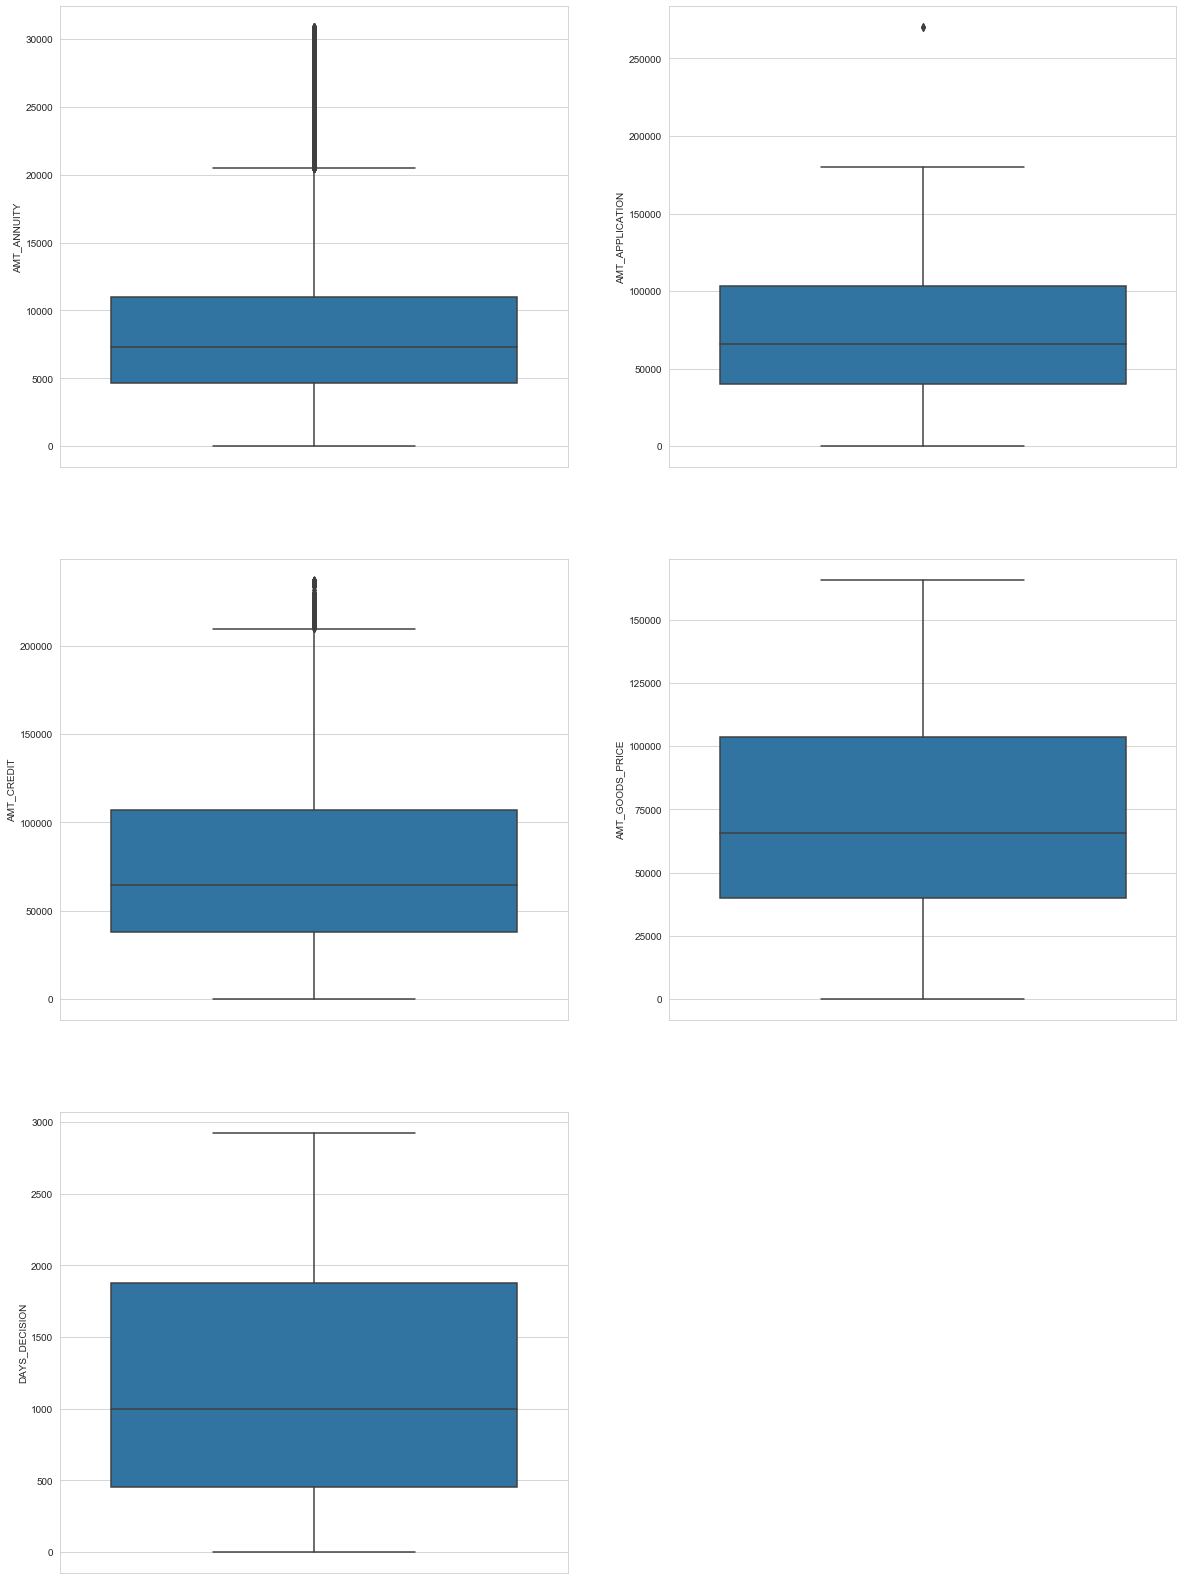

In [129]:
req_columns=['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_DECISION']
# draw the plot for each column
plt.figure(figsize = (20,100))
indx = 1
for col in req_columns:
    plt.subplot(10,2,indx)
    sns.boxplot(y=all_applications[col].dropna())       
    indx += 1
plt.show()


### Insights
##### After cleaning of Outliers top 10 percent
1. AMT_ANNUITY: We observe clearly majority lies between 5000 - 12000 with a lot of outliers.
2. AMT_APPLICATION: Majority lies around 40000 - 100000 with a small amount of outliers.
3. AMT_CREDIT: Is almost similar to AMT_APPLICATION with slightly higher outliers.
4. AMT_GOODS_PRICE: Majority lies around 40000 - 115000
5. DAYS_DECISION: Majorly around 500 -1900 days spent on Decision 

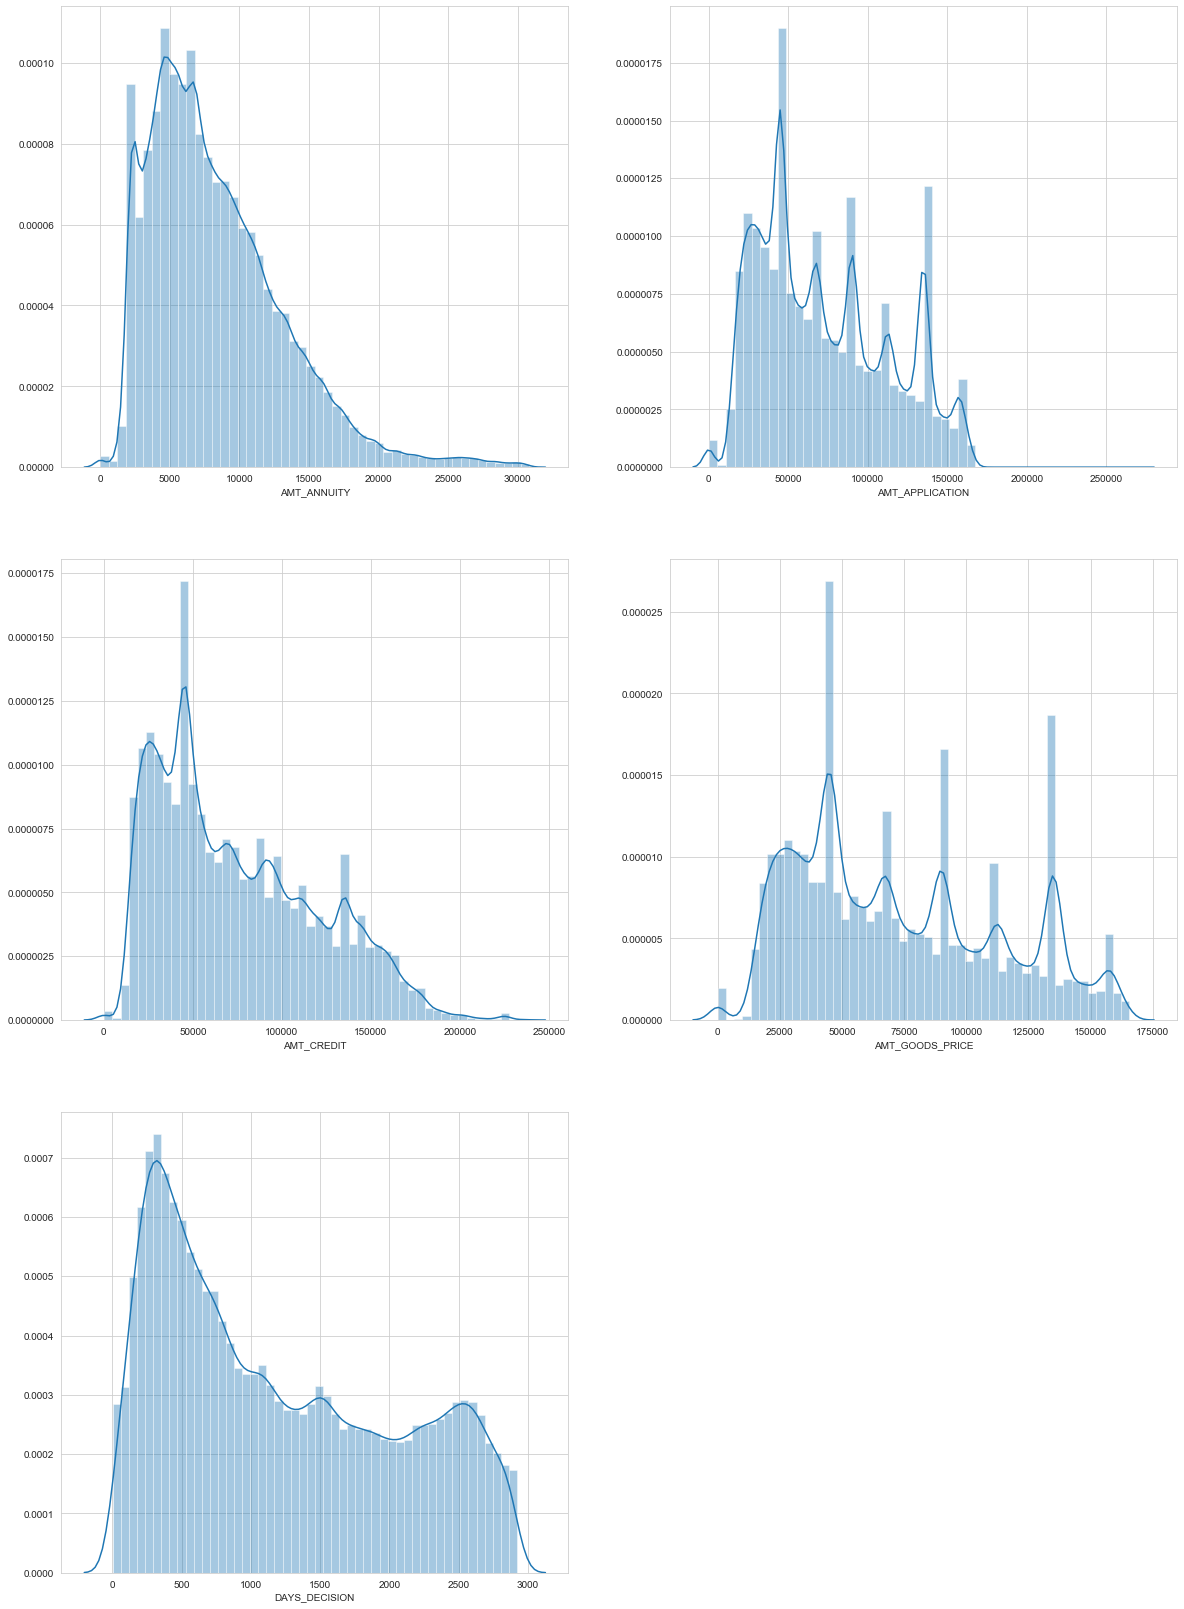

In [130]:
req_columns=['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_DECISION']

# draw the plot for each column
plt.figure(figsize = (20,100))
indx = 1
for col in req_columns:
    plt.subplot(10,2,indx)
    sns.distplot(all_applications[col].dropna())       
    indx += 1
plt.show()

### Insights
##### After cleaning of Outliers top 10 percent
1. AMT_ANNUITY: We observe similar trends in distplot as well majority of annuity is towards the lower from around 4000 - 12000.
2. AMT_APPLICATION: We observe similar trends in distplot as well majority distribution around 20000 - 200000.
3. AMT_CREDIT: We can see a clear spike around 50000
4. AMT_GOODS_PRICE: we can see a spike after regular intervals.
5. DAYS_DECISION: Majorly distributed from 0-2800 days, maximum around 400 days

Let's see if similar trends can be seen after splitting of data.

In [131]:
#Split Data including current and prev applications
all_application_NotDefaulters = all_applications[all_applications['TARGET'] == 0]
all_application_Defaulters = all_applications[all_applications['TARGET'] == 1]

### Univariate Analysis on two sets of data after merging

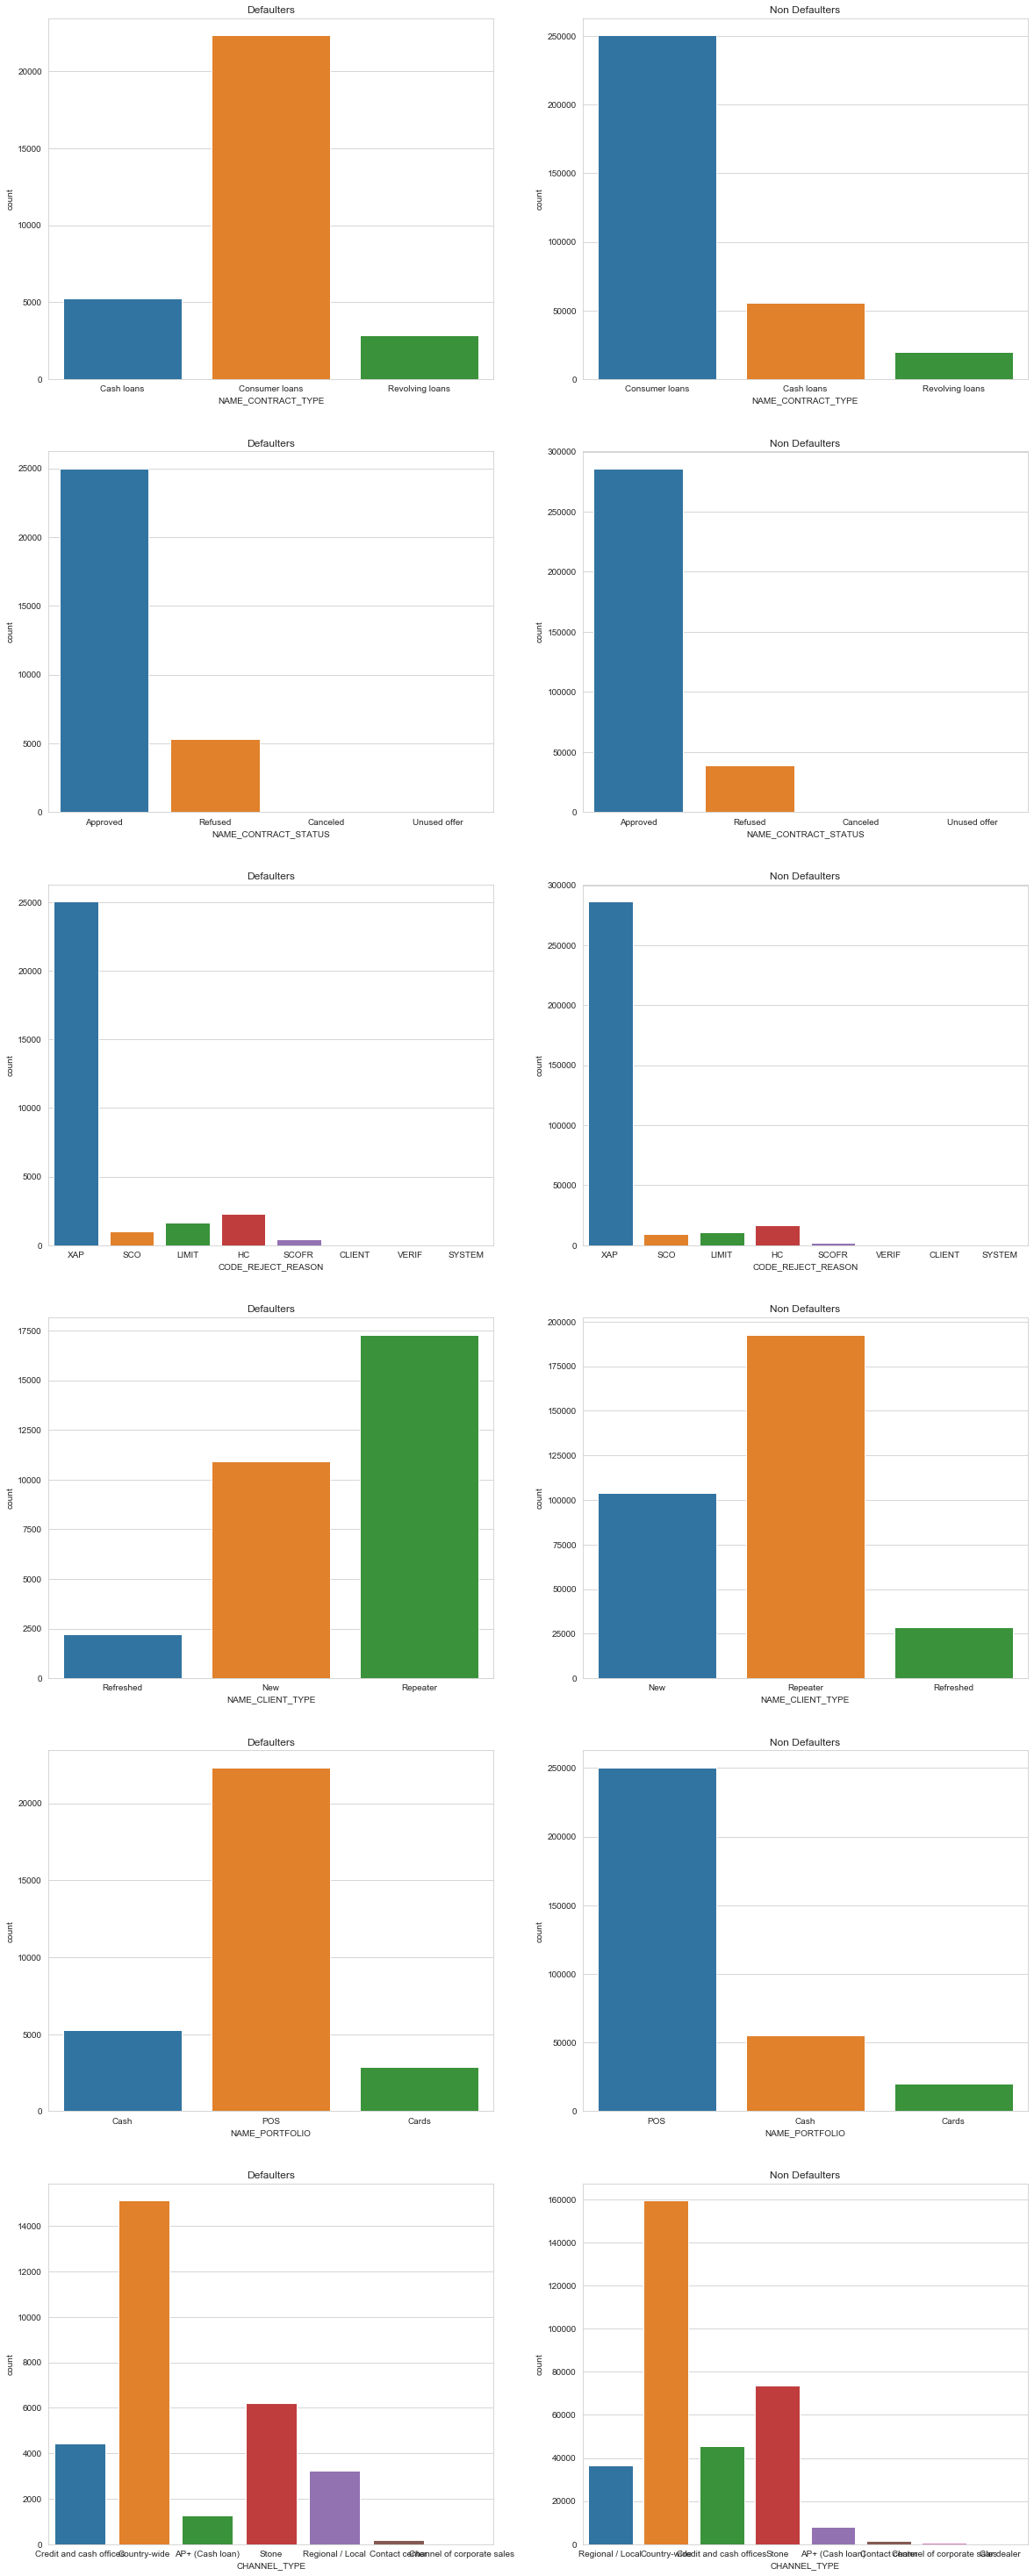

In [132]:
#Univariate analysis for categorical variables after splitting dataframe
plt.figure(figsize = (20,180))
indx = 1
for col in catg_columns:
    plt.subplot(20,2,indx)
    plt.title('Defaulters')
    sns.countplot(x=col, data = all_application_Defaulters) 
    indx += 1
    plt.subplot(20,2,indx)
    sns.countplot(x=col, data = all_application_NotDefaulters)
    plt.title('Non Defaulters')  
    indx += 1
plt.show()

#### Insights from comparing the graphs:

1. NAME_CONTRACT_TYPE: Most of the type of loans applied for are Consumer loans,followed by Cash loans, hence consumer loans tops the list in defaulters and non defaulters.
2. NAME_CONTRACT_STATUS: Approx 63% of the loans are "approved", hence comes out top on both the plots
3. CODE_REJECT_REASON: Majority(81%) of the times, the loan is rejected because of the reason code 'XAP',hence tops the list in both categories
4. NAME_CLIENT_TYPE: Clearly new clients are more Non Defaulters than defaulters, whereas repeaters tops both the list
5. NAME_PORTFOLIO:Most of the portfolios applied for is "POS", hence tops the list in both categories.
6. CHANNEL_TYPE: Credit and cash offices(42%) bring in most of the clients then followed by Country-wide and Stone, whereas most number of defaulters are from Countrywide then by Stone.

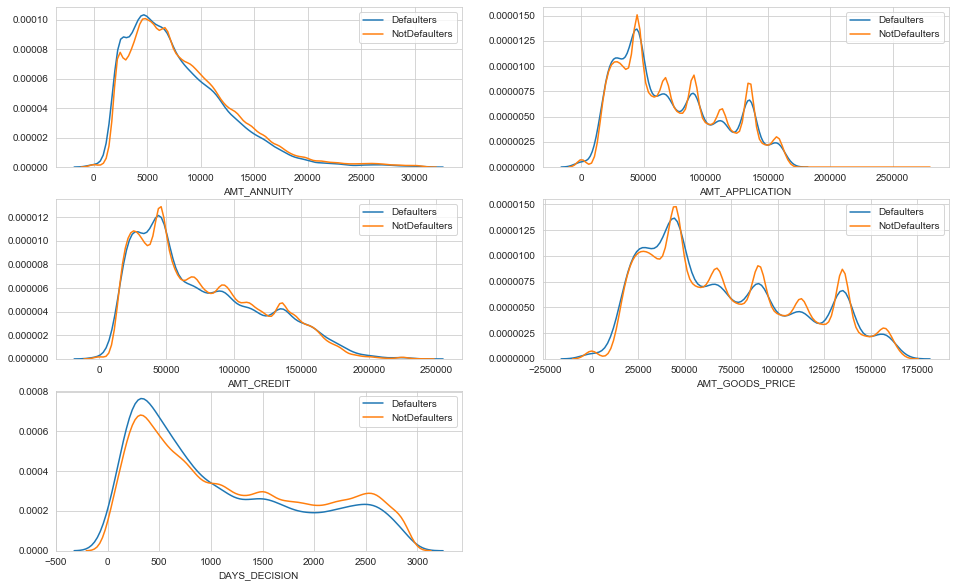

In [133]:
#Univariate analysis for continuous variables after splitting dataframe
index = 1
plt.figure(figsize=(16,10))
for c in req_columns:
    plt.subplot(3,2,index) 
    sns.distplot(all_application_Defaulters[c],hist=False, label = 'Defaulters')
    sns.distplot(all_application_NotDefaulters[c],hist=False, label = 'NotDefaulters')
    plt.legend(loc='upper right')
    index += 1
plt.show()

### Insights 
1. AMT_CREDIT, AMT_GOODS_PRICE and AMT_APPLICATION works very well unless it less than 50000
2. Interestingly we see a pattern here there are more defaulters when DAYS_DECISION is less, min should be around 1000 days
3. AMT_ANNUITY should be greater than 5500 for Bank's profit

## Bivariate analysis on data after merging

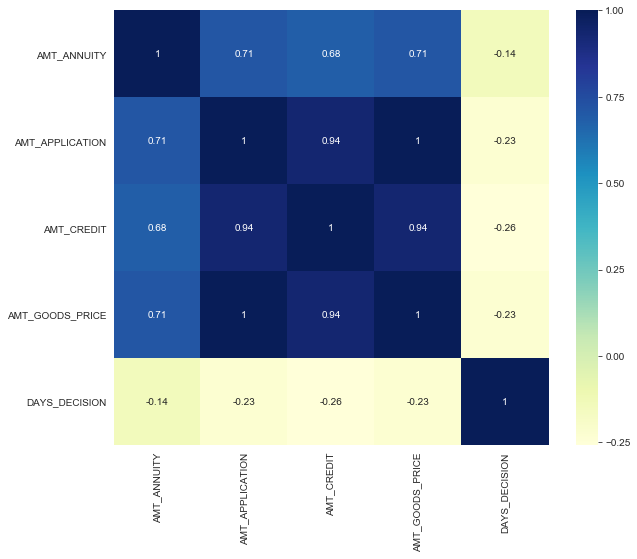

In [134]:
#Let's try and find out any correlations
plt.figure(figsize=(10,8))
corr_matrix = all_applications.drop(['SK_ID_CURR','TARGET','SK_ID_PREV'],axis =1)
ax = sns.heatmap(corr_matrix.corr(),cmap="YlGnBu", annot=True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation= 90)
plt.yticks(rotation= 0) 
plt.show()

In [135]:
corr_matrix.corr()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY         1.000000         0.710444    0.683575         0.710547   
AMT_APPLICATION     0.710444         1.000000    0.935533         0.999916   
AMT_CREDIT          0.683575         0.935533    1.000000         0.935553   
AMT_GOODS_PRICE     0.710547         0.999916    0.935553         1.000000   
DAYS_DECISION      -0.144478        -0.226127   -0.258659        -0.226090   

                 DAYS_DECISION  
AMT_ANNUITY          -0.144478  
AMT_APPLICATION      -0.226127  
AMT_CREDIT           -0.258659  
AMT_GOODS_PRICE      -0.226090  
DAYS_DECISION         1.000000

### Insights
#### Highly corelated columns

1. AMT_APPLICATION and AMT_CREDIT
2. AMT_APPLICATION and AMT_ANNUITY
3. AMT_CREDIT and AMT_ANNUITY

In [136]:
#Let's see for the split data
all_application_Defaulters.drop(['SK_ID_CURR','TARGET','SK_ID_PREV'],axis =1).corr()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY         1.000000         0.713054    0.694052         0.713054   
AMT_APPLICATION     0.713054         1.000000    0.941103         1.000000   
AMT_CREDIT          0.694052         0.941103    1.000000         0.941103   
AMT_GOODS_PRICE     0.713054         1.000000    0.941103         1.000000   
DAYS_DECISION      -0.118283        -0.226885   -0.259260        -0.226885   

                 DAYS_DECISION  
AMT_ANNUITY          -0.118283  
AMT_APPLICATION      -0.226885  
AMT_CREDIT           -0.259260  
AMT_GOODS_PRICE      -0.226885  
DAYS_DECISION         1.000000

#### We still see the same correlation

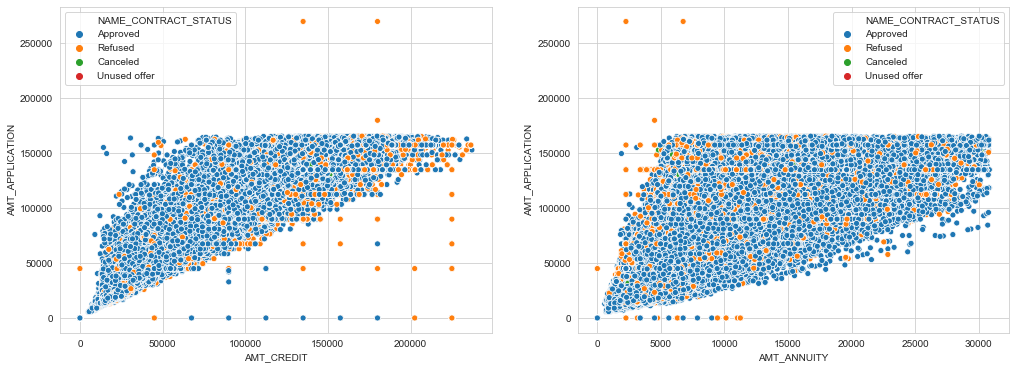

In [137]:
#Bivariate analysis on continous variable, since most correlated are AMT_APPLICATION and AMT_CREDIT then by AMT_ANNUITY
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.scatterplot('AMT_CREDIT','AMT_APPLICATION',hue='NAME_CONTRACT_STATUS', data=all_applications)
plt.subplot(1,2,2)
sns.scatterplot('AMT_ANNUITY','AMT_APPLICATION',hue='NAME_CONTRACT_STATUS', data=all_applications)
plt.show()

### Insights:
Maximum AMT_APPLICATION most certainly that was approved was below 200000, more than that it is always rejected and also Approval chances increases when Annuity is increased.

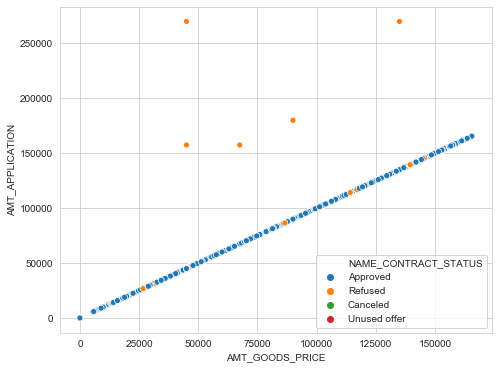

In [138]:
#Bivariate analysis on other continuous columns
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.scatterplot('AMT_GOODS_PRICE','AMT_APPLICATION',hue='NAME_CONTRACT_STATUS', data=all_applications)
plt.show()

### Insights:
Interestingly AMT_GOODSPRICE always increased when AMT_APPLICATION is increased.

### Bivariate analysis on categorical variable

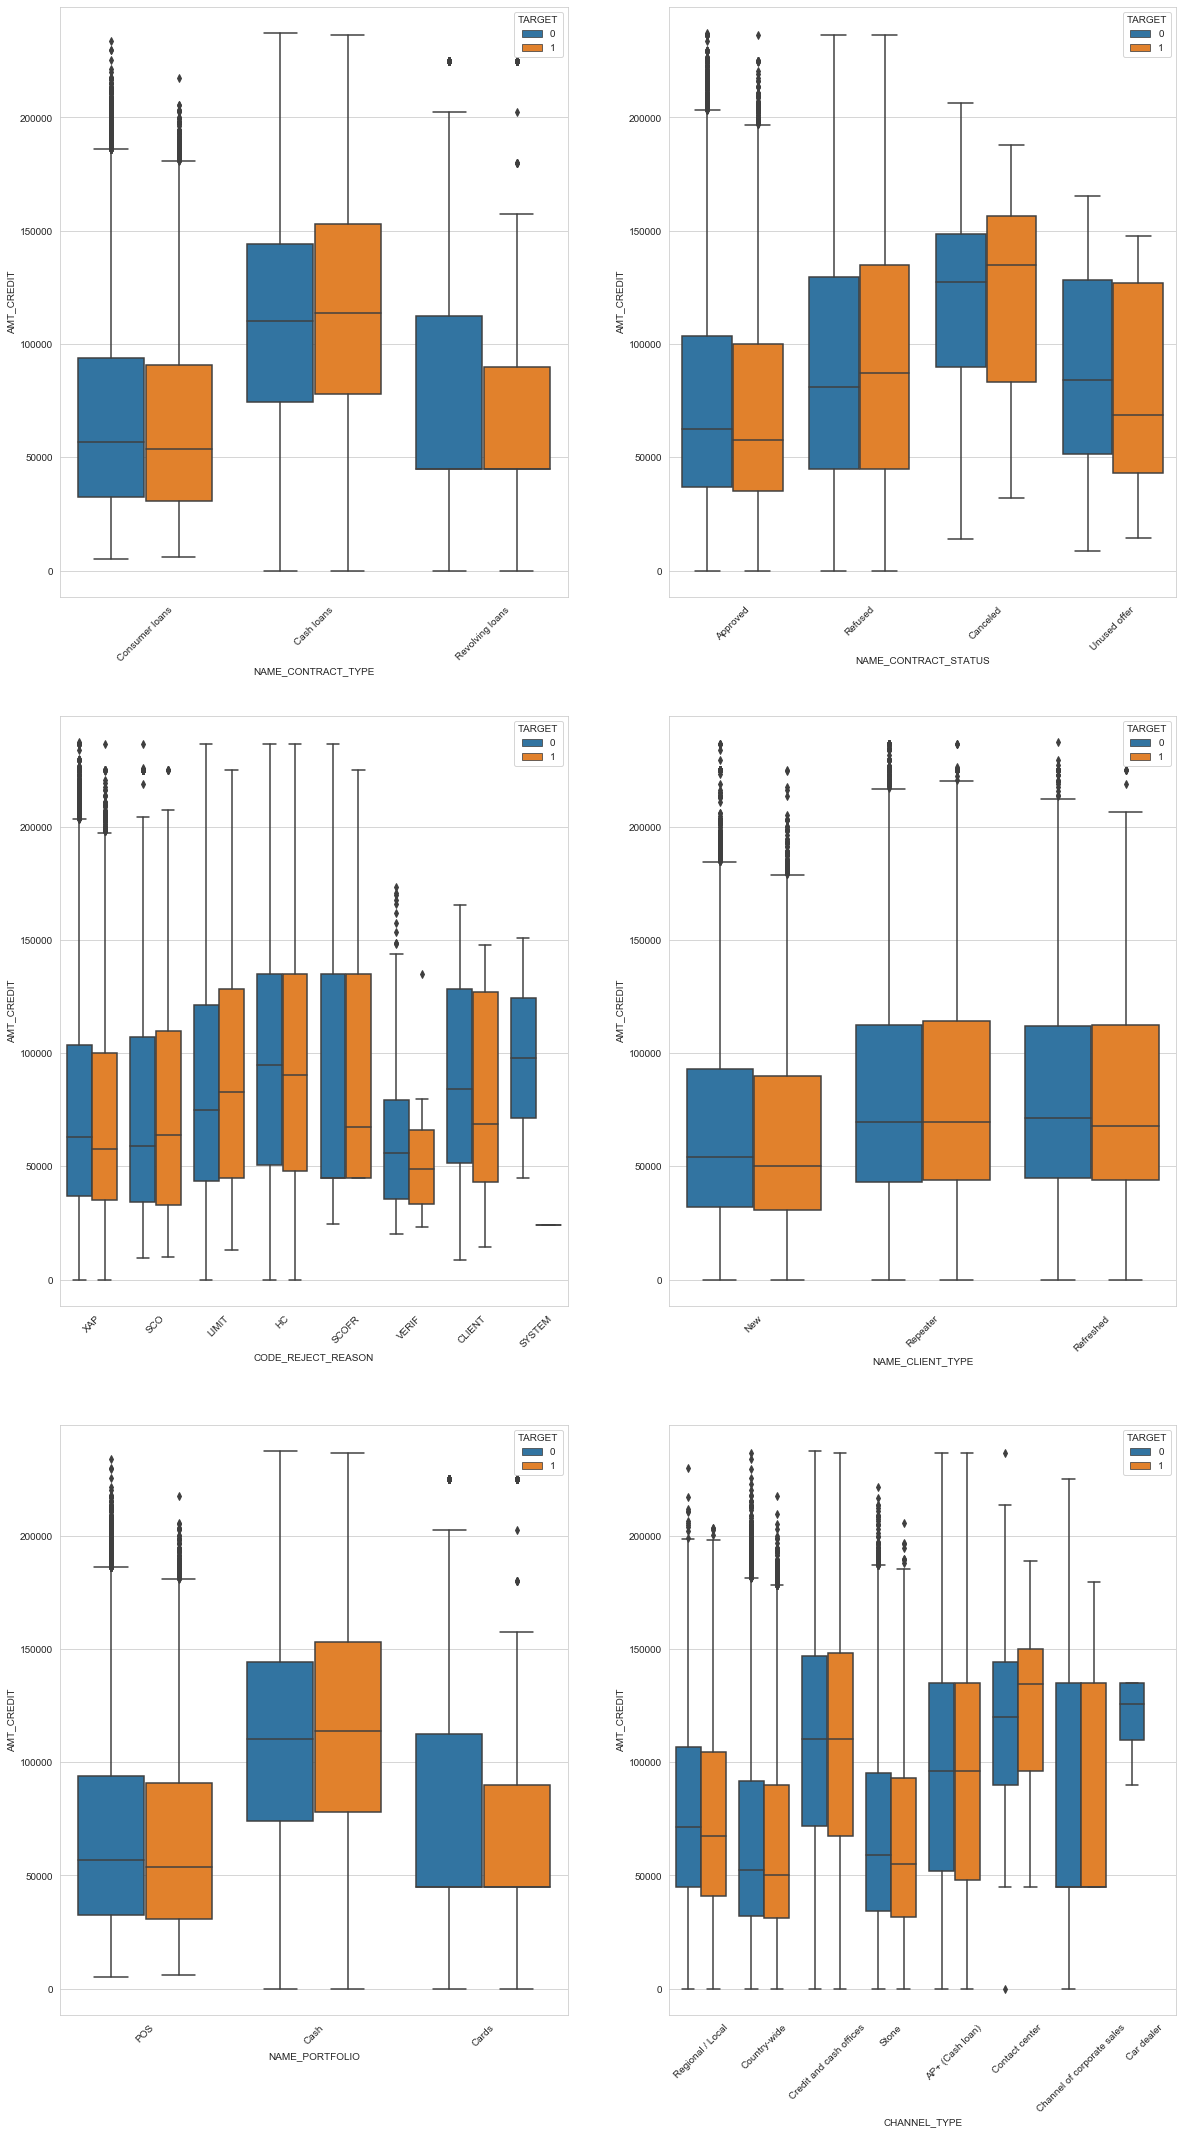

In [139]:
# Let's analyze the categorical columns vs AMT_CREDIT
plt.figure(figsize=(20,50))
indx=1
for category in ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']:
    plt.subplot(4,2,indx)
    sns.boxplot(x = category, y = 'AMT_CREDIT',hue='TARGET', data=all_applications)
    indx += 1
    plt.xticks(rotation = 45)
plt.show()

### Insights:
1. AMT_CREDIT for Cash loans are more than Revolving and Consumer loans for both Defaulters and Not Defaulters
2. We can see a lot of loans was cancelled in between process than refused and approved for higher credit. The cancelled loans have higher defaults in the current loan
3. For Higher credits Rejection reason were mostly SCOFR & HC for both Defaulters and Not Defaulters
Interestingly, rejection reason,'System' is not present for Defaulters which means non of them rejected by System got Current loan
4. AMT_CREDIT for Repeater is almost same for refreshed clients and both are more than New clients for higher credits oth Defaulters and Not Defaulters
5. The loan with portfolio Cash have more amount credited followed by Cards.Cash amout credit is higher for Defaulters than Not Defaulters.
6. The credit amount of the loan is more from Credit and Cash Offices and Contact Centers for both Defaulters and Not Defaulters

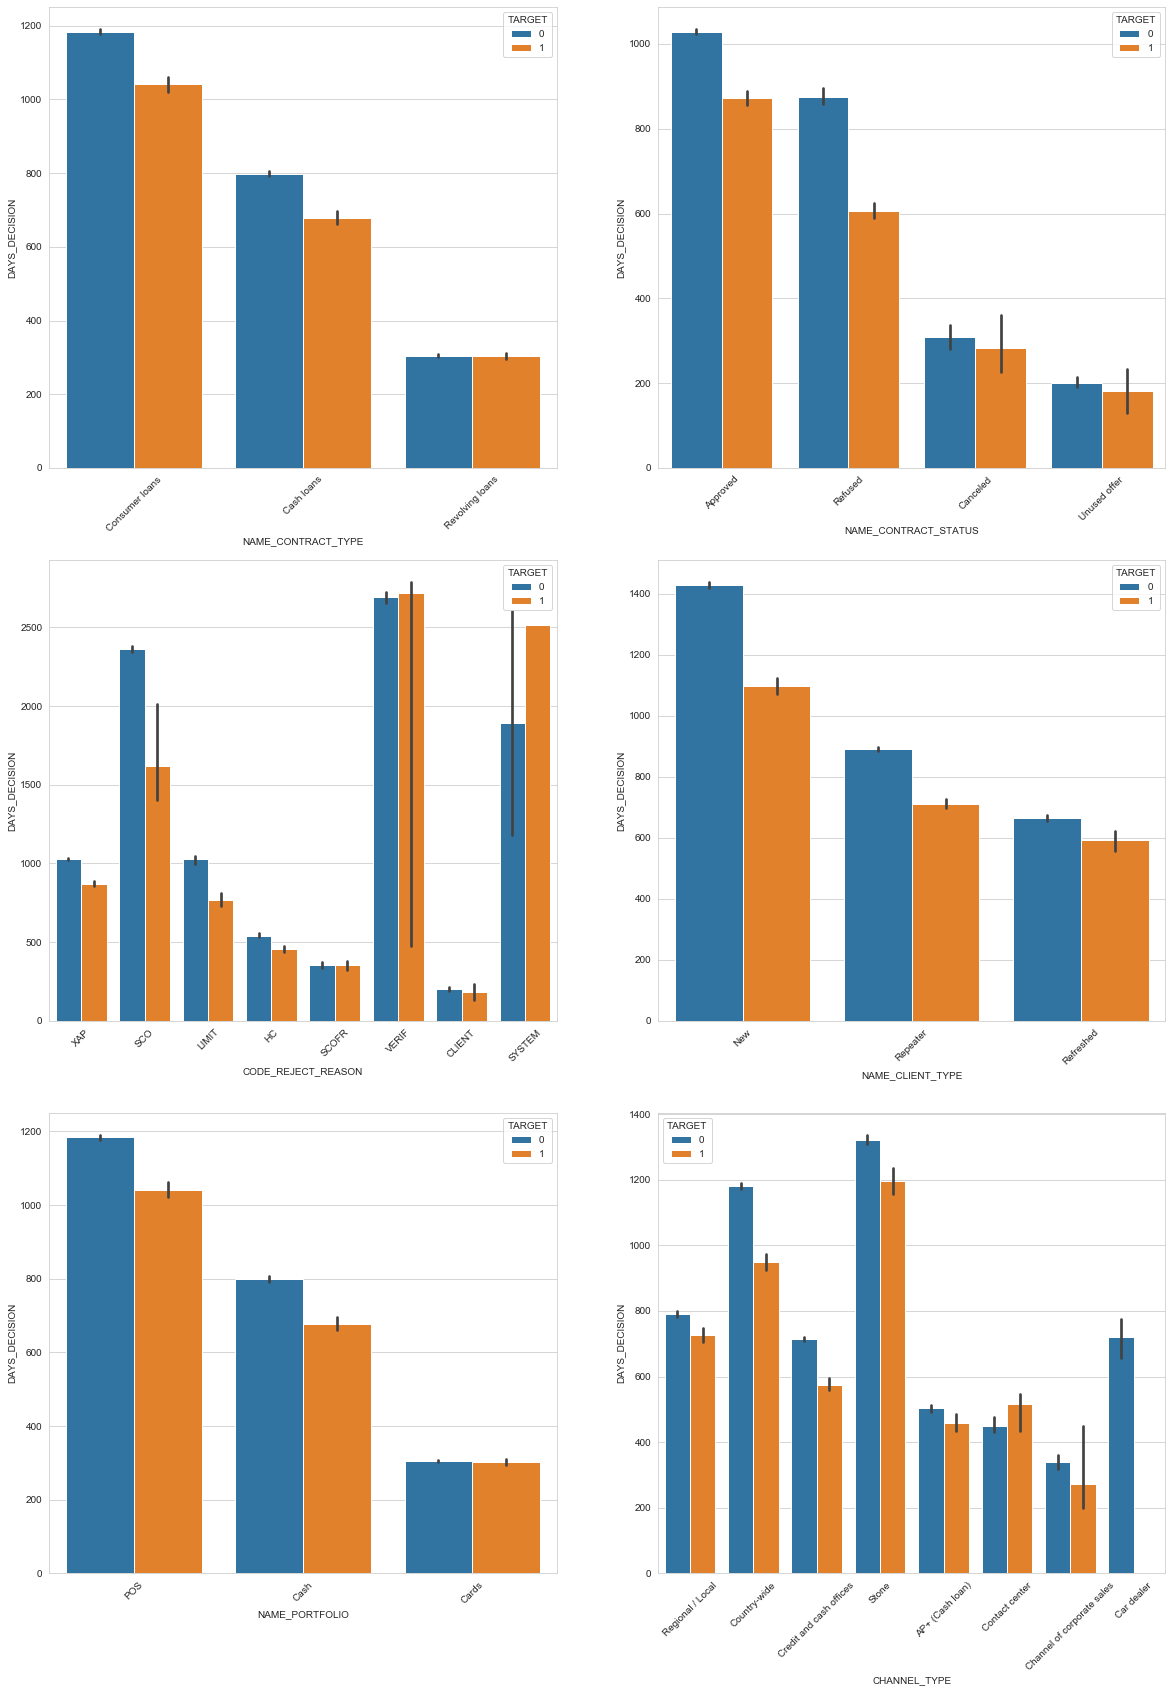

In [140]:
# Let's analyze the categorical columns vs DAYS_DECISION
req_columns=['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE']
# draw the plot for each column
plt.figure(figsize = (20,100))
indx = 1
for col in req_columns:
    plt.subplot(10,2,indx)
    sns.barplot(x=col,y='DAYS_DECISION',hue='TARGET',data=all_applications,estimator=np.median)  
    plt.xticks(rotation= 45)    
    indx += 1
plt.show()

### Insights:
1. Consumer loans take the most number of days for decision of loans for both Defaulters and Not Defaulters.
2. Interestingly, Unused offer(NAME_CONTRACT_STATUS) take the least number of days for decision for both Defaulters and Not Defaulters.
3. Code Reject reason 'Verif' takes the most number of days,followed by 'System' for both Defaulters and Not Defaulters
4. Client Type,New takes the most number of days for loan processing decision(approx double than Refreshed) which is understandable as the credit comapny will be more cautions and do its KYC properly for new customers.
5. Portfolio type 'POS' has the highest number of days for decision, while 'cards ' have the lowest for both Defaulters and Not Defaulters..
6. Channel Type 'Stone' takes the most number of days for decision for both Defaulters and Not Defaulters..

### Analysis of two segmented variables after merge

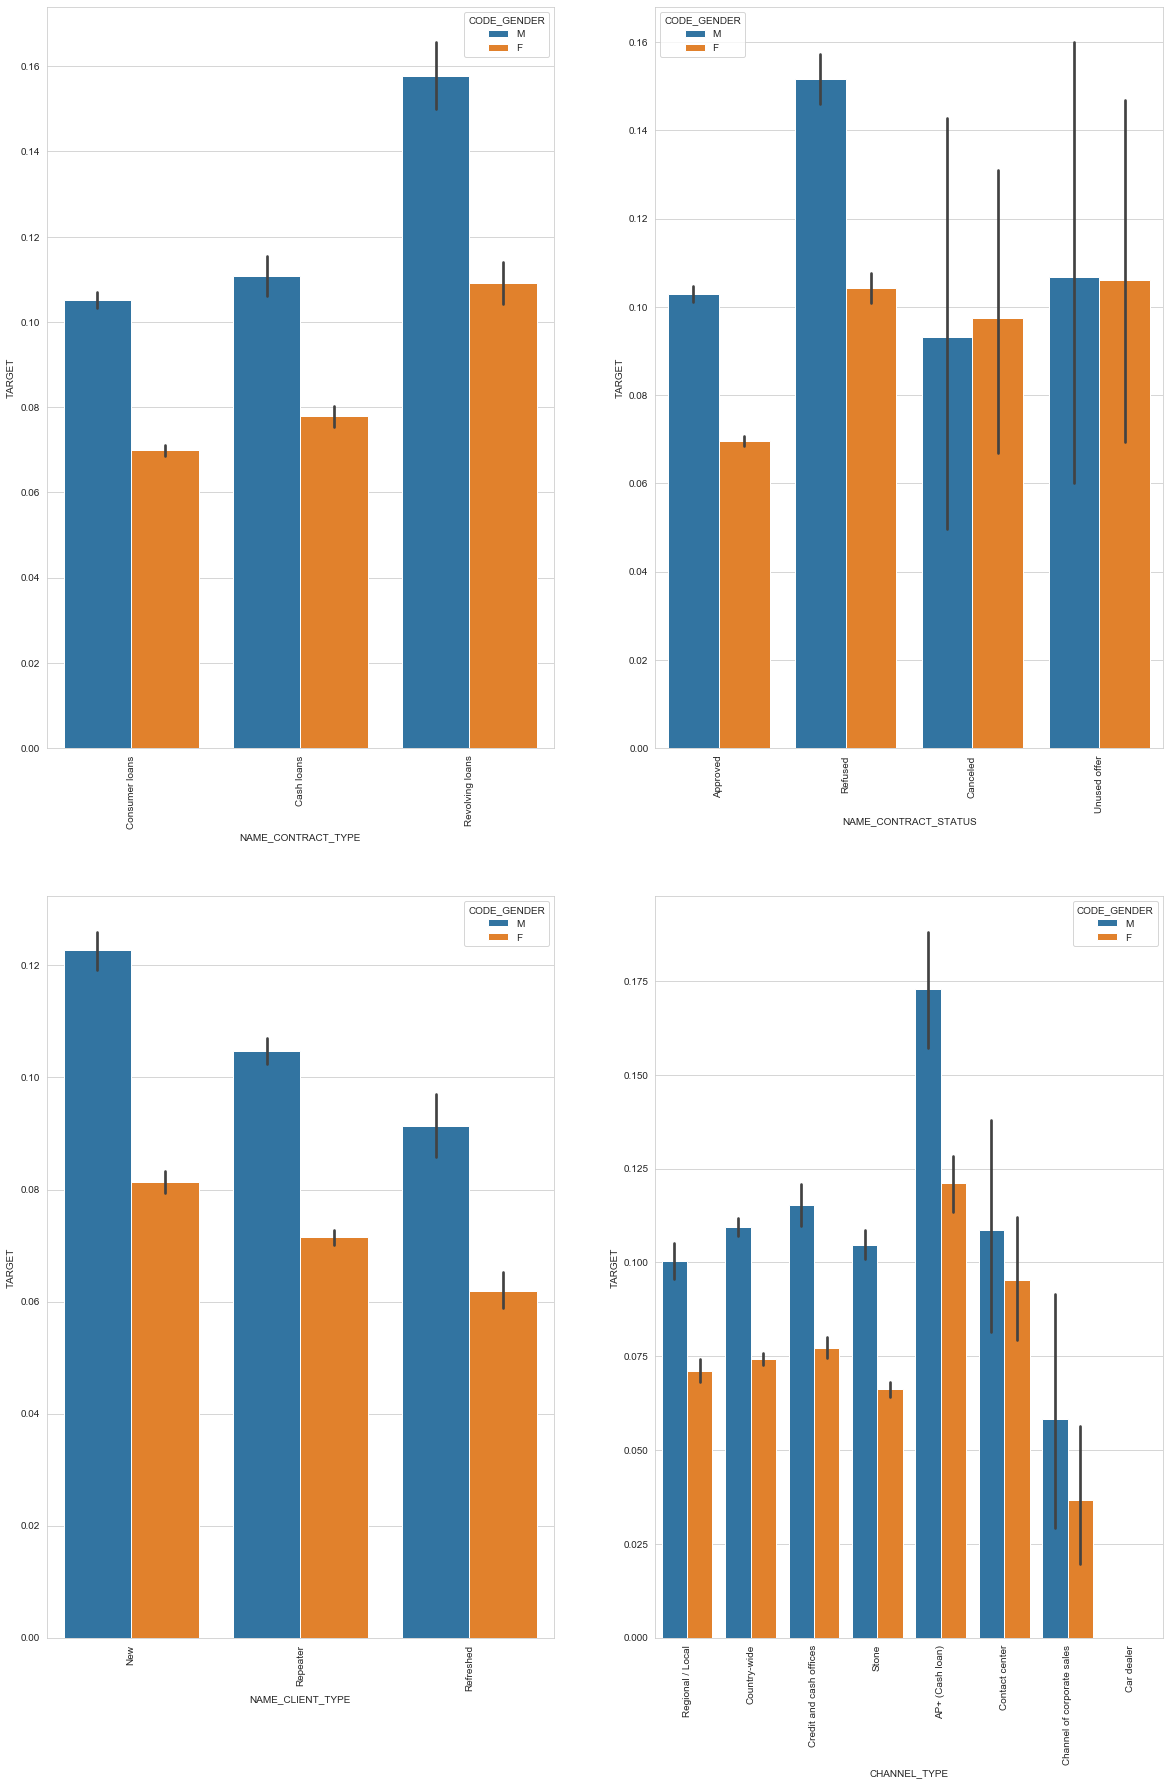

In [141]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)    
sns.barplot(y= 'TARGET', x = 'NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,2) 
sns.barplot(y= 'TARGET', x = 'NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,3)    
sns.barplot(y= 'TARGET', x = 'NAME_CLIENT_TYPE',hue='CODE_GENDER',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,4) 
sns.barplot(y= 'TARGET', x = 'CHANNEL_TYPE',hue='CODE_GENDER',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)
plt.show()

#### Insights:

These above plots shows us defaulters mean in each category

1. Male and Female clients both with Revolving Loans tends to default more than other loans.
2. Male clients for whom the loan was previously refused will default more followed by Unused Offer whereas for females for whom application was cancelled tend to default more followed by Refused.
3. New clients default more than repeater and refreshed
4. Both Male and Female clients with AP+(Cash Loans) default more than other channel types.

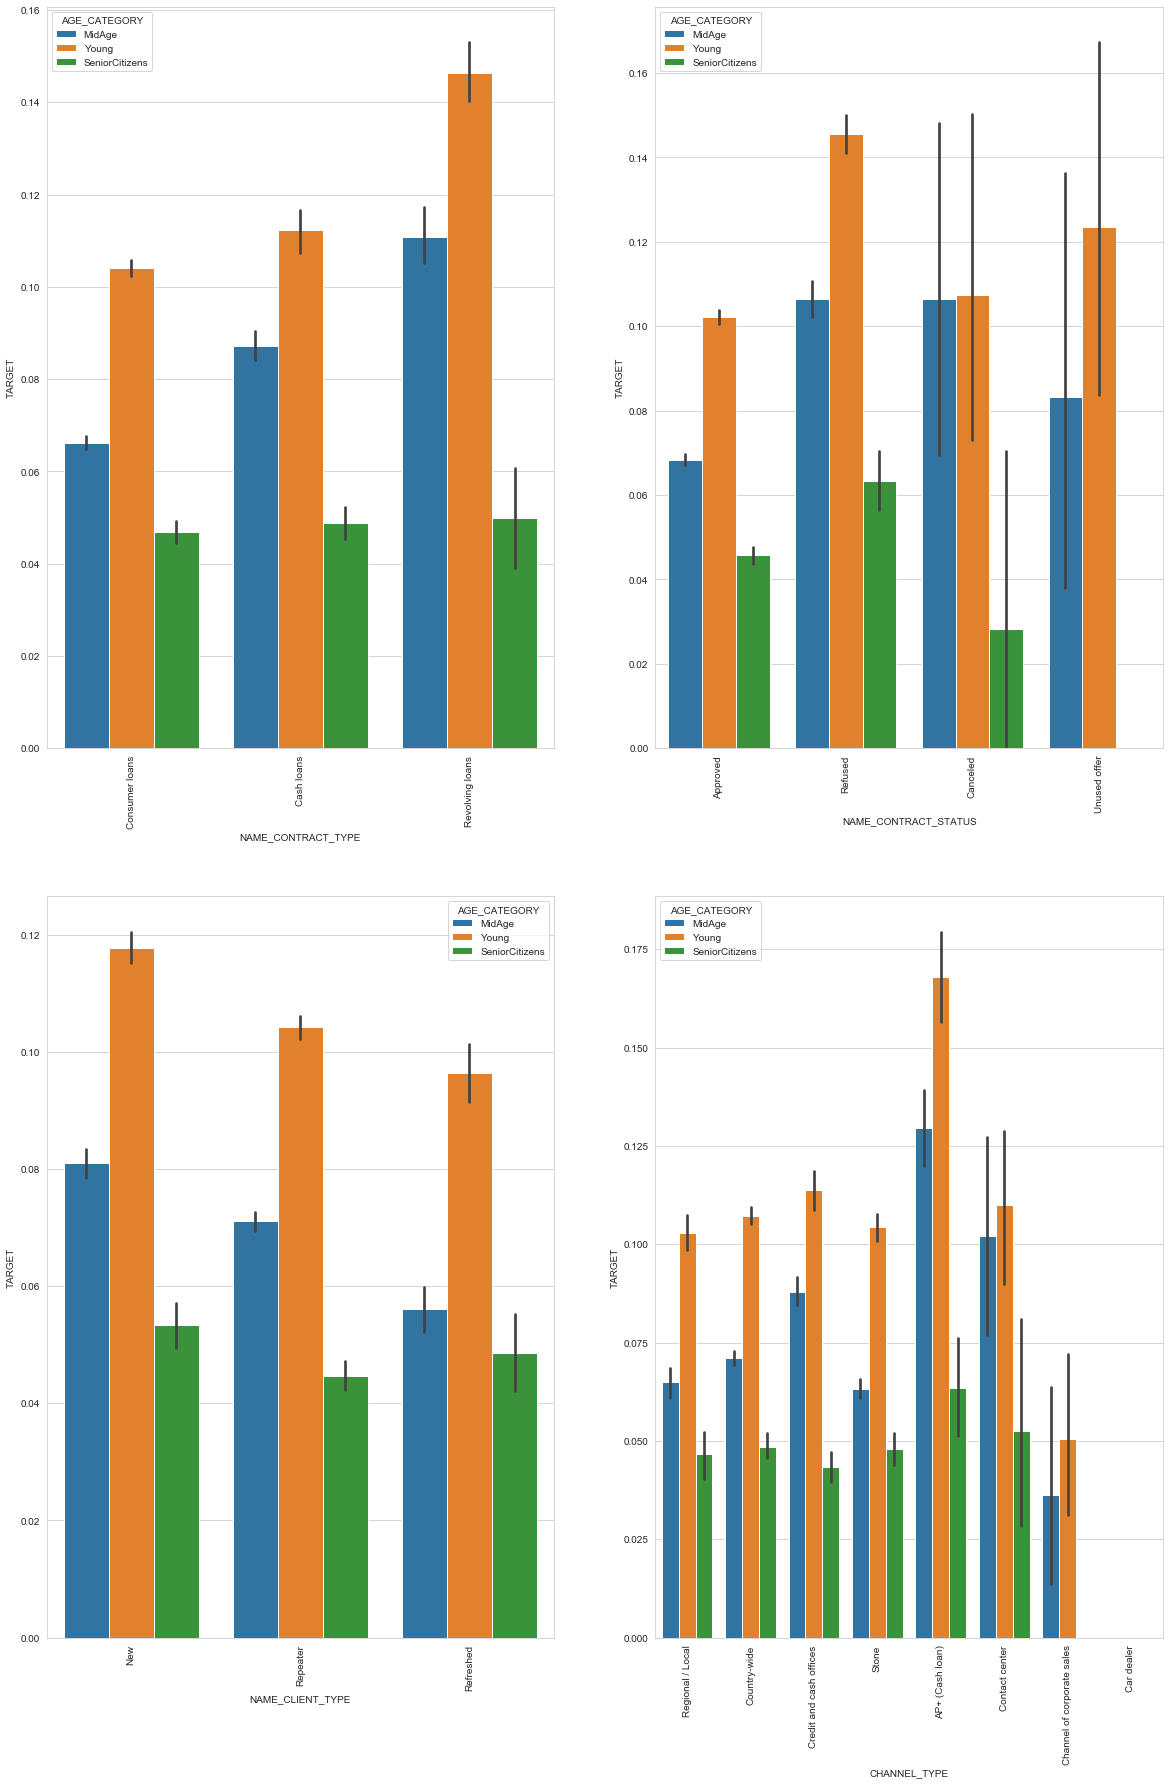

In [142]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)    
sns.barplot(y= 'TARGET', x = 'NAME_CONTRACT_TYPE',hue='AGE_CATEGORY',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,2) 
sns.barplot(y= 'TARGET', x = 'NAME_CONTRACT_STATUS',hue='AGE_CATEGORY',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,3)    
sns.barplot(y= 'TARGET', x = 'NAME_CLIENT_TYPE',hue='AGE_CATEGORY',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,4) 
sns.barplot(y= 'TARGET', x = 'CHANNEL_TYPE',hue='AGE_CATEGORY',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)
plt.show()

#### Insights:
These above plots shows us defaulters mean in each category

Its clear that young clients default more than mid-Age and Seniors in all types loans irrespective of Client Types, Channel Types and Contract status.

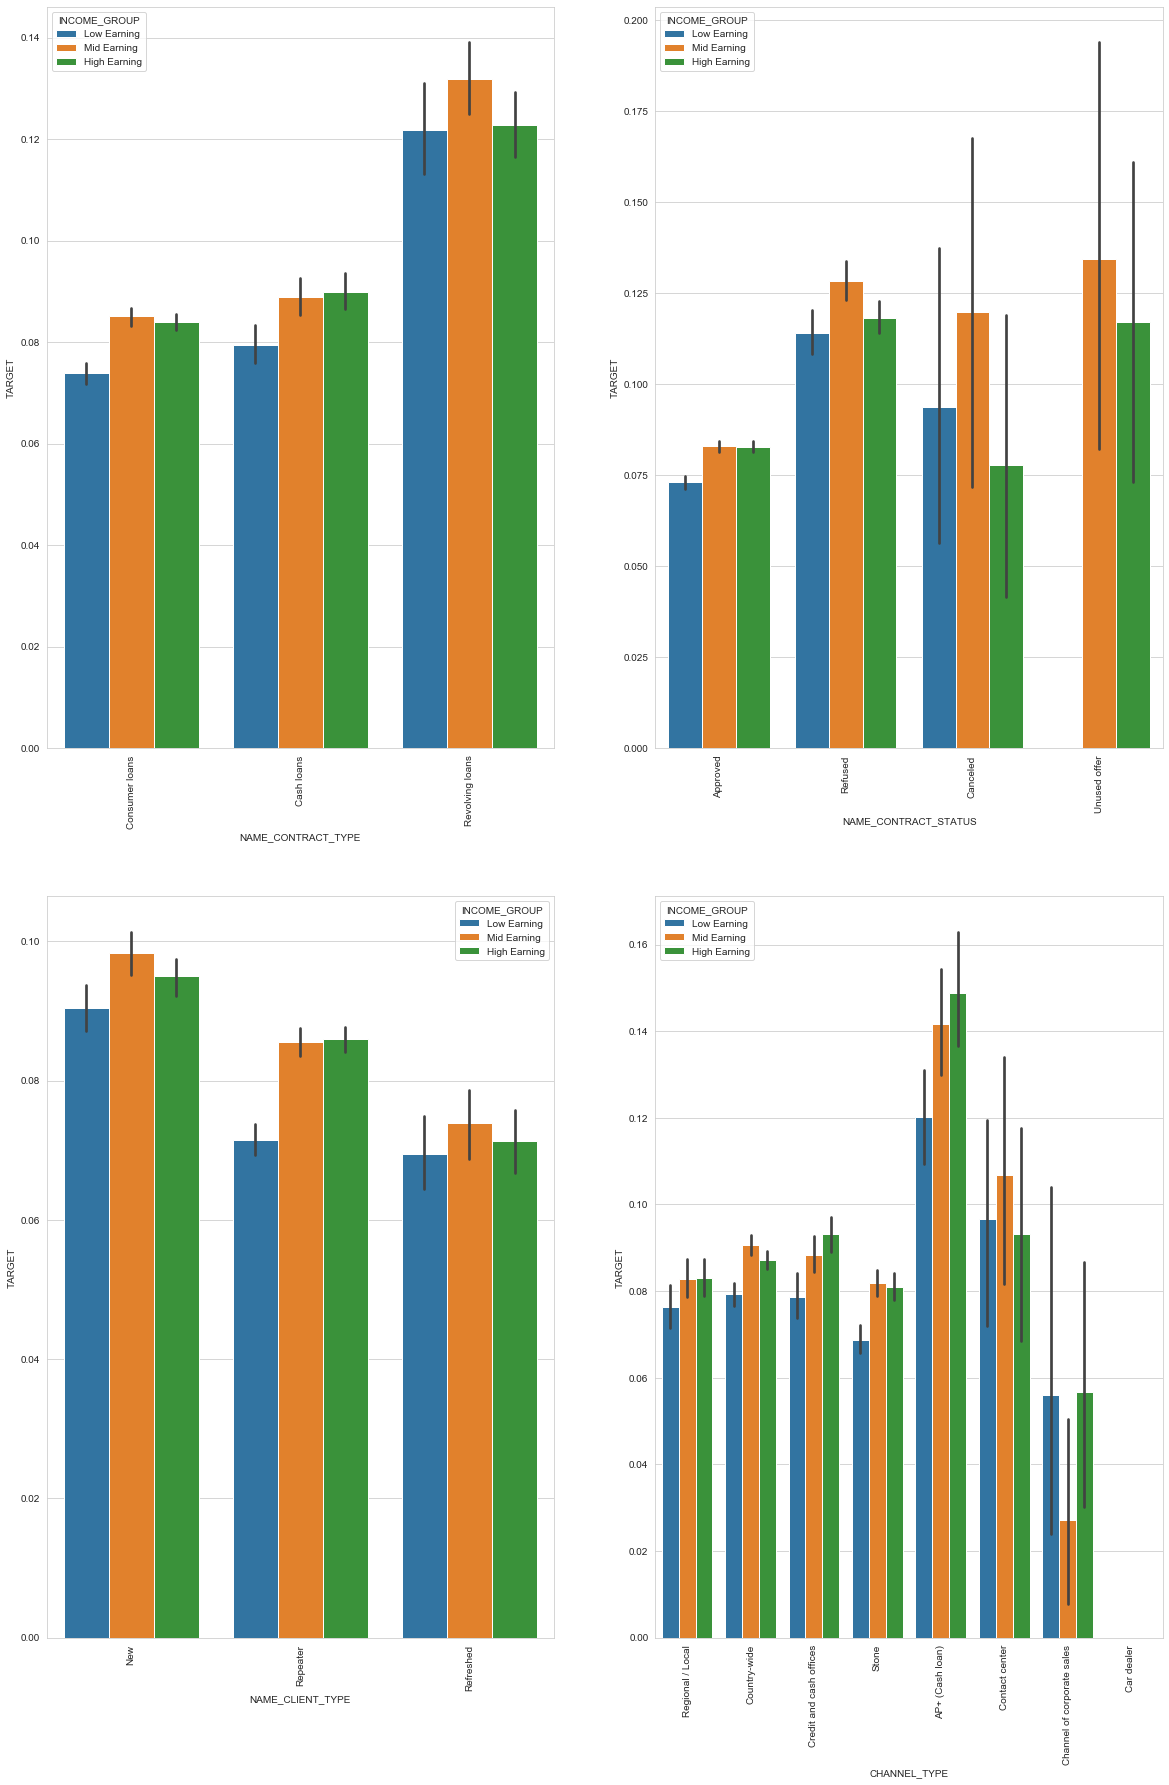

In [143]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)    
sns.barplot(y= 'TARGET', x = 'NAME_CONTRACT_TYPE',hue='INCOME_GROUP',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,2) 
sns.barplot(y= 'TARGET', x = 'NAME_CONTRACT_STATUS',hue='INCOME_GROUP',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,3)    
sns.barplot(y= 'TARGET', x = 'NAME_CLIENT_TYPE',hue='INCOME_GROUP',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)

plt.subplot(2,2,4) 
sns.barplot(y= 'TARGET', x = 'CHANNEL_TYPE',hue='INCOME_GROUP',data=all_applications,estimator=np.mean)
plt.xticks(rotation= 90)
plt.show()

### Insights
1. Clients with any Income Groups tend to default more in Revolving Loans.
2. Clients with Mid Income Group default more if their was application was cancelled previously then by Refused where as for other income groups if application was refused previously chances of defaulters are more.
3. New Clients default more than repeater and refreshed for all income Groups
4. Clients with AP+(Cash Loans) default more than other channel types for all income groups.

## Summary:

1.	Male Clients default more than female clients.
2.	Male Clients who are young, Single/Unmarried and especially New have a high rate of defaults.
3.	Female clients default for lesser amount of credit as compared to male clients.
4.	Female working as Low skilled laborers and Waitress /Barmen Staff are the most among defaulters
5.	Young clients have higher risk associated as compared to middle age or older clients.
6.	State Servants and Pensioners having high amount credit in loans default more.
7.	Clients with Lower Secondary education are most to default among both men and women
8.	Clients for whom the loan was previously refused or cancelled default more.
9.	Clients requiring AP+(Cash Loans) default more.
